In [1]:
# Filtering out warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# To display max rows and columns 
# To set palette and style

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

sns.set_palette('colorblind')
sns.set_style('darkgrid')

# <font color = blue> Credit EDA Case Study </font>

**Problem Statement:**

When a client applies for loan, the company has to decide for loan approval based on the applicant’s profile.
 
Two types of risks are associated with the company’s decision:
   1. If the applicant is likely to repay the loan (Non- Defaulter), then not approving the loan results in a loss of business to the company.
   2. If the applicant is not likely to repay the loan(Defaulter), then approving the loan to such a client will lead to a financial loss for the company.

*Our goal* is to analyze the new and previous application data to study the pattern of defaulters (TARGET) and give recommendations based on the observations which should help the company to make informed decision based on past data, and reduce the number of defaulters in future.


## Task 1: Reading the data


- ###  Subtask 1.1: Read the Data.

Read the application data file and previous application data file and store them in a dataframes `new_app` and `previous_app` resp.

In [4]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

new_app = pd.read_csv('C:/Users/plany/OneDrive/Documents/Executive PG in Data Science/10] Credit EDA Case Study/application_data.csv')



In [5]:
# Top 5 rows of dataframe   

new_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

previous_app = pd.read_csv("C:/Users/plany/OneDrive/Documents/Executive PG in Data Science/10] Credit EDA Case Study/previous_application.csv")


In [7]:
# Top 5 rows of dataframe

previous_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

- ### Subtask 1.2: Inspect the Dataframes

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns `new_app` dataframe .

In [8]:
# Check the number of rows and columns in "new_app" dataframe.
new_app.shape

(307511, 122)

In [9]:
# Check the column wise info of "new_app" dataframe.
new_app.info(verbose=True, null_counts =True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [10]:
# Check the summary for numeric columns in "new_app" dataframe.

new_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [11]:
# Check the number of rows and columns in "previous_app" dataframe.

previous_app.shape

(1670214, 37)

In [12]:
# Check the column wise info of "previous_app" dataframe.

previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [13]:
# Check the summary for numeric columns in "previous_app" dataframe.

previous_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### Task 2: Data Handling and Cleaning

Data Handling and cleaning for dataframes `new_app`.

- ### Subtask 2.1: Check for Missing Values.

Check the percentage of null values in all columns of dataframes.

In [14]:
# Checking for null values.

new_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
# Find the percentage of missing values in all columns of "new_app" dataframe.

round(new_app.isnull().sum()*100/len(new_app),2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [16]:
# Drop the rows having more than ~47% null values in the "new_app" dataframes.

new_app = new_app.loc[:,new_app.isnull().sum()/len(new_app)<=0.47]

- 47% percent value for nulls was chosen to as it allowed a better removal of data not pertaining to analysis.

In [17]:
# Check the number of rows and columns in "new_app" dataframe.
new_app.shape

(307511, 73)

In [18]:
# To check the percentage of missing values in all columns of "new_app" dataframe.
round(new_app.isnull().sum()*100/len(new_app),4).sort_values(ascending=False)

OCCUPATION_TYPE                31.3455
EXT_SOURCE_3                   19.8253
AMT_REQ_CREDIT_BUREAU_YEAR     13.5016
AMT_REQ_CREDIT_BUREAU_MON      13.5016
AMT_REQ_CREDIT_BUREAU_WEEK     13.5016
AMT_REQ_CREDIT_BUREAU_DAY      13.5016
AMT_REQ_CREDIT_BUREAU_HOUR     13.5016
AMT_REQ_CREDIT_BUREAU_QRT      13.5016
NAME_TYPE_SUITE                 0.4201
OBS_30_CNT_SOCIAL_CIRCLE        0.3320
DEF_30_CNT_SOCIAL_CIRCLE        0.3320
OBS_60_CNT_SOCIAL_CIRCLE        0.3320
DEF_60_CNT_SOCIAL_CIRCLE        0.3320
EXT_SOURCE_2                    0.2146
AMT_GOODS_PRICE                 0.0904
AMT_ANNUITY                     0.0039
CNT_FAM_MEMBERS                 0.0007
DAYS_LAST_PHONE_CHANGE          0.0003
NAME_INCOME_TYPE                0.0000
FLAG_OWN_REALTY                 0.0000
TARGET                          0.0000
FLAG_EMAIL                      0.0000
FLAG_PHONE                      0.0000
FLAG_CONT_MOBILE                0.0000
NAME_CONTRACT_TYPE              0.0000
FLAG_WORK_PHONE          

In [19]:
# List the columns with less than equal to 13% null values.
len(list(new_app.columns[(new_app.isnull().sum()/ len(new_app)<=0.13) & (new_app.isnull().sum()/ len(new_app)>0)]))

10

In [20]:
# Name the columns with less than equal to 13% null values.

list(new_app.columns[(new_app.isnull().sum()/ len(new_app)<=0.13) & (new_app.isnull().sum()/ len(new_app)>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [21]:
# Dropping the extra flag data, data not pertaining to analysis

new_app = new_app.drop(new_app.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'], axis= 1)


In [22]:
# Dropping the extra flag data, data not pertaining to analysis

new_app = new_app.drop(new_app.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'], axis= 1)


- ### Subtask 2.2: Imputing the missing values.

Imputing the missing values for dataframes `new_app`.

In [23]:
# Name the columns with less than equal to 13% null values.

list(new_app.columns[(new_app.isnull().sum()/ len(new_app)<=0.13) & (new_app.isnull().sum()/ len(new_app)>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

- #### AMT_ANNUITY

  AMT_ANNUITY :- Loan annuity is the monthly payment that client will pay to repay credit loan.

In [24]:
# Anaylse
new_app['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

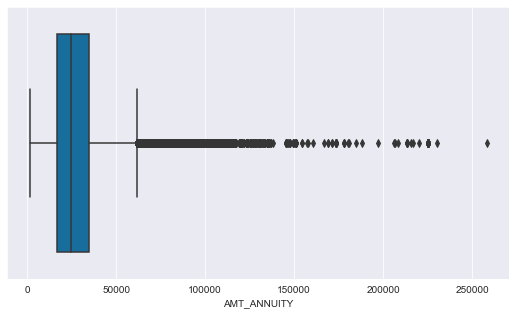

In [25]:
# Since AMT_ANNUITY variable is numeric nature (continuous variable). So we can impute mean or median after checking the outliers.

plt.figure(figsize=[9,5])

sns.boxplot(new_app['AMT_ANNUITY'])
plt.show()

- The variable `AMT_ANNUITY` has outliers, so we will impute the missing values on basis of median.

In [26]:
# Median
new_app['AMT_ANNUITY'].median()

24903.0

In [27]:
# Fill up the nulls in the AMT_ANNUITY column with the median value of 24903.00

new_app['AMT_ANNUITY'] = round(new_app['AMT_ANNUITY'].fillna(new_app['AMT_ANNUITY'].median()),2)


In [28]:
# Check the nulls in the AMT_ANNUITY column again to cross-verify
new_app['AMT_ANNUITY'].isnull().sum()

0

- #### AMT_GOODS_PRICE

  AMT_GOODS_PRICE :- For consumer loans it is the price of the goods for which the loan is given


In [29]:
# Analyse
new_app.AMT_GOODS_PRICE.value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [30]:
# Analyse
new_app.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

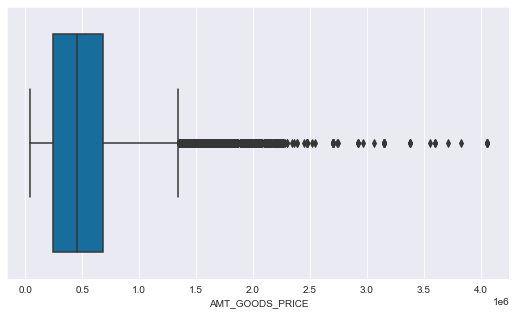

In [31]:
# Since AMT_GOODS_PRICE variable is numeric nature (continuous variable). So we can impute mean or median after checking the outliers.

plt.figure(figsize=[9,5])

sns.boxplot(new_app['AMT_GOODS_PRICE'])
plt.show()

- The variable `AMT_GOODS_PRICE` has outliers, so we will impute the missing values on basis of median.

In [32]:
# Median value
new_app.AMT_GOODS_PRICE.median()

450000.0

In [33]:
# Fill up the nulls in the AMT_GOODS_PRICE column with the median value of 450000.00

new_app['AMT_GOODS_PRICE'] = round(new_app['AMT_GOODS_PRICE'].fillna(new_app['AMT_GOODS_PRICE'].median()),2)

In [34]:
# Check the nulls in the AMT_GOODS_PRICE column again to cross-verify
new_app['AMT_GOODS_PRICE'].isnull().sum()

0

- #### NAME_TYPE_SUITE

  NAME_TYPE_SUITE :- Who was accompanying client when he was applying for the loan

In [35]:
# Analyse
new_app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

- The NAME_TYPE_SUITE column is categorical variable. So we can impute this column using mode.



In [36]:
# Mode
new_app.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

In [37]:
# Fill up the nulls in the NAME_TYPE_SUITE column with the mode value of " Unaccompanied"

new_app['NAME_TYPE_SUITE'] = new_app['NAME_TYPE_SUITE'].fillna(new_app['NAME_TYPE_SUITE'].mode()[0])

In [38]:
# Check the nulls in the NAME_TYPE_SUITE column again to cross-verify

new_app['NAME_TYPE_SUITE'].isnull().sum()

0

- #### CNT_FAM_MEMBERS

  CNT_FAM_MEMBERS :- How many family members does client have

In [39]:
# Analyse
new_app['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [40]:
# Analyse
new_app['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

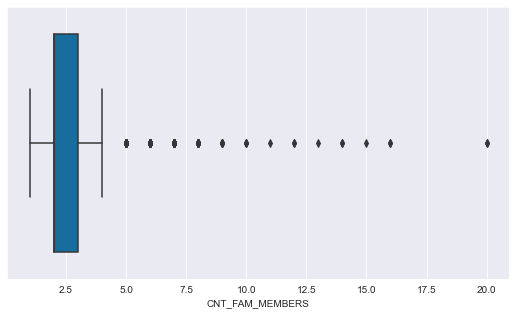

In [41]:
# Since CNT_FAM_MEMBERS variable is numeric nature (discrete variable). So we can impute mean or median after checking the outliers.

plt.figure(figsize=[9,5])

sns.boxplot(new_app['CNT_FAM_MEMBERS'])
plt.show()

- The variable `CNT_FAM_MEMBERS` has outliers, so we will impute the missing values on basis of median.

In [42]:
# Median value
new_app.CNT_FAM_MEMBERS.median()

2.0

In [43]:
# Fill up the nulls in the CNT_FAM_MEMBERS column with the median value of 2.0

new_app['CNT_FAM_MEMBERS'] = round(new_app['CNT_FAM_MEMBERS'].fillna(new_app['CNT_FAM_MEMBERS'].median()))

In [44]:
# Check the nulls in the CNT_FAM_MEMBERS column again to cross-verify
new_app['CNT_FAM_MEMBERS'].isnull().sum()

0

- #### EXT_SOURCE_2

  EXT_SOURCE_2 :- Normalized EXT_SOURCE_2 is sourced from external data.

In [45]:
# Analyse
new_app['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [46]:
# Analyse
new_app['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

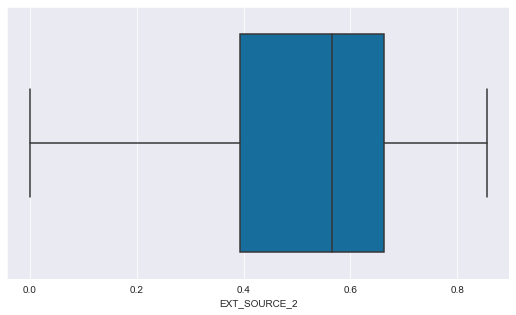

In [47]:
# Since EXT_SOURCE_2 variable is numeric nature (discrete variable). So we can impute mean or median after checking the outliers.

plt.figure(figsize=[9,5])

sns.boxplot(new_app['EXT_SOURCE_2'])
plt.show()

- The variable `EXT_SOURCE_2` has no outliers, so we will impute the missing values on basis of mean.

In [48]:
# Mean value
new_app.EXT_SOURCE_2.mean()

0.5143926741308463

In [49]:
# Fill up the nulls in the EXT_SOURCE_2 column with the mean value of 0.514

new_app['EXT_SOURCE_2'] = round(new_app['EXT_SOURCE_2'].fillna(new_app['EXT_SOURCE_2'].mean()),2)

In [50]:
# Check the nulls in the EXT_SOURCE_2 column again to cross-verify
new_app['EXT_SOURCE_2'].isnull().sum()

0

- ### Subtask 2.3: Handling incorrect datatypes.

To Check the dataypes and convert them to correct datatypes dataframe `new_app`.

In [51]:
#Check the datatypes of all the columns 
new_app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_STAR

In [52]:
# Number of  the columns which have "Float64" dtypes.
len(list(new_app.select_dtypes(include = ['float64'])))

20

In [53]:
# Name the columns which have "Float64" dtypes.

list(new_app.select_dtypes(include = ['float64']))

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [54]:
# Credit Bureau Imputation
# Assumption is that there were no enquiries conducted for that person by company.
new_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'] = new_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [55]:
#Check for NA Values
new_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [56]:
# Change the dtype of columns from "Float64" to "Int64"
numeric_columns = ['AMT_INCOME_TOTAL',  'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

new_app.loc[:, numeric_columns] = new_app.loc[:, numeric_columns].apply(lambda x: x.astype('int64', errors = 'ignore'))

In [57]:
# Number of  the columns which have "Object" dtypes.
len(list(new_app.select_dtypes(include = ['object'])))

12

In [58]:
# Name the columns which have "Object" dtypes.

list(new_app.select_dtypes(include = ['object']))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [59]:
# Change the dtype of columns from "Object" to "String"
obj_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
new_app.loc[:, obj_columns] = new_app.loc[:, obj_columns].apply(lambda x: x.astype('str', errors = 'ignore'))

In [60]:
#Check the datatypes of all numeric the columns 
list(new_app.select_dtypes(include = 'int64'))

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [61]:
# Number of  the columns which have "Int64" dtypes.
len(list(new_app.select_dtypes(include = ['int64'])))

29

- ### Subtask 2.4: Cleaning Columns

To clean columns for dataframes `new_app`.

In [62]:
# Cleaning the "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE" columns.

new_app['AGE'] = round(abs(new_app.DAYS_BIRTH)//365.25,0)
new_app['YEARS_EMPLOYED'] = round(abs(new_app.DAYS_EMPLOYED)//365.25,0)
new_app['YEARS_REGISTRATION'] = round(abs(new_app.DAYS_REGISTRATION)//365.25,0)
new_app['YEARS_ID_PUBLISH'] = round(abs(new_app.DAYS_ID_PUBLISH)//365.25,0)
new_app['YEARS_LAST_PHONE_CHANGE'] = round(abs(new_app.DAYS_LAST_PHONE_CHANGE)//365.25,0)

In [63]:
# Top 5 rows.
new_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0            202500      406597        24700   
1               N             0            270000     1293502        35698   
2               Y             0             67500      135000         6750   
3               Y             0            135000      312682        29686   
4               Y             0            121500      513000        21865   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           351000   Unaccompanied          Working   
1          1129500          Family    State servant   
2           135000   Unaccompanied          Working   
3           297000   Unaccompanied          Working   
4           513000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                           0       -9461           -637              -3648   
1                           0      -16765          -1188              -1186   
2                           0      -19046           -225              -4260   
3                           0      -19005          -3039              -9833   
4                           0      -19932          -3038              -4311   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers                1                     2   
1             -291      Core staff                2                     1   
2            -2531        Laborers                1                     2   
3            -2437        Laborers                2                     2   
4            -3458      Core staff                1                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

In [64]:
# Drop the "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"

new_app = new_app.drop(["DAYS_BIRTH","DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE" ], axis = 1)

In [65]:
# Top 5 rows.
new_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0            202500      406597        24700   
1               N             0            270000     1293502        35698   
2               Y             0             67500      135000         6750   
3               Y             0            135000      312682        29686   
4               Y             0            121500      513000        21865   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           351000   Unaccompanied          Working   
1          1129500          Family    State servant   
2           135000   Unaccompanied          Working   
3           297000   Unaccompanied          Working   
4           513000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                           0        Laborers                1   
1                           0      Core staff                2   
2                           0        Laborers                1   
3                           0        Laborers                2   
4                           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0   

- #### Analysing `"Code_GENDER"` column of `new_app` dataframe.

In [66]:
# Analysing "CODE_GENDER" column
new_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [67]:
# Drop the "XNA" rows from CODE_GENDER column.
new_app = new_app[new_app["CODE_GENDER"] != "XNA"]

In [68]:
# Readability of CODE_GENDER
new_app['CODE_GENDER'].replace(["M", "F"], ["Male", "Female"], inplace=True)

In [69]:
# To recheck "CODE_GENDER" column
new_app.CODE_GENDER.value_counts()

Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

- #### Analysing `"OCCUPATION_TYPE"` column of new_app dataframe.

 



In [70]:
# Analysing ORGANIZATION_TYPE
new_app.OCCUPATION_TYPE.value_counts()

nan                      96389
Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

- 96389  "nan"  values are present out of the 307511 rows. Since we don't have enough information about this, we can think of replacing "nan" to np.nan

In [71]:
# Replacing"nan" with NaN.

new_app.OCCUPATION_TYPE = new_app['OCCUPATION_TYPE'].replace(['nan'], np.nan)

- #### Analysing `ORGANIZATION_TYPE` column of `new_app` dataframe.

In [72]:
# Analysing ORGANIZATION_TYPE
new_app.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Name: ORGANIZATION_TYPE, dtype: int64

- 55374  "XNA"  values are present out of the 307511 rows. Since we don't have enough information about this, we can think of renaming "XNA" to "No-info."

In [73]:
# Replace "XNA" to "No-info"
new_app.ORGANIZATION_TYPE = new_app['ORGANIZATION_TYPE'].replace(['XNA'], 'No-info')

- ### Subtask 2.5: Inspecting Outliers

To check for outliers in `new_app` dataframe.

- ####  Analysing` "AMT_INCOME_TOTAL"` column of `new_app` dataframe.


In [74]:
# Analysing"AMT_INCOME_TOTAL"
new_app.AMT_INCOME_TOTAL.quantile([0,0.25,0.5,0.75,0.99,0.98,1])

0.00        25650.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
0.99       472500.0
0.98       427500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

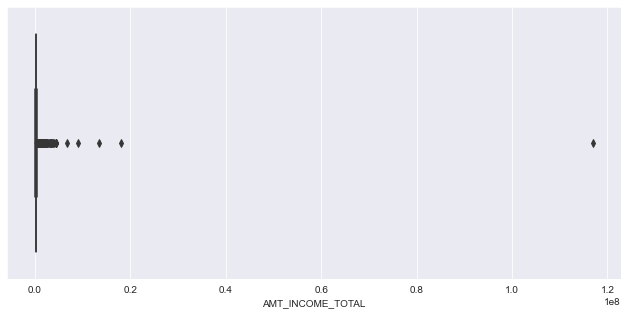

In [75]:
# Since "AMT_INCOME_TOTAL" variable is numeric nature (discrete variable).
plt.figure(figsize=[11,5])

sns.boxplot(new_app['AMT_INCOME_TOTAL'])
plt.show()

- The variable "AMT_INCOME_TOTAL" has outliers, we can't drop these high income clients as they might be potential customers since they have high income.


In [76]:
# Check the nulls in the AMT_INCOME_TOTAL column again to cross-verify
new_app['AMT_INCOME_TOTAL'].isnull().sum()

0

In [77]:
# Create Bins for "AMT_INCOME_TOTAL"

new_app['INCOME_RANGE'] = pd.qcut(new_app.AMT_INCOME_TOTAL, q=[0, 0.25, 0.5, 0.75, 0.9, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
new_app['INCOME_RANGE'].head()


0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [78]:
new_app.INCOME_RANGE.head()

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

- #### Analysing "YEARS_EMPLOYED" column

  YEARS_EMPLOYED :- How many years before the application the person started with the current employment.


In [79]:
# Analysing "YEARS_EMPLOYED"
new_app.YEARS_EMPLOYED.describe()

count    307507.000000
mean        184.839594
std         381.591822
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max         999.000000
Name: YEARS_EMPLOYED, dtype: float64

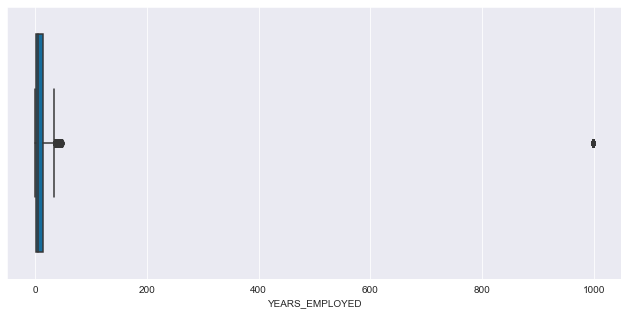

In [80]:
# Since "YEARS_EMPLOYED" variable is numeric nature (discrete variable). 
plt.figure(figsize=[11,5])

sns.boxplot(new_app['YEARS_EMPLOYED'])
plt.show()

- The variable "YEARS_EMPLOYED" has outliers, this means that the person with high years_employed will have more experience with the current organization and therefore their "AGE" could also be high.

- But, 999 is definitely an outlier as a person will not be employed to any organization beyond say 40 years even if the person started working at the age of 20 and will retired at 60 years of age.  



In [81]:
# Check the nulls in the DAYS_EMPLOYED column.
new_app['YEARS_EMPLOYED'].isnull().sum()

0

- #### Analysing "AMT_CREDIT" column

  AMT_CREDIT :- Credit amount of the loan i.e. is the total amount of loan a person or business can borrow.

In [82]:
# Analysing "AMT_CREDIT"
new_app.AMT_CREDIT.quantile([0,0.25,0.5,0.75,0.99,1])

0.00      45000.0
0.25     270000.0
0.50     513531.0
0.75     808650.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [83]:
# Check the nulls in the AMT_CREDIT column
new_app['AMT_CREDIT'].isnull().sum()

0

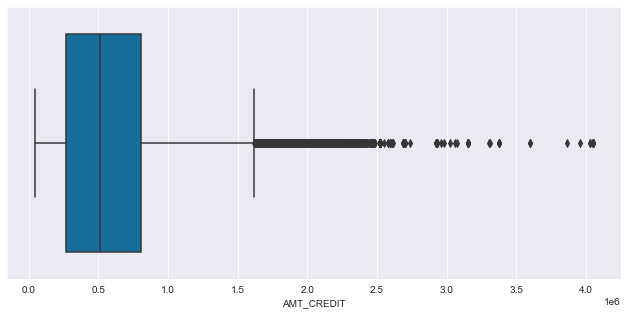

In [84]:
# Since "AMT_CREDIT" variable is numeric nature (discrete variable).
plt.figure(figsize=[11,5])

sns.boxplot(new_app['AMT_CREDIT'])
plt.show()

- The variable "AMT_CREDIT" has outliers, since it is the total amount of loan a person or business can borrow.

- The loan amount can be higher depending upon the person's repayment credibility, income earned, age, and various other factors.


In [85]:
# Create Bins for "AMT_CREDIT"

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

label_name = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

new_app['CREDIT_RANGE']=pd.cut(new_app['AMT_CREDIT'],bins=bins,labels=label_name)


- #### Analysing `"AGE"` column in `new_app` dataframe

  AGE :- Client's age in years at the time of application

In [86]:
# Analysing "AGE"
new_app.AGE.describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

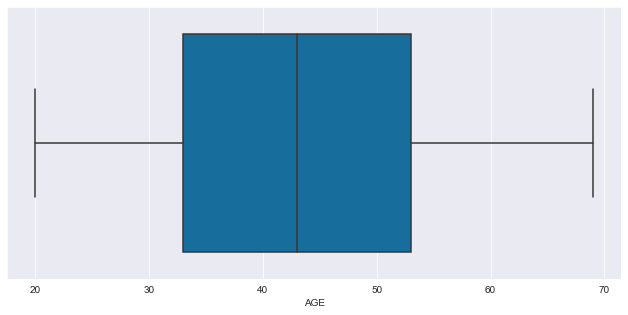

In [87]:
# Since "AGE" variable is numeric nature (discrete variable). So we can impute mean or median after checking the outliers.
plt.figure(figsize=[11,5])

sns.boxplot(new_app['AGE'])
plt.show()

- There are `no outliers` in `"AGE"` column.

- #### Analysing `"AMT_ANNUITY"` column of `new_app` dataframe

  AMT_ANNUITY:- Loan annuity is the monthly payment that client will pay to repay credit loan.

In [88]:
# Analysing "AMT_ANNUITY"
new_app.AMT_ANNUITY.describe()

count    307507.000000
mean      27108.354551
std       14493.505981
min        1615.000000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.000000
Name: AMT_ANNUITY, dtype: float64

In [89]:
# Analyse
new_app.AMT_ANNUITY.quantile([0.75,0.80,0.90,0.95,0.97,0.98,0.9995,1])

0.7500     34596.000
0.8000     37516.000
0.9000     45954.000
0.9500     53325.000
0.9700     58481.100
0.9800     62964.000
0.9995    126253.899
1.0000    258025.000
Name: AMT_ANNUITY, dtype: float64

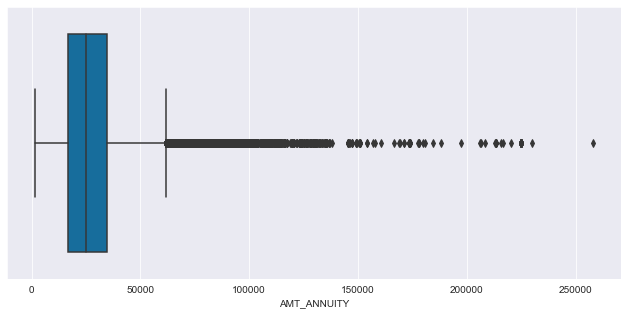

In [90]:
# Since "AMT_ANNUITY" variable is numeric nature (discrete variable).
plt.figure(figsize=[11,5])

sns.boxplot(new_app['AMT_ANNUITY'])
plt.show()

- There are outliers in `"AMT_ANNUITY"` column and this represents the loan annuity i.e. the monthly payment that the client will pay for the loan. Also, annuity above 150,000 definitely represents outliers but clients with very high income will be able to pay this annuity amount. 

- ###  Subtask 2.6: Inspecting for Data Imbalance

 To inspect for Data Imbalance in `new_app` dataframe.

In [91]:
# Identify the data imbalance for "TARGET" variable in "new_app" dataframe

new_app.TARGET.value_counts(normalize=True)


0    0.91927
1    0.08073
Name: TARGET, dtype: float64

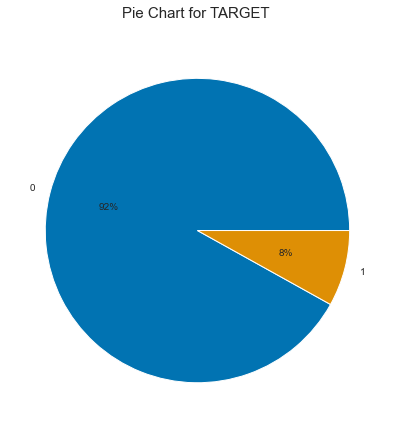

In [92]:
# Pie plot to analyse the TARGET variable.
pie_imb = new_app.TARGET.value_counts()

plt.figure(figsize=[10,7])
plt.pie(pie_imb, labels=pie_imb.index,autopct='%1.0f%%')
plt.title("Pie Chart for TARGET \n ", fontsize = 15)
plt.show()


- As we can see that, there is high data imbalance between clients with payment difficulties and the other.

- Approx 92% clients have paid the loan on time while approx 8% of clients faced difficulties in paying the loan on time.

- The ratio of data imbalance for TARGET variable is 91.92 : 8.07

- The data is divided into two parts, Clients with Payment Difficulties (TARGET 1) and Clients with No Payment Difficulties (TARGET = 0) for further of the analysis.


- ### Subtask 2.7: Split the original dataframe into two different datasets

Since the "TARGET" variable has high data imbalance, split the original dataframe into two different datasets based upon "TARGET"

In [93]:
# Clients with "Payment difficulties"

new_app_1 = new_app.loc[new_app.TARGET==1]

In [94]:
# Top 5 rows.
new_app_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans        Male            N   
26      100031       1         Cash loans      Female            N   
40      100047       1         Cash loans        Male            N   
42      100049       1         Cash loans      Female            N   
81      100096       1         Cash loans      Female            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0            202500      406597        24700   
26               Y             0            112500      979992        27076   
40               Y             0            202500     1193580        35028   
42               N             0            135000      288873        16258   
81               Y             0             81000      252000        14593   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0            351000   Unaccompanied               Working   
26           702000   Unaccompanied               Working   
40           855000   Unaccompanied  Commercial associate   
42           238500   Unaccompanied               Working   
81           252000   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                            0        Laborers                1   
26                           0   Cooking staff                1   
40                           0        Laborers                2   
42                           0     Sales staff                2   
81                           0             NaN                2   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0                       0   
42                            0                       0   
81                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                        0                        0  Business Entity Type 3   
26                       0                        0  Business Entity Type 3   
40                       0                        0  Business Entity Type 3   
42                       0                        0           Self-employed   
81                       0                        0   

In [95]:
# Clients with "No Payment difficulties"

new_app_0 = new_app.loc[new_app.TARGET==0]

In [96]:
# Top 5 rows.
new_app_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans      Female            N   
2      100004       0    Revolving loans        Male            Y   
3      100006       0         Cash loans      Female            N   
4      100007       0         Cash loans        Male            N   
5      100008       0         Cash loans        Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0            270000     1293502        35698   
2               Y             0             67500      135000         6750   
3               Y             0            135000      312682        29686   
4               Y             0            121500      513000        21865   
5               Y             0             99000      490495        27517   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1          1129500           Family    State servant   
2           135000    Unaccompanied          Working   
3           297000    Unaccompanied          Working   
4           513000    Unaccompanied          Working   
5           454500  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                           0      Core staff                2   
2                           0        Laborers                1   
3                           0        Laborers                2   
4                           0      Core staff                1   
5                           0        Laborers                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   
5                       0                        0                   Other   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  

### Task 3: Data Analysis

Data Analysis for dataframes `new_app_0` (Clients with "No Payment difficulties") and `new_app_1` (Clients with "Payment difficulties").

- ### Subtask 3.1: Univariate Analysis of Numeric Variables

Univariate Analysis :- Clients with "No Payment difficulties" vs Clients with "Payment difficulties"

In [97]:
# Univariate Analysis of Numerical Variables
sns.set_style('darkgrid')

def plot_num(var_1):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,5])

# Distribution plot for Variable  for Clients with "No Payment difficulties"
    plt.subplot(1,2,1)

    sns.distplot(new_app_0[var_1], color='Purple', kde=True, bins=5)

# Labelling
    plt.title(f'{var_1}: Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)
    
# Distribution plot for Variable  for Clients with "Payment difficulties"
    plt.subplot(1,2,2)

    sns.distplot(new_app_1[var_1], color='Purple', kde=True, bins=5)

# Labelling
    plt.title(f'{var_1}: Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)



    plt.show()

- #### Analysing `"AMT_INCOME_TOTAL"` variable

   AMT_INCOME_TOTAL :- Income of the client

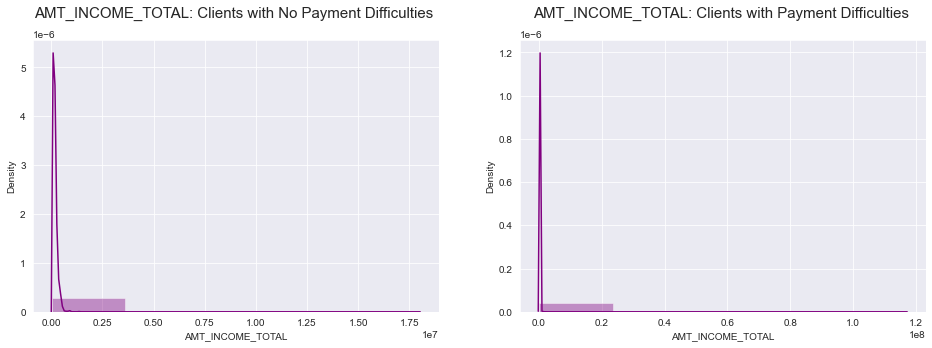

In [98]:
# Plot
plot_num("AMT_INCOME_TOTAL")

-  The income of Clients with Payment Difficulties is mostly till the range 4 lac approx, it's the same for  Clients with no Payment Difficulties

- #### Analysing `"AGE"` variable

  AGE :- Client's age in years at the time of application

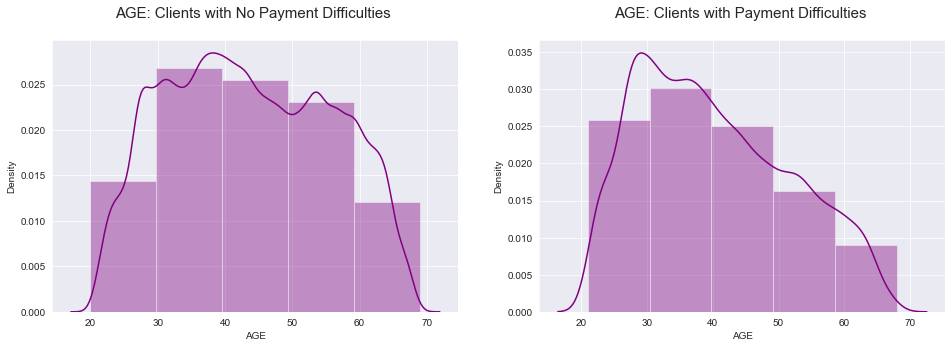

In [99]:
# Plot
plot_num("AGE")

- Majority of the clients with payment difficulties are between the age of 30-40 and then it keeps on decreasing which is good. 
- So we need to be more alert between age 30-40 to avoid defualters.
- For clients wih no payment difficulties, the peak is high between age 30-40 which is same for clients with payment difficulties and the next high peak is age between 40-50.

- #### Analysing `"AMT_CREDIT"` variable

  AMT_CREDIT :- Credit amount of the loan

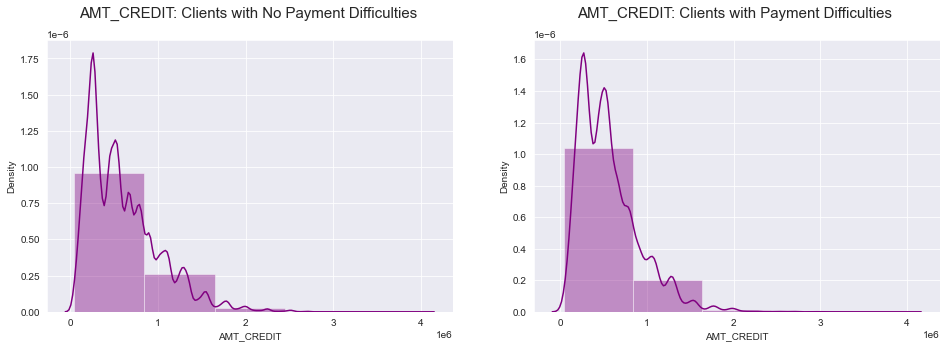

In [100]:
# Plot
plot_num("AMT_CREDIT")

- The credit amount is the loan amount approved by company to client.
- Most of the credit amount is above 11 lacs for Clients with No Payment Difficulties while for  Clients with Payment Difficulties above 10 lacs.

- #### Analysing `"AMT_ANNUITY"` variable

  AMT_ANNUITY :- Loan annuity is the monthly payment that client will pay to repay credit loan.


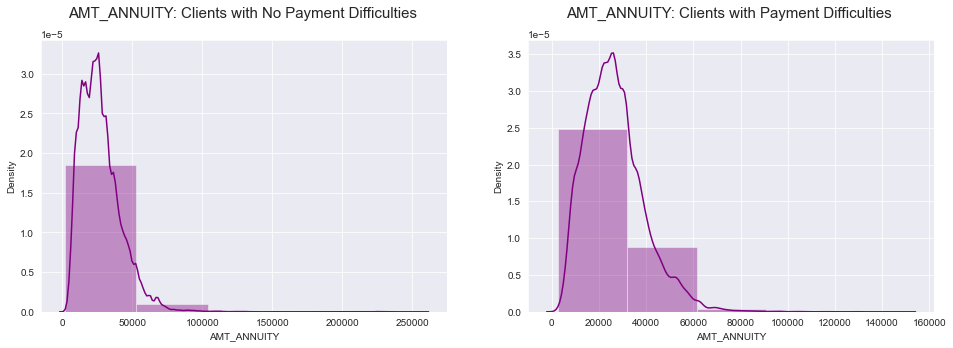

In [101]:
# Plot
plot_num("AMT_ANNUITY")

- The maximum annuity range for clients with payment difficulties is between 20000 to 40000 and then it starts falling.
- Whereas for clients with no payment difficulties have range between 10000 -50000.
- The annuity range is little similar for both types of clients.

- #### Analysing `"AMT_GOODS_PRICE"` variable

  AMT_GOODS_PRICE :- For consumer loans it is the price of the goods for which the loan is given



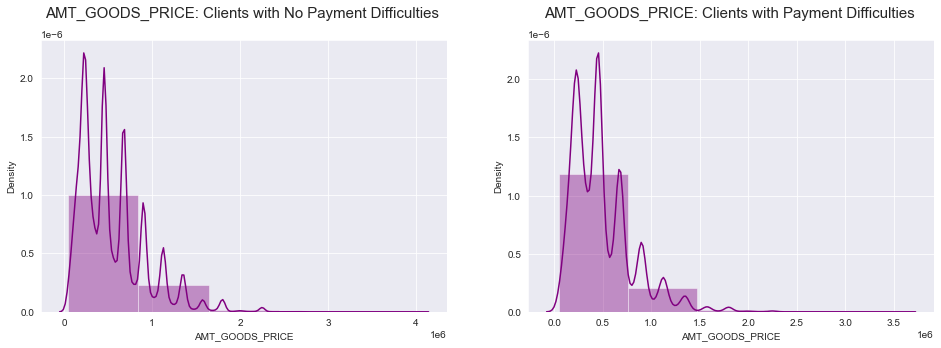

In [102]:
# Plot
plot_num("AMT_GOODS_PRICE")

- Few clients have applied for products whose proce is high.


- #### Analysing `"CNT_CHILDREN"` variable

  CNT_CHILDREN :- Number of children the client has

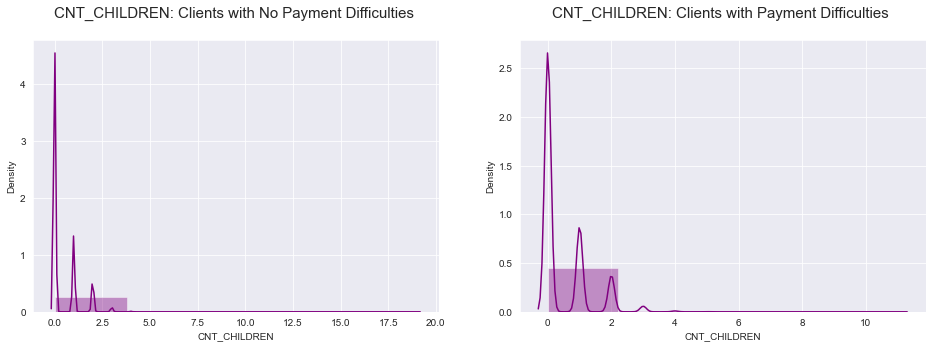

In [103]:
# Plot
plot_num('CNT_CHILDREN')

- Majority of clients have between 0-1 for Clients with no payment difficulties.
- While for Clients with payment difficulties many of them don't have kids.

- #### Analysing `"CNT_FAM_MEMBERS"` variable

  CNT_FAM_MEMBERS :- How many family members does client have

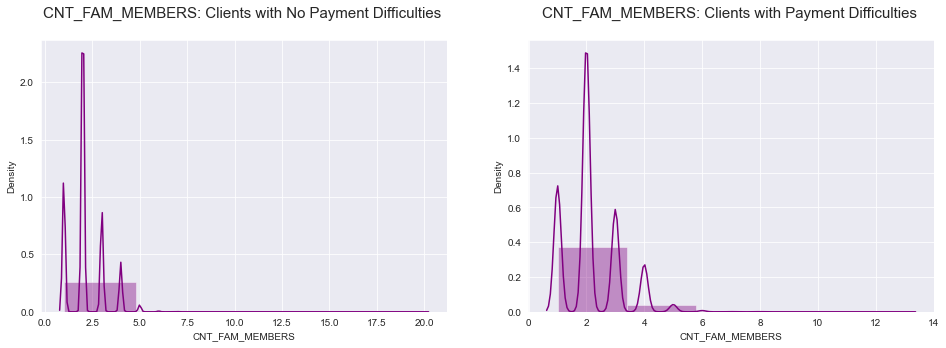

In [104]:
# Plot
plot_num('CNT_FAM_MEMBERS')

- Clients with no payment difficulties have family members ranging from 1 to 4.
- While for clients with payment difficulties have family members till 5.

- #### Analysing `"YEARS_EMPLOYED"` variable

  YEARS_EMPLOYED :- How many years before the application the person started current employment

  Assumption :- Corrected view of the distribution with feasible employment years.

In [105]:
# Assumption :- Corrected view of the distribution with feasible employment years.

# Clients with "No Payment difficulties".
YEARS_EMPLOYED_corrected_0 = new_app_0 [new_app_0.YEARS_EMPLOYED <100]

# Clients with "Payment difficulties".

YEARS_EMPLOYED_corrected_1 = new_app_1 [new_app_1.YEARS_EMPLOYED <100]



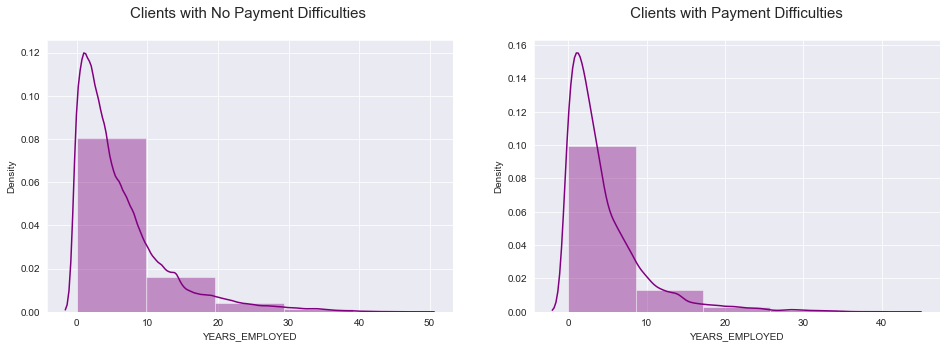

In [106]:
# Distribution plot

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,5])

sns.set_style('darkgrid')

# Distribution plot for Variable  for Clients with "No Payment difficulties"

plt.subplot(1,2,1)

sns.distplot(YEARS_EMPLOYED_corrected_0["YEARS_EMPLOYED"], color='Purple', kde=True, bins=5)

# Labelling
plt.title(f'Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
plt.xlabel("YEARS_EMPLOYED", fontsize = 10, fontweight=1.5)
   


# Distribution plot for Variable  for Clients with "Payment difficulties"
plt.subplot(1,2,2)

sns.distplot(YEARS_EMPLOYED_corrected_1["YEARS_EMPLOYED"], color='Purple', kde=True, bins=5)

# Labelling
plt.title(f' Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
plt.xlabel("YEARS_EMPLOYED", fontsize = 10, fontweight=1.5)

plt.show()


- For both clients with or without Payment difficulties, the peak number of applicants are working with the current organization for less than 5 years of employment and drops considerably after that.

NOTE :- The data regarding Days Employed of the client has outliers which were recognized in our analysis and predictably skews the data, the plots were corrected to remove such outliers by adding a reasonable limit to the employment years. 


- ### Subtask 3.2: Segmented Univariate Analysis of Numeric Variables

It is apparent from our previous analysis that a big portion of the applicants are between the ages of 25-45 years, segmented analysis aims to provide a deeper insight into this age group.

Segmented Univariate Analysis :-  Clients with "No Payment difficulties" vs  Clients with "Payment difficulties"

In [107]:
# Create segmented dataframe for Clients with "No Payment difficulties"
new_app_0_segmented = new_app_0[np.logical_and(new_app_0.AGE>25, new_app_0.AGE<45)]

In [108]:
# Top 5 rows of dataframe.
new_app_0_segmented.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
6       100009       0         Cash loans      Female            Y   
9       100012       0    Revolving loans        Male            N   
10      100014       0         Cash loans      Female            N   
12      100016       0         Cash loans      Female            N   
13      100017       0         Cash loans        Male            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
6                Y             1            171000     1560726        41301   
9                Y             0            135000      405000        20250   
10               Y             1            112500      652500        21177   
12               Y             0             67500       80865         5881   
13               N             1            225000      918468        28966   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
6           1395000   Unaccompanied  Commercial associate   
9            405000   Unaccompanied               Working   
10           652500   Unaccompanied               Working   
12            67500   Unaccompanied               Working   
13           697500   Unaccompanied               Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
6                Higher education               Married  House / apartment   
9   Secondary / secondary special  Single / not married  House / apartment   
10               Higher education               Married  House / apartment   
12  Secondary / secondary special               Married  House / apartment   
13  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
6                            0     Accountants                3   
9                            0        Laborers                1   
10                           0      Core staff                3   
12                           0        Laborers                2   
13                           0         Drivers                3   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
6                      2                            2   
9                      2                            2   
10                     2                            2   
12                     2                            2   
13                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
6                      SUNDAY                       16   
9                    THURSDAY                        8   
10                   SATURDAY                       15   
12                     FRIDAY                       10   
13                   THURSDAY                       13   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
6                            0                           0   
9                            0                           0   
10                           0                           0   
12                           0                           0   
13                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
6                             0                       0   
9                             0                       0   
10                            0                       0   
12                            0                       0   
13                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
6                        0                        0  Business Entity Type 3   
9                        0                        0             Electricity   
10                       0                        0                Medicine   
12                       0                        0  Business Entity Type 2   
13                       0                        0   

In [109]:
# Check the column wise info 
new_app_0_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138127 entries, 6 to 307508
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   138127 non-null  int64   
 1   TARGET                       138127 non-null  int64   
 2   NAME_CONTRACT_TYPE           138127 non-null  object  
 3   CODE_GENDER                  138127 non-null  object  
 4   FLAG_OWN_CAR                 138127 non-null  object  
 5   FLAG_OWN_REALTY              138127 non-null  object  
 6   CNT_CHILDREN                 138127 non-null  int64   
 7   AMT_INCOME_TOTAL             138127 non-null  int64   
 8   AMT_CREDIT                   138127 non-null  int64   
 9   AMT_ANNUITY                  138127 non-null  int64   
 10  AMT_GOODS_PRICE              138127 non-null  int64   
 11  NAME_TYPE_SUITE              138127 non-null  object  
 12  NAME_INCOME_TYPE             138127 non-null

In [110]:
# Create segmented dataframe for Clients with "Payment difficulties"

new_app_1_segmented = new_app_1[np.logical_and(new_app_1.AGE>25, new_app_1.AGE<45)]

In [111]:
# Top 5 rows of dataframe.
new_app_1_segmented.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
42       100049       1         Cash loans      Female            N   
94       100112       1         Cash loans        Male            Y   
110      100130       1         Cash loans      Female            N   
180      100209       1    Revolving loans        Male            N   
184      100214       1         Cash loans      Female            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
42                N             0            135000      288873        16258   
94                Y             0            315000      953460        64107   
110               Y             1            157500      723996        30802   
180               Y             3            180000      540000        27000   
184               Y             1            202500      436032        28516   

     AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
42            238500   Unaccompanied               Working   
94            900000          Family  Commercial associate   
110           585000   Unaccompanied  Commercial associate   
180           540000   Unaccompanied  Commercial associate   
184           360000   Unaccompanied  Commercial associate   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
42   Secondary / secondary special        Civil marriage  House / apartment   
94               Incomplete higher  Single / not married       With parents   
110              Incomplete higher             Separated  House / apartment   
180               Higher education               Married  House / apartment   
184               Higher education        Civil marriage  House / apartment   

     REGION_POPULATION_RELATIVE        OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
42                            0            Sales staff                2   
94                            0                    NaN                1   
110                           0            Sales staff                2   
180                           0  High skill tech staff                5   
184                           0                    NaN                3   

     REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
42                      3                            3   
94                      2                            2   
110                     2                            2   
180                     2                            2   
184                     1                            1   

    WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
42                    THURSDAY                       11   
94                      SUNDAY                       13   
110                     SUNDAY                       12   
180                   THURSDAY                       18   
184                  WEDNESDAY                       14   

     REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
42                            0                           0   
94                            0                           0   
110                           0                           1   
180                           0                           0   
184                           0                           0   

     LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
42                             0                       0   
94                             0                       0   
110                            1                       0   
180                            0                       0   
184                            0                       0   

     REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
42                        0                        0           Self-employed   
94                        1                        1        Industry: type 4   
110                       1                        1           Trade: type 2   
180                       0       

In [112]:
# Check the column wise info 
new_app_1_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14384 entries, 42 to 307509
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   14384 non-null  int64   
 1   TARGET                       14384 non-null  int64   
 2   NAME_CONTRACT_TYPE           14384 non-null  object  
 3   CODE_GENDER                  14384 non-null  object  
 4   FLAG_OWN_CAR                 14384 non-null  object  
 5   FLAG_OWN_REALTY              14384 non-null  object  
 6   CNT_CHILDREN                 14384 non-null  int64   
 7   AMT_INCOME_TOTAL             14384 non-null  int64   
 8   AMT_CREDIT                   14384 non-null  int64   
 9   AMT_ANNUITY                  14384 non-null  int64   
 10  AMT_GOODS_PRICE              14384 non-null  int64   
 11  NAME_TYPE_SUITE              14384 non-null  object  
 12  NAME_INCOME_TYPE             14384 non-null  object  
 13 

In [113]:
# Univariate Segmented Analysis of Numerical Variables

sns.set_style('darkgrid')

def plot_seg_num(var_1):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,5])

# Distribution plot for Variable  for Clients with "No Payment difficulties"
    plt.subplot(1,2,1)

    sns.distplot(new_app_0_segmented[var_1], color='Purple', kde=True, bins=5)

# Labelling
    plt.title(f'{var_1}: Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)
   


# Distribution plot for Variable  for Clients with "Payment difficulties"
    plt.subplot(1,2,2)

    sns.distplot(new_app_1_segmented[var_1], color='Purple', kde=True, bins=5)

# Labelling
    plt.title(f'{var_1}: Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)



    plt.show()

- #### Analysing `"AMT_CREDIT"` variable

  AMT_CREDIT :- Credit amount of the loan

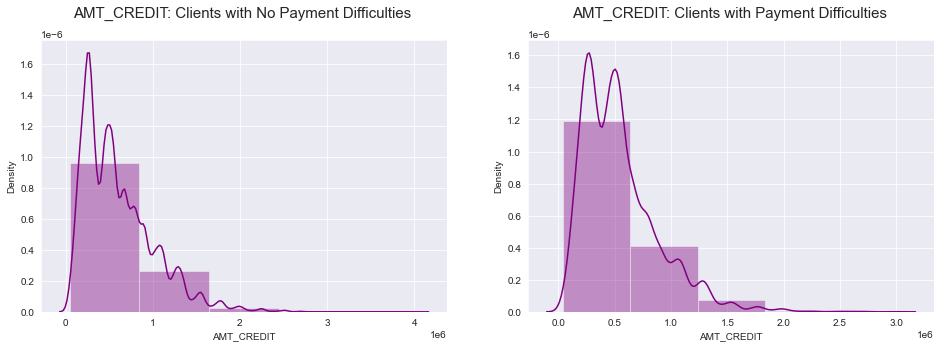

In [114]:
# Plot
plot_seg_num('AMT_CREDIT')

- The credit amount for non-defaulters is between 0- 10 lacs while for defaulters it's between 0-5 lacs.

- #### Analysing `"AMT_ANNUITY"` variable

  AMT_ANNUITY :- Loan annuity is the monthly payment that client will pay to repay credit loan.


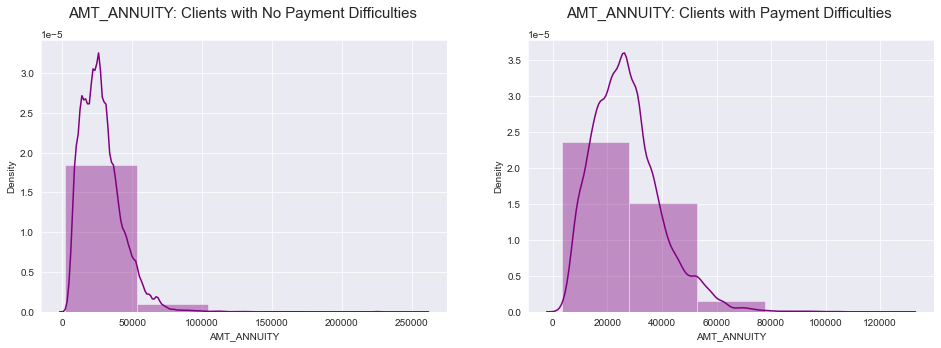

In [115]:
# Plot
plot_seg_num('AMT_ANNUITY')

- Many non-defaulters pay annuity till 50000 and then the clients decreases.
- While many defaulters pay annuity starting from 0 -30000 and then client size reduces.

- #### Analysing `"AGE"` variable

  AGE :- Client's age in years at the time of application

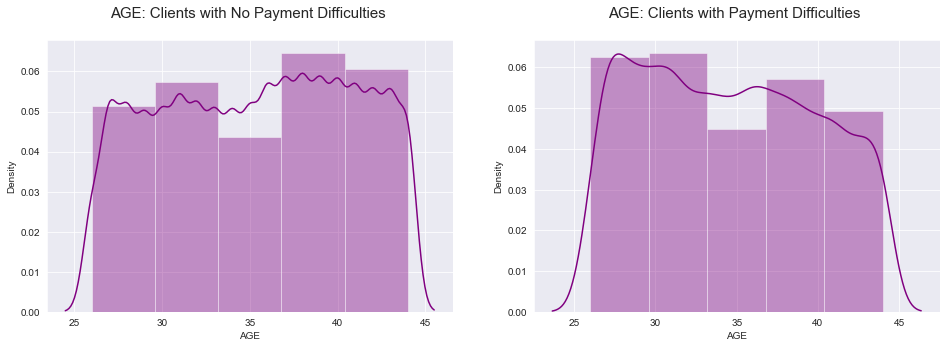

In [116]:
# Plot
plot_seg_num('AGE')

- The age distribution shows a much higher number of defaulters at the lower end of the age group.

- #### Analysing `"YEARS_EMPLOYED"` variable

  YEARS_EMPLOYED :- How many years before the application the person started current employment

  Assumption :- Corrected view of the distribution with feasible employment years.

In [117]:
# Assumption :- Corrected view of the distribution with feasible employment years.

# Clients with "No Payment difficulties".
YEARS_EMPLOYED_corrected_0_seg = new_app_0_segmented [new_app_0_segmented.YEARS_EMPLOYED <100]

# Clients with "Payment difficulties".

YEARS_EMPLOYED_corrected_1_seg = new_app_1_segmented [new_app_1_segmented.YEARS_EMPLOYED <100]



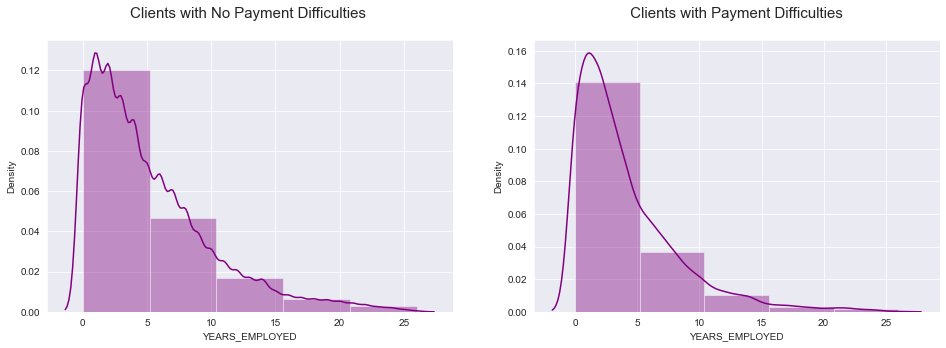

In [118]:
# Distribution plot

sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,5])

# Distribution plot for Variable  for Clients with "No Payment difficulties"

plt.subplot(1,2,1)

sns.distplot(YEARS_EMPLOYED_corrected_0_seg["YEARS_EMPLOYED"], color='Purple', kde=True, bins=5)

# Labelling
plt.title(f'Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
plt.xlabel("YEARS_EMPLOYED", fontsize = 10, fontweight=1.5)
   


# Distribution plot for Variable  for Clients with "Payment difficulties"
plt.subplot(1,2,2)

sns.distplot(YEARS_EMPLOYED_corrected_1_seg["YEARS_EMPLOYED"], color='Purple', kde=True, bins=5)

# Labelling
plt.title(f' Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
plt.xlabel("YEARS_EMPLOYED", fontsize = 10, fontweight=1.5)

plt.show()


- Segmentation of the data further emphasizes the large number of applicants that are with 0-5 years of employment in current organization.


- #### Analysing `"CNT_CHILDREN"` variable

  CNT_CHILDREN :- Number of children the client has

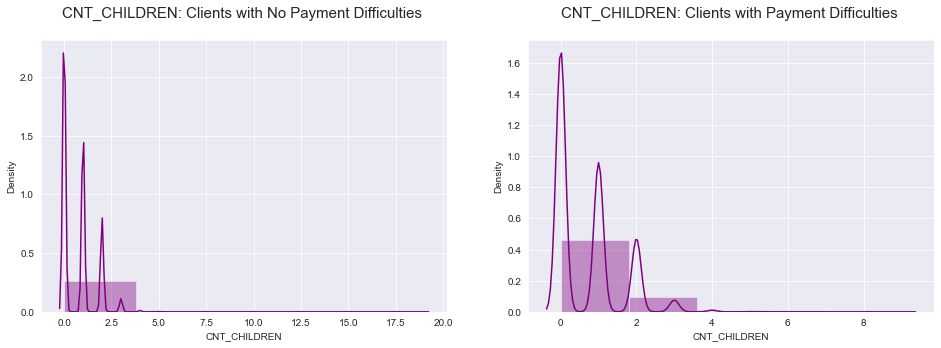

In [119]:
# Plot
plot_seg_num('CNT_CHILDREN')

- In segmented, maximum number of clients have zero kids for both defaulters and non-defaulters.

- ### Subtask 3.3: Univariate Analysis of Categorical Variables

Univariate Analysis :- Clients with "No Payment difficulties" vs Clients with "Payment difficulties"

In [120]:
# Univariate Analysis of Categorical Variables
sns.set_style('darkgrid')

def plot_cat(var_2):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=[20,7])

# Count plot for Variable  for Clients with No Payment Difficulties
    plt.subplot(1,2,1)

    sns.countplot(var_2, data = new_app_0)

# Labelling
    plt.title(f'{var_2}: Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size = 15)
    plt.yticks(rotation = 0, size = 15)
    
    
   
    
    

# Count plot for Variable  for Clients with Payment Difficulties
    plt.subplot(1,2,2)

    sns.countplot(var_2, data = new_app_1)

# Labelling
    plt.title(f'{var_2}: Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size = 15)
    plt.yticks(rotation = 0, size = 15)

   

    
    
    plt.show()

- #### Analysing `"NAME_CONTRACT_TYPE"` variable

  NAME_CONTRACT_TYPE :- To identify  loan is cash or revolving

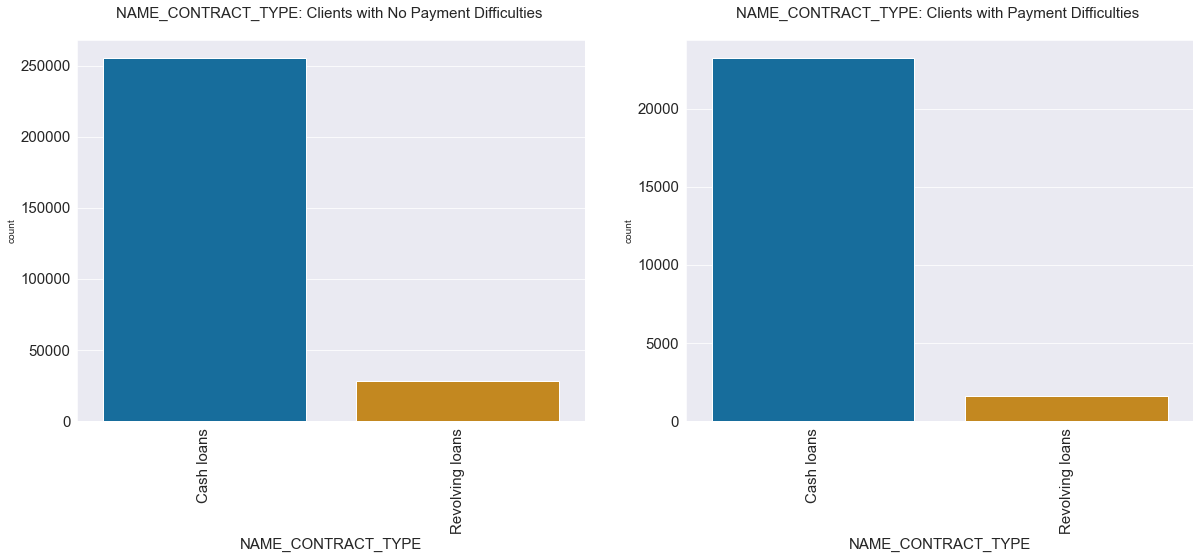

In [121]:
# Plot
plot_cat('NAME_CONTRACT_TYPE')

- Cash loans  overall are more popular than the revolving loans.

- While revolving loans have a comparatively  higher number of defaulters.


In [122]:
# Clients with Payment Difficulties, the ratio between cash and revolving loans.
round((new_app_1.NAME_CONTRACT_TYPE.value_counts()[1]/new_app_1.NAME_CONTRACT_TYPE.value_counts()[0]),2)

0.07

In [123]:
# Clients with No Payment Difficulties, the ratio between cash and revolving loans.
round((new_app_0.NAME_CONTRACT_TYPE.value_counts()[1]/new_app_0.NAME_CONTRACT_TYPE.value_counts()[0]),2) 

0.11

- Cash loans are overall more popular than the revolving loans, while revolving loans have a comparatively fewer defaulters.

- #### Analysing "CODE_GENDER" variable

  CODE_GENDER :- Gender of the client

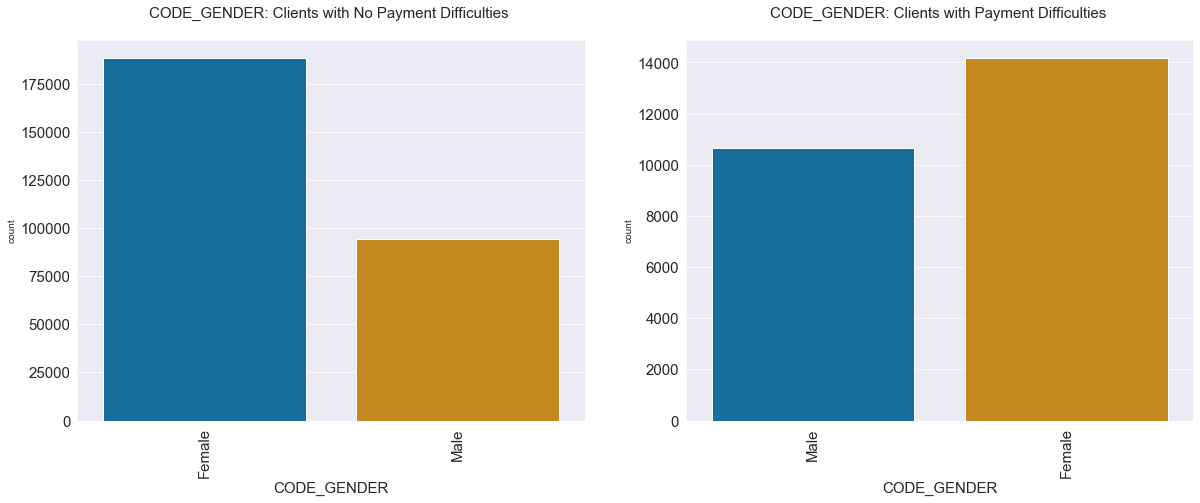

In [124]:
# Plot
plot_cat('CODE_GENDER')

- Females are paying credit on time and at the same time they are defaulting on loans.
- This contradicts, so deeper investigation is required.

- #### Analysing `"FLAG_OWN_CAR"` variable

  FLAG_OWN_CAR :-If the client owns a car

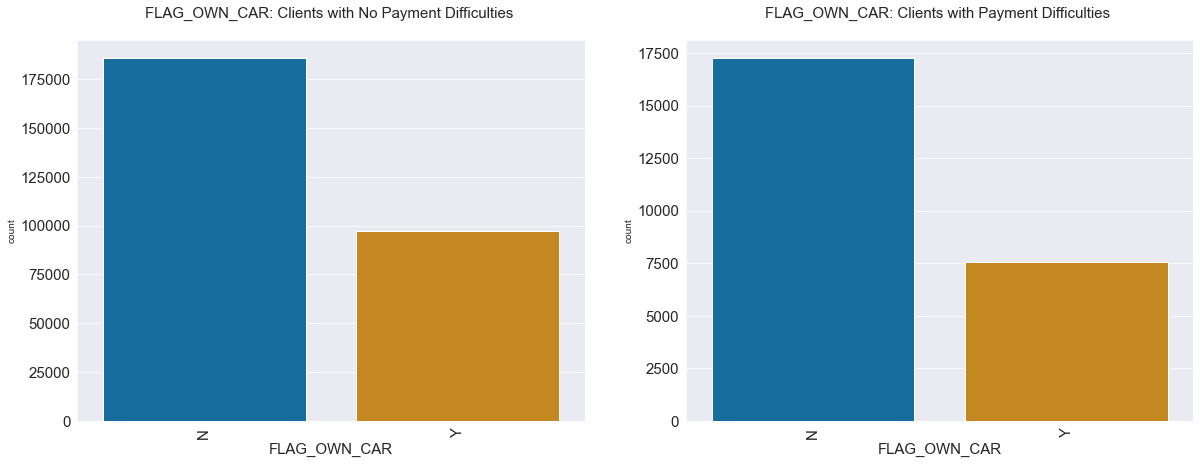

In [125]:
# Plot
plot_cat('FLAG_OWN_CAR')

- The client without owning a car have defaulted more than those who have cars.

- #### Analysing `"FLAG_OWN_REALTY"` variable

  FLAG_OWN_REALTY :- If client owns a house or flat

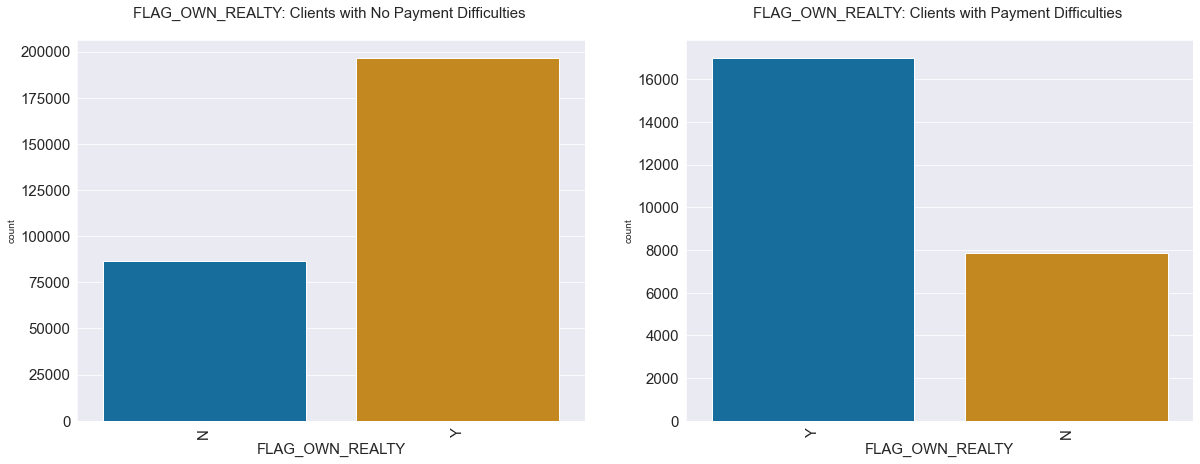

In [126]:
# Plot
plot_cat('FLAG_OWN_REALTY')

- Considerable number  of the clients with payment difficulties already own some kind of realty and this could mean that they might have some existing loans on that own_realty. (Point is important for recommendations)
- This might be the indicator of more ongoing loans and bigger expenses.

- #### Analysing `"NAME_INCOME_TYPE"` variable

  NAME_INCOME_TYPE :- Clients income type .

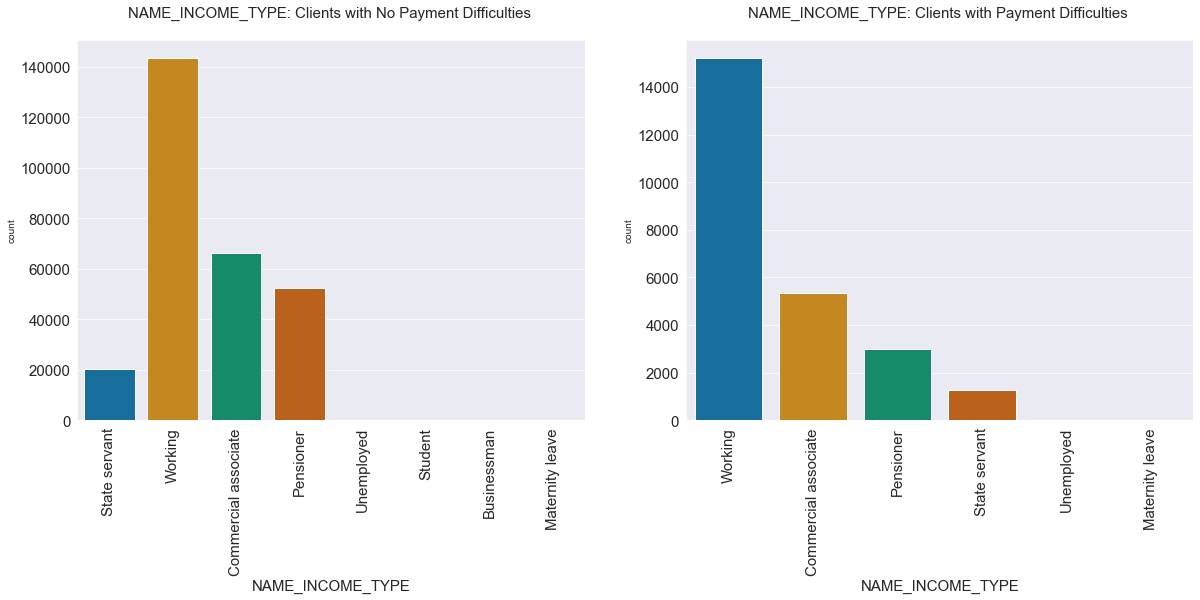

In [127]:
# Plot
plot_cat('NAME_INCOME_TYPE')

- Majority of the defaulter  applicants are from ‘Working’ income type. Followed by Commercial associate and pensioners.
- Also, for non-defaulter's the applicants are same like defaulter's from ‘Working’ income type. Followed by Commercial associate and pensioners.


- #### Analysing `"NAME_EDUCATION_TYPE"` variable

  NAME_EDUCATION_TYPE :- Level of highest education the client achieved


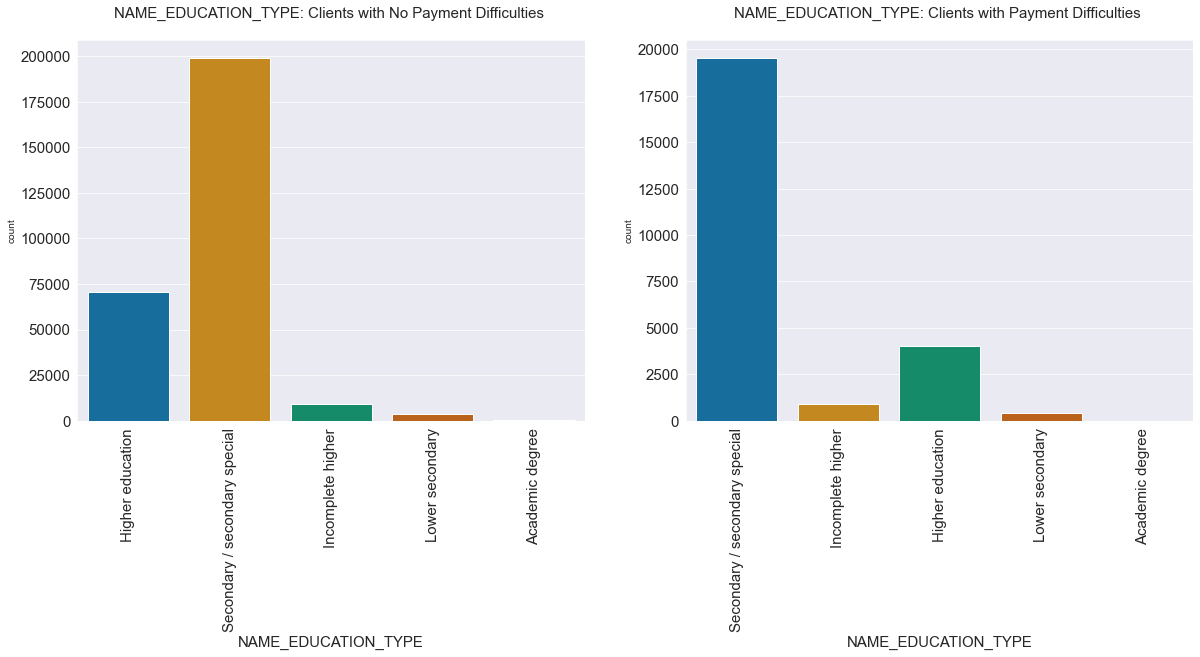

In [128]:
# Plot
plot_cat('NAME_EDUCATION_TYPE')

- Secondary education have the highest count as both in non-defaulters and defaulters.


- #### Analysing `"OCCUPATION_TYPE"` variable

  OCCUPATION_TYPE :- The kind of occupation does the client have



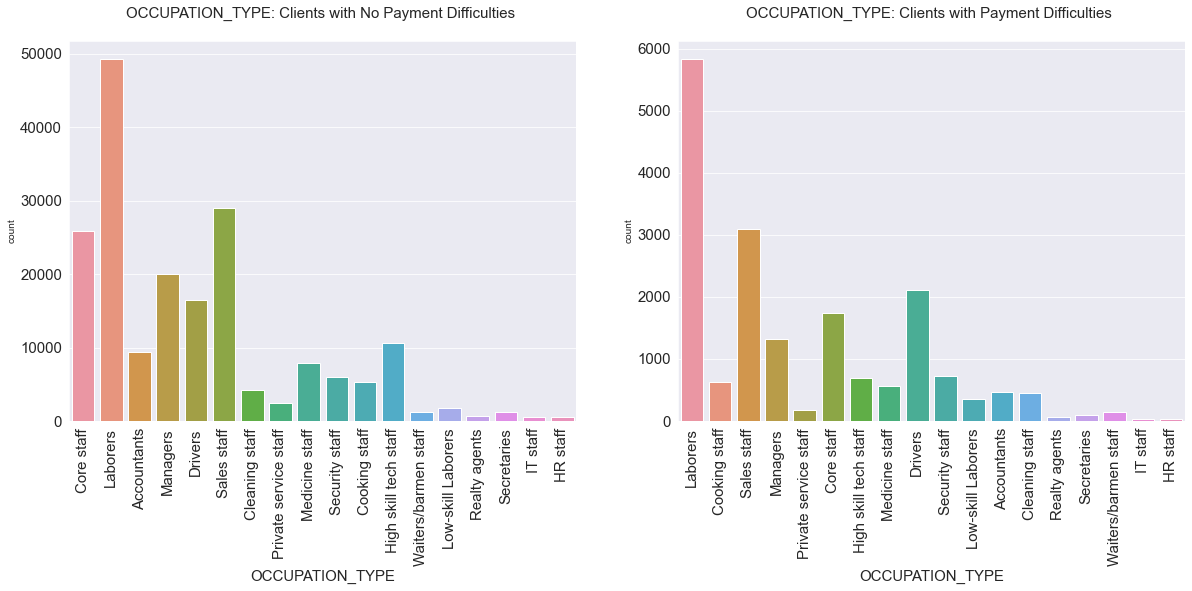

In [129]:
# Plot
plot_cat('OCCUPATION_TYPE')

- A big portion of the clientele is form occupation of Laborer, Sales Staff and core staff.

- #### Analysing `"ORGANIZATION_TYPE"` variable

  ORGANIZATION_TYPE :- Type of organization where client works



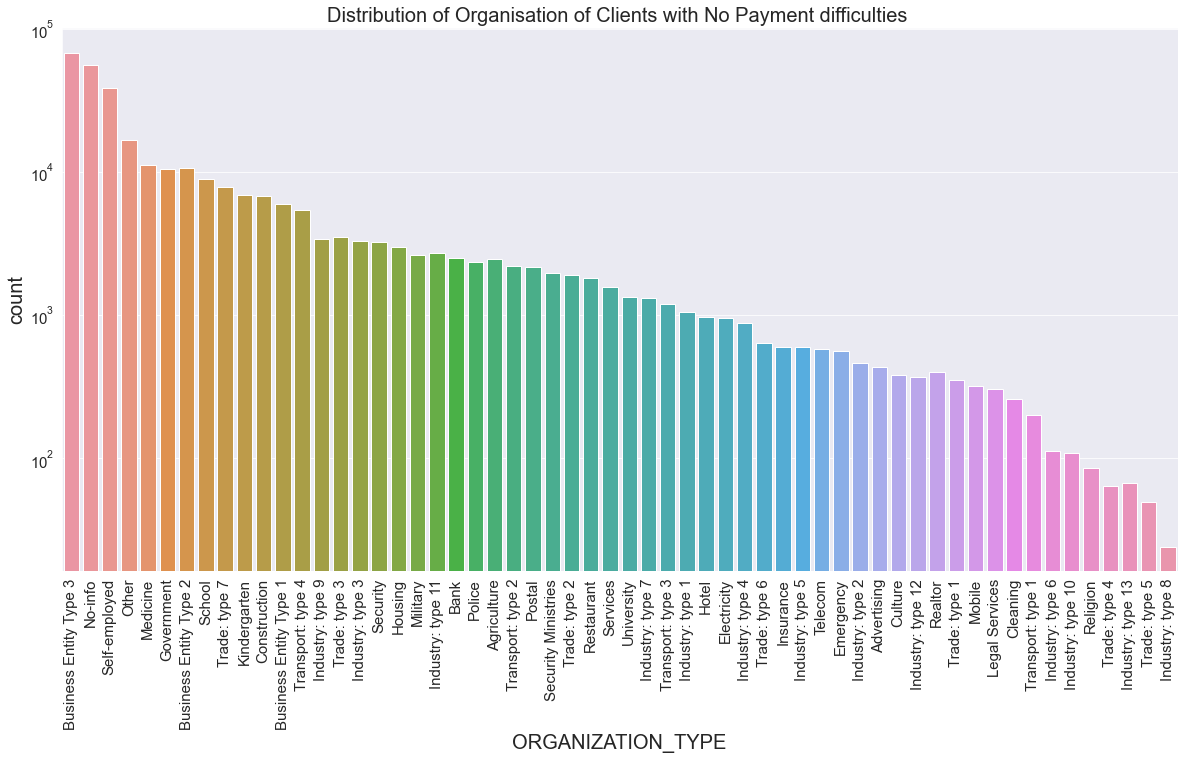

In [130]:
# Countplot for Clients with No Payment difficulties.
#plt.figure(figsize=[30,20])
plt.rcParams["figure.figsize"] = [20, 10]


plt.xlabel('ORGANIZATION_TYPE ' , size = 20)
plt.ylabel('Count' , size =20)
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 15)

plt.title( "Distribution of Organisation of Clients with No Payment difficulties ",size = 20)
plt.yscale('log')


sns.countplot(x = 'ORGANIZATION_TYPE', order=new_app_0['ORGANIZATION_TYPE'].value_counts().index,data = new_app)
plt.show()

- For Clients with No Payment difficulties, business entity type 3 have applied for loan the highest count as compared to other.

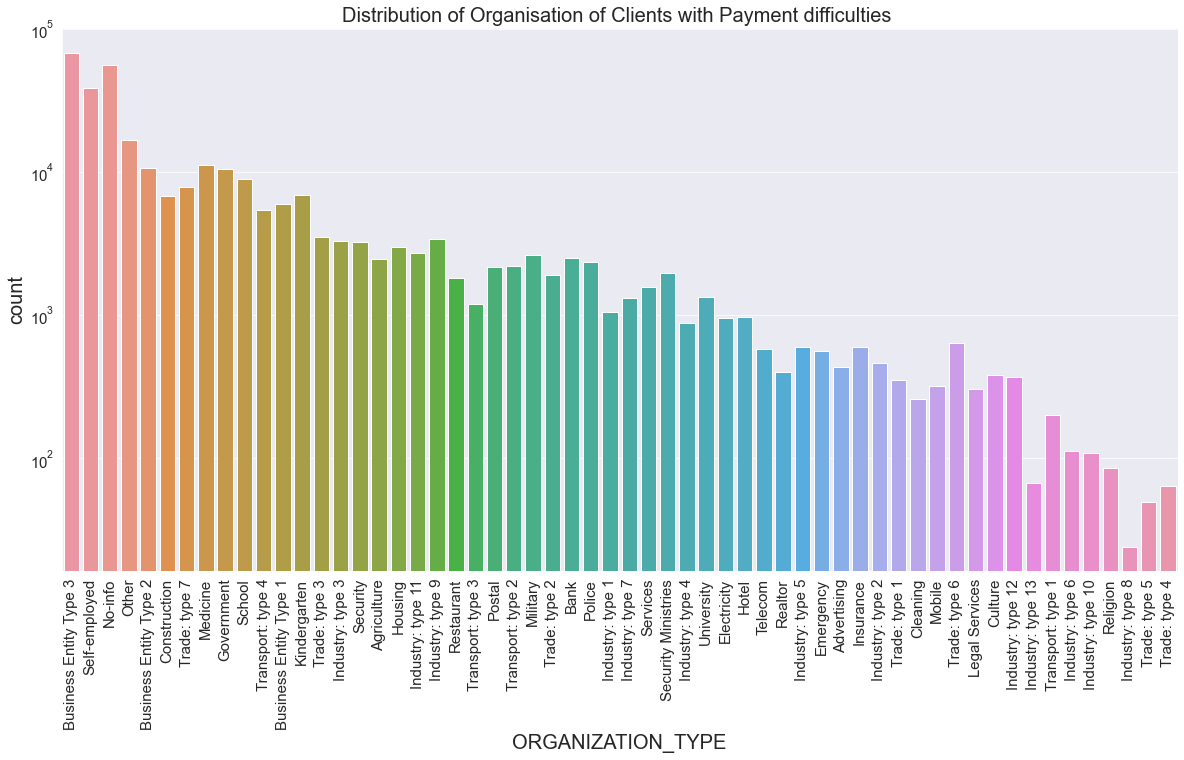

In [131]:
# Countplot for Clients with Payment difficulties.
#plt.figure(figsize=[30,20])
plt.rcParams["figure.figsize"] = [20, 10]
plt.title('ORGANIZATION_TYPE')

plt.xlabel('ORGANIZATION_TYPE ' , size = 20)
plt.ylabel('Count' , size =20)
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 15)

plt.title( "Distribution of Organisation of Clients with Payment difficulties ",size = 20)
plt.yscale('log')


sns.countplot(x = 'ORGANIZATION_TYPE', order=new_app_1['ORGANIZATION_TYPE'].value_counts().index,data = new_app)
plt.show()

- For Clients with Payment difficulties, business entity type 3 have applied for loan the highest count as compared to other.

- ### Subtask 3.3: Bivariate Analysis

Bivariate Analysis :- Clients with "No Payment difficulties" vs Clients with "Payment difficulties"

- ####  Numerical vs Numerical Variables

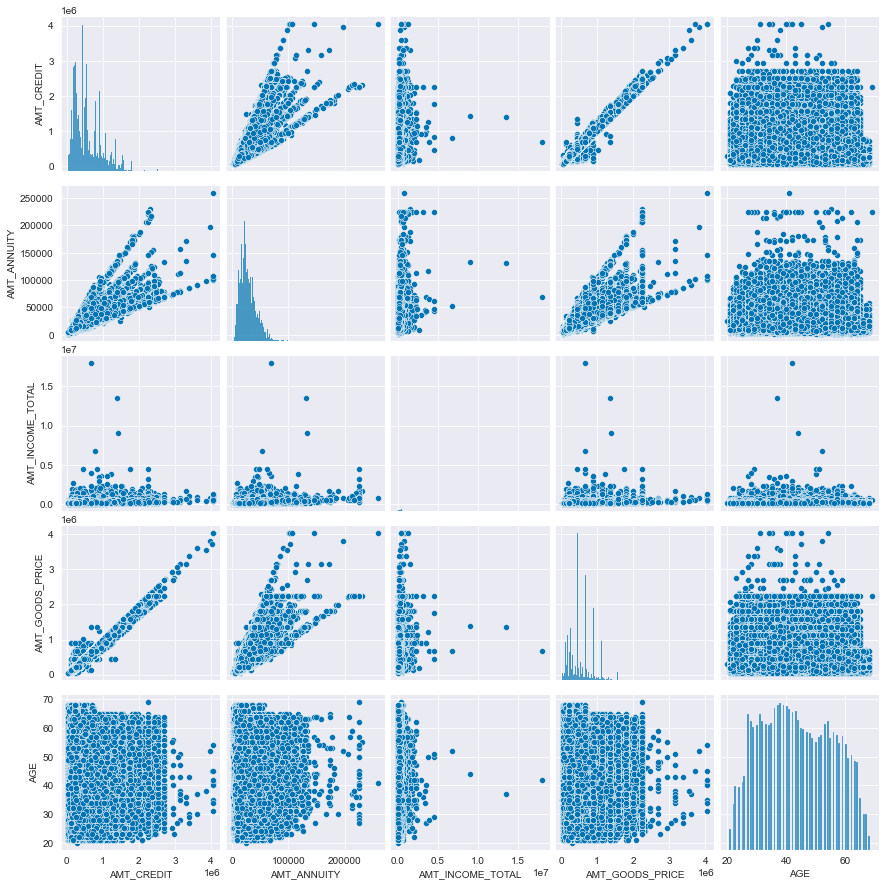

In [132]:
# Pairplot for Clients with No Payment Difficulties - new_app_0
sns.set_style('darkgrid')

sns.pairplot(data = new_app_0, vars=["AMT_CREDIT","AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AGE"])

plt.show()

 Clients with No Payment Difficulties - new_app_0
- AMT_GOODS_PRICE and AMT_CREDIT have strong linear relationship.
- Age and AMT_CREDIT, they are very scattered and hence they don't have strong relation with each other.
- AMT_CREDIT and AMT_ANNUITY are strongly correlated.

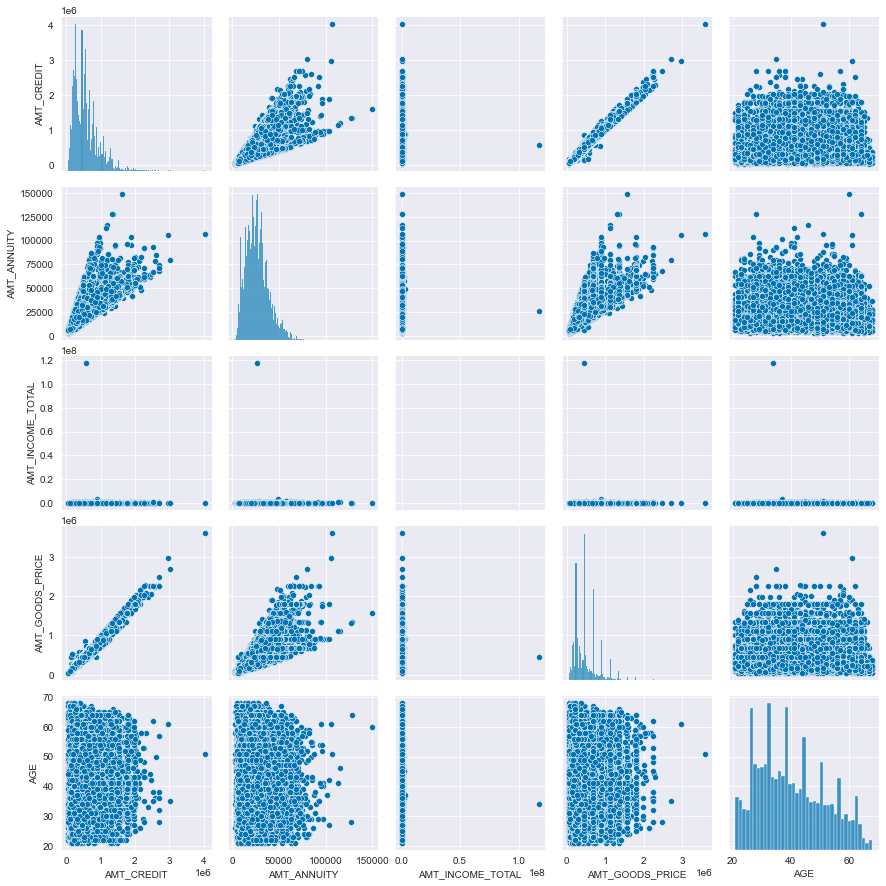

In [133]:
# Pairplot for Clients with Payment Difficulties - new_app_1
sns.set_style('darkgrid')

sns.pairplot(data = new_app_1, vars=["AMT_CREDIT","AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AGE"])
plt.show()

Clients with Payment Difficulties - new_app_1
- AMT_CREDIT and AMT_INCOME_TOTAL have no relationship with each other.
- AMT_GOODS_PRICE and AMT_CREDIT have strongly relationship with each other.


- ##### CNT_FAM_MEMBERS  vs CNT_CHILDREN

   CNT_FAM_MEMBERS :- How many family members does client have.
   
   CNT_CHILDREN :- Number of children the client has.


In [134]:
# Bivariate Analysis of Variables
sns.set_style('darkgrid')


def plot_num(var_1, var_2):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,7])

# Scatter plot for Variable  for Clients with No Payment Difficulties
    plt.subplot(1,2,1)

    sns.scatterplot(x = var_1, y = var_2, data = new_app_0)

# Labelling
    plt.title(f'{var_1} vs {var_2}: Clients with No Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)
    plt.ylabel(var_2, fontsize = 10, fontweight=1.5)
    plt.xticks(rotation = 90)


# Scatter plot for Variable  for Clients with Payment Difficulties
    plt.subplot(1,2,2)

    sns.scatterplot(x = var_1, y = var_2, data = new_app_1)

# Labelling
    plt.title(f'{var_1} vs {var_2}: Clients with Payment Difficulties \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 10, fontweight=1.5)
    plt.ylabel(var_2, fontsize = 10, fontweight=1.5)
    plt.xticks(rotation = 90)



    plt.show()

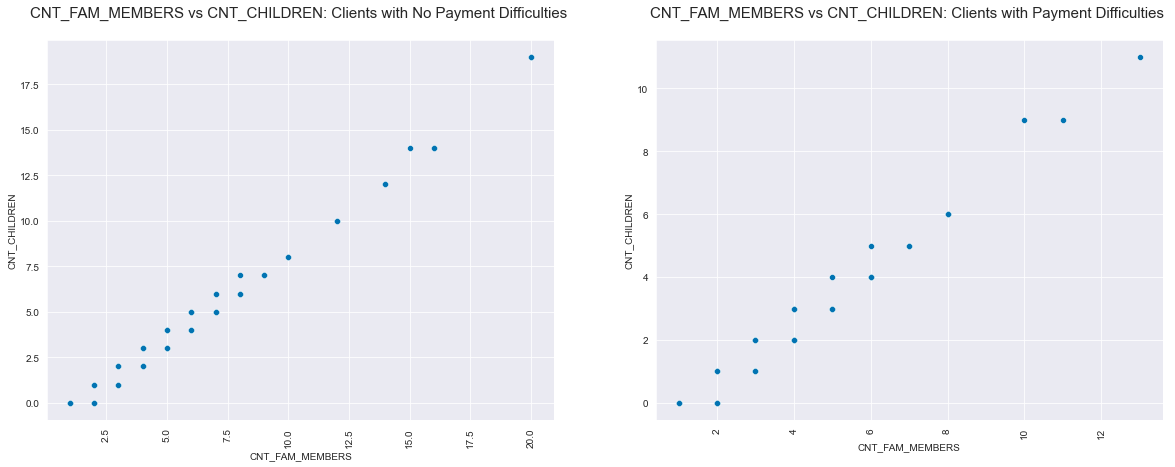

In [135]:
# Plot
plot_num("CNT_FAM_MEMBERS","CNT_CHILDREN")


- CNT_FAM_MEMBERS and CNT_CHILDREN have positive strong relationship with each other.
- Also, there are outliers.

#### Categorical vs Numerical Variables

In [136]:
# Bivariate Analysis of Variables


def plot_num_cat_0(var_1, var_2):
    plt.figure(figsize=[20,7])

# Bar plot for Variable  for Clients with No Payment Difficulties
    sns.barplot(x = var_2, y = var_1 ,data = new_app_0)
               

# Labelling
    plt.title(f'{var_1} vs {var_2} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.ylabel(var_1, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size =15)
    
    
    
    plt.show()

In [137]:
# Bivariate Analysis of Variables


def plot_num_cat_1(var_1, var_2):
    plt.figure(figsize=[20,7])

# Bar plot for Variable  for Clients with Payment Difficulties
    sns.barplot(x = var_2, y = var_1 ,data = new_app_1)

# Labelling
    plt.title(f'{var_1} vs {var_2} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.ylabel(var_1, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size =15)
    
    
    
    plt.show()

- #### AMT_CREDIT  vs NAME_CONTRACT_TYPE

   AMT_CREDIT :- Credit amount of the loan.
   
   NAME_CONTRACT_TYPE :- Identification if loan is cash or revolving.


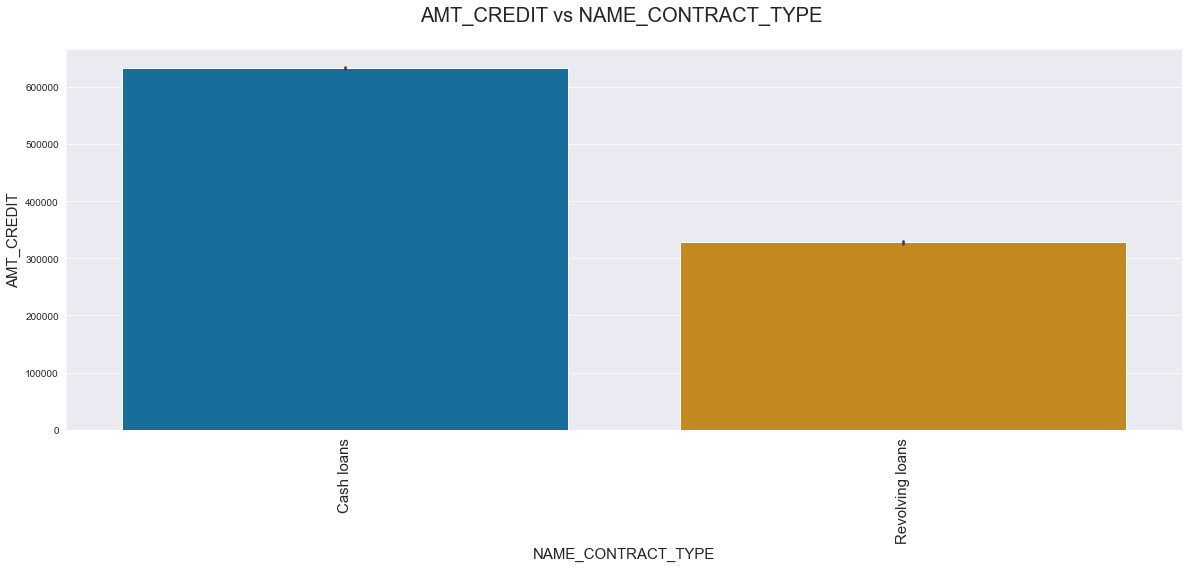

In [138]:
# Plot
plot_num_cat_0("AMT_CREDIT","NAME_CONTRACT_TYPE")

- Clients with no Payment Difficulties, clients opting for cash loans have high credit amount.

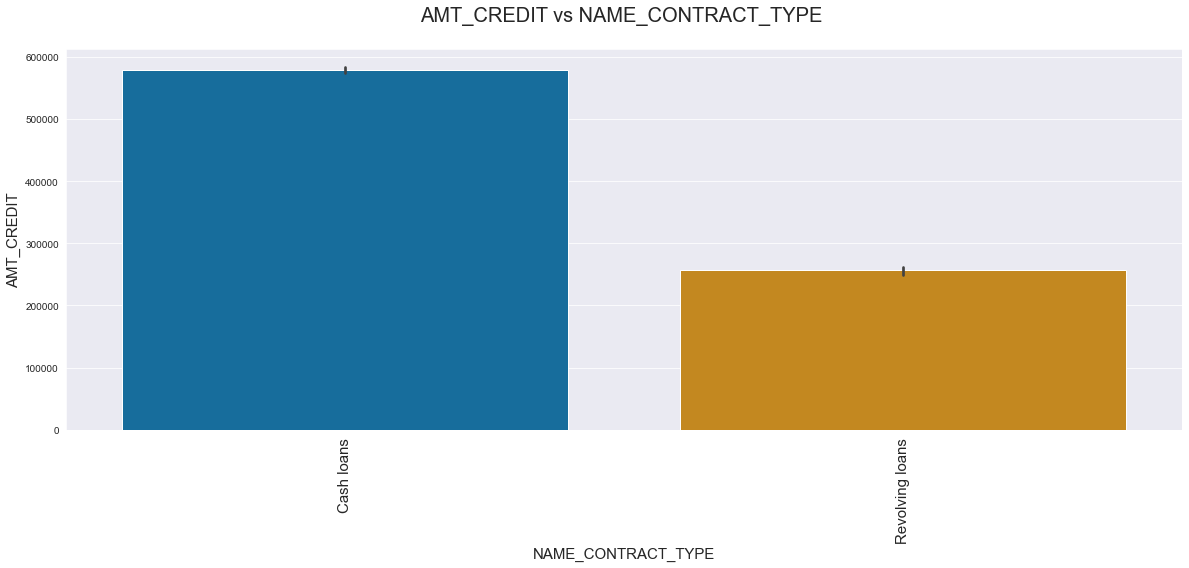

In [139]:
# Plot
plot_num_cat_1("AMT_CREDIT","NAME_CONTRACT_TYPE")

- Clients with Payment Difficulties, clients opting for cash loans have high credit amount.

- #### AGE  vs CODE_GENDER

   AGE :- Client's age in years at the time of application.
   
   CODE_GENDER :- Gender of the client.


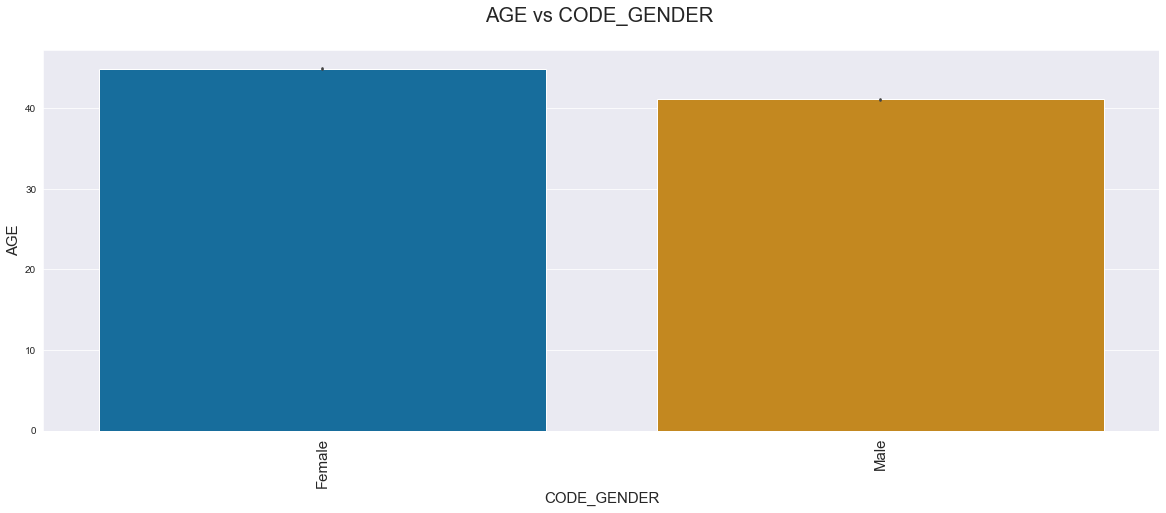

In [140]:
# Plot
plot_num_cat_0("AGE","CODE_GENDER")

- In case of Clients with No Payment Difficulties, the females age is slightly more in than males.

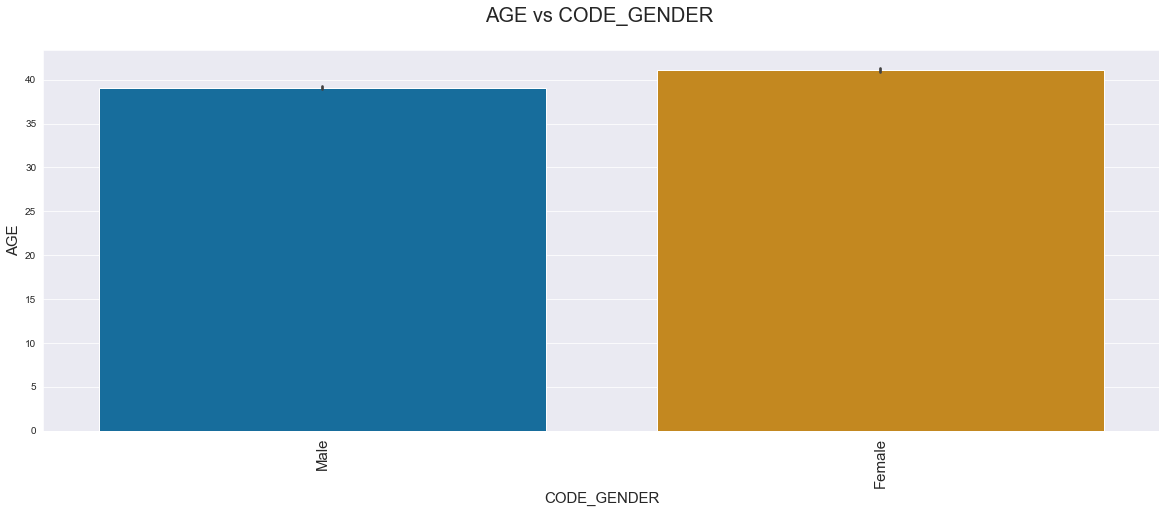

In [141]:
# Plot
plot_num_cat_1("AGE","CODE_GENDER")

- In case of  Clients with Payment Difficulties,  the females are slightly more in number than males.


- #### AGE  vs CODE_GENDER

   AGE :- Client's age in years at the time of application.
   
   CODE_GENDER :- Gender of the client.


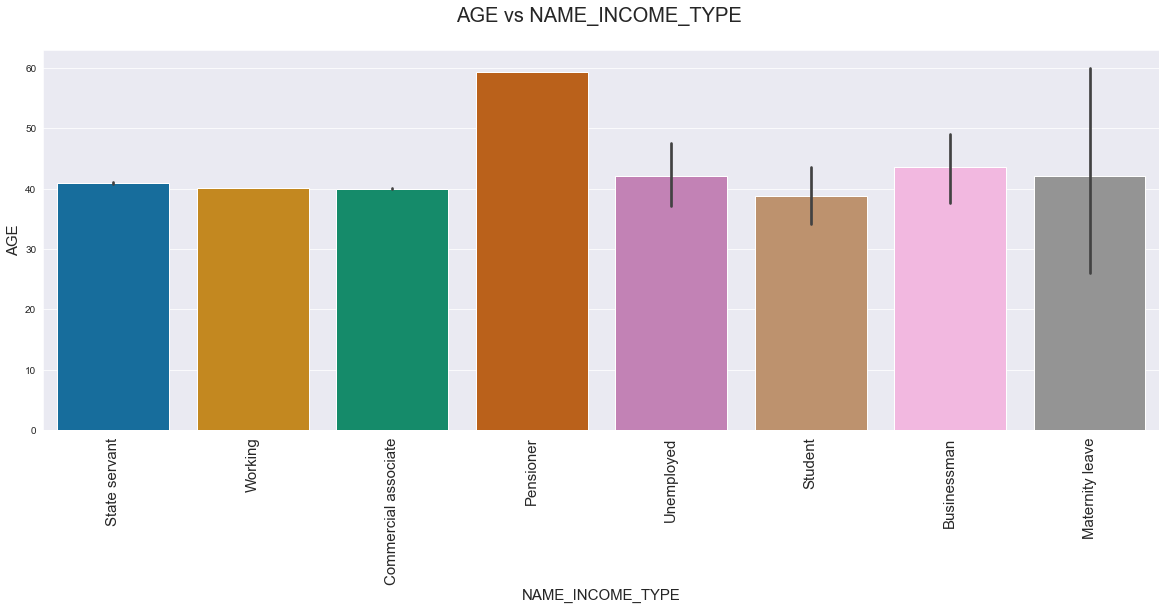

In [142]:
# Plot
plot_num_cat_0("AGE","NAME_INCOME_TYPE")

- In case of Clients with No Payment Difficulties, pensioners are quite high in number followed by businessman.

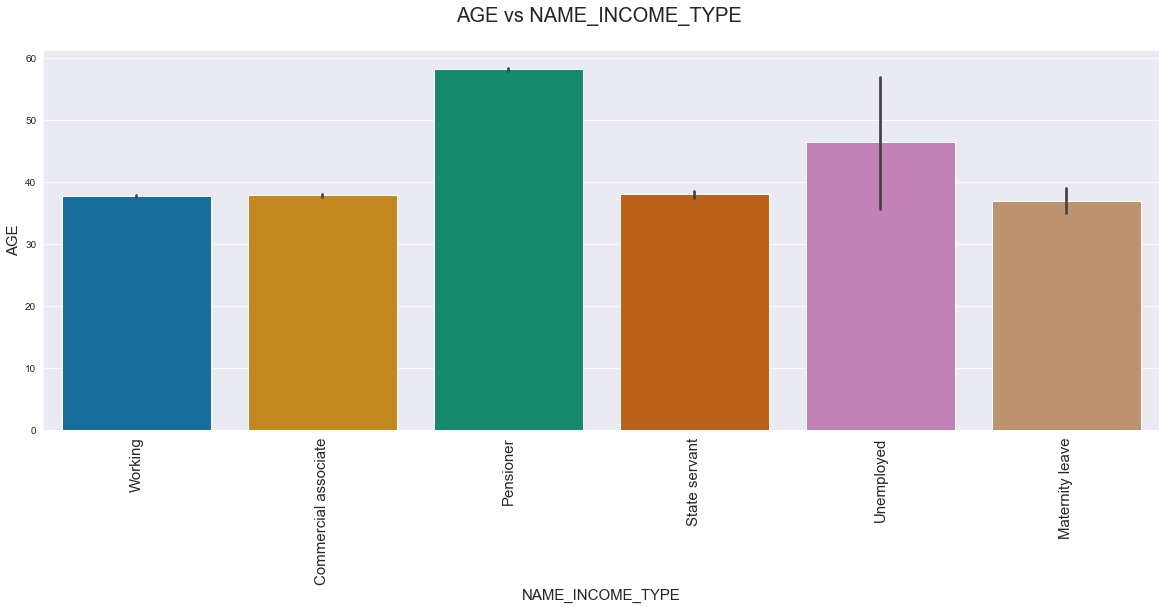

In [143]:
# Plot
plot_num_cat_1("AGE","NAME_INCOME_TYPE")

- In case of Clients with Payment Difficulties, pensioners are quite high in number followed by unemployed.
- This is serious issue of payment difficulties as both pensioners and unemployed clients can impose threat to company due to their low income.

- #### AMT_ANNUITY  vs NAME_EDUCATION_TYPE

   AMT_ANNUITY :- Loan annuity.
   
   NAME_EDUCATION_TYPE :- Level of highest education the client achieved.


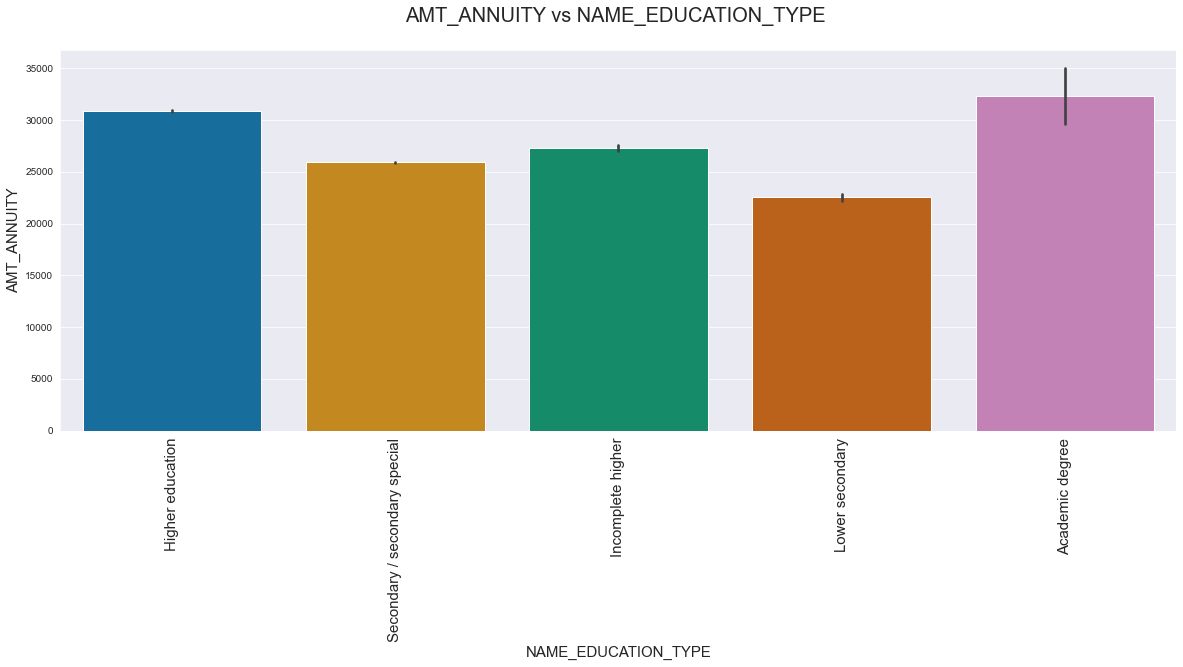

In [144]:
# Plot
plot_num_cat_0("AMT_ANNUITY","NAME_EDUCATION_TYPE")

- In case of Clients with No Payment Difficulties, clients with academic degree can pay monthly annuity of 32000 approx.

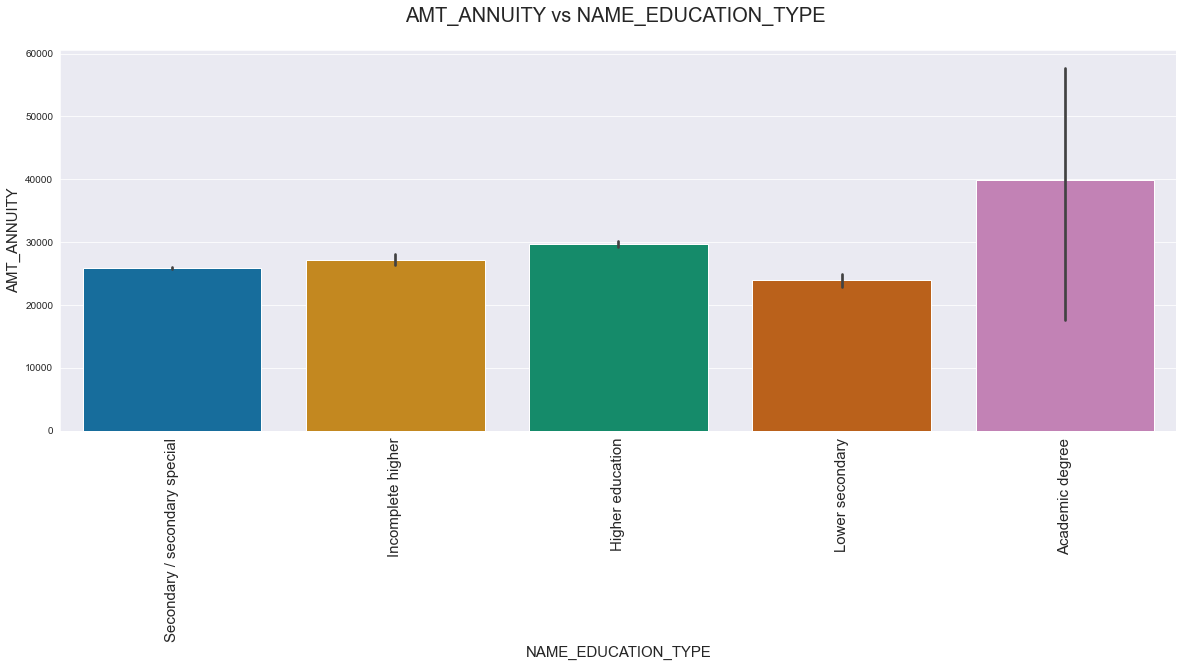

In [145]:
# Plot
plot_num_cat_1("AMT_ANNUITY","NAME_EDUCATION_TYPE")

- In case of Clients with Payment Difficulties, clients with academic degree have to pay the monthly annuity of 40000 approx.
- Hence, we need to investigate more the annual income of these clients.


- #### AMT_INCOME_TOTAL  vs NAME_EDUCATION_TYPE

   AMT_INCOME_TOTAL :- Income of the client.
   
   NAME_EDUCATION_TYPE :- Level of highest education the client achieved.


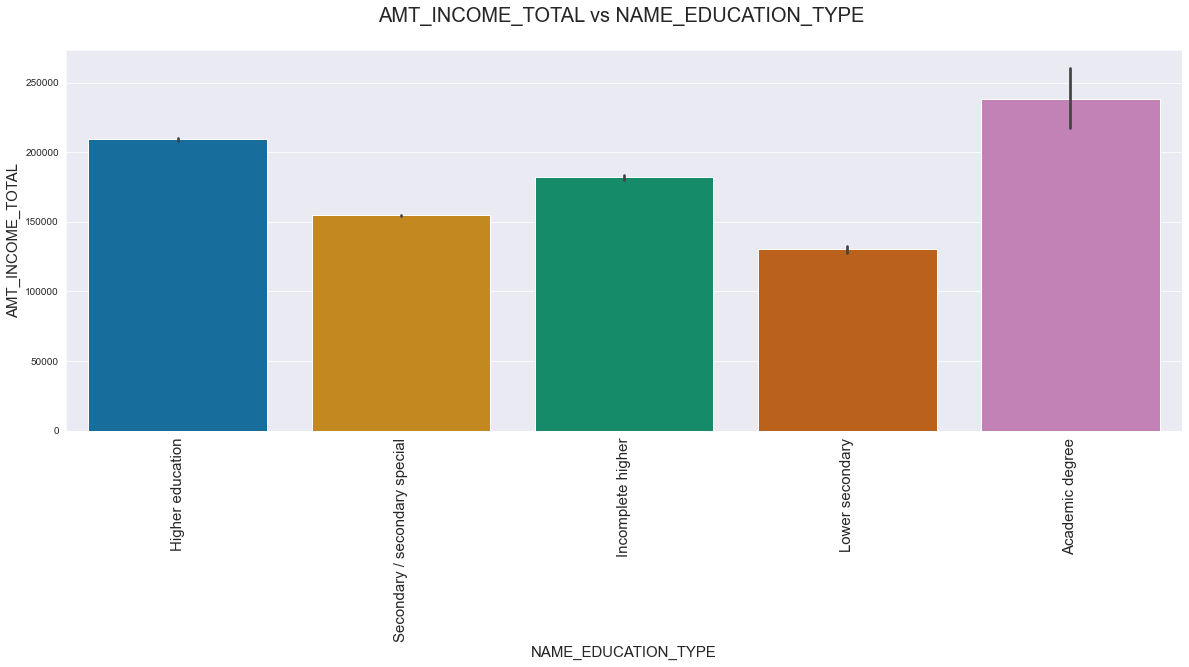

In [146]:
# Plot
plot_num_cat_0("AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE")

- In case of Clients with No Payment Difficulties, clients with academic degree have high annual income followed by higher education clients.

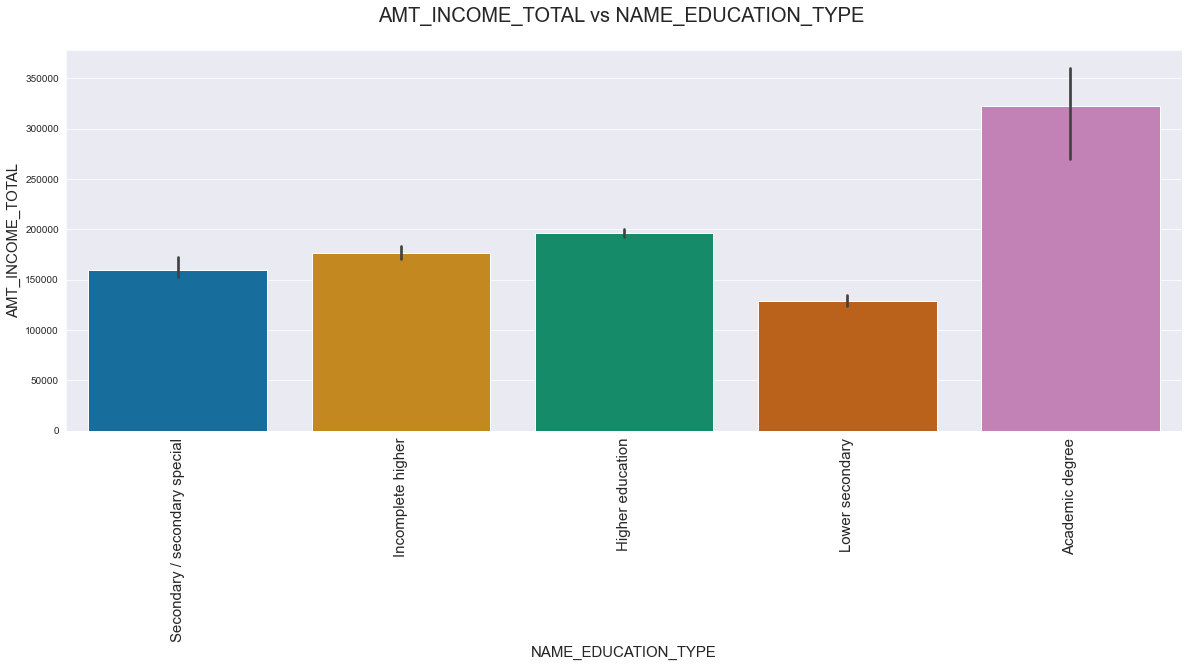

In [147]:
# Plot
plot_num_cat_1("AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE")

- In case of Clients with Payment Difficulties, clients with academic degree have high income.

#### Categorical vs Categorical Variables

- #### INCOME_RANGE  vs NAME_EDUCATION_TYPE

   INCOME_RANGE :- Income of the client.   
   CODE_GENDER :- Gender of the client.


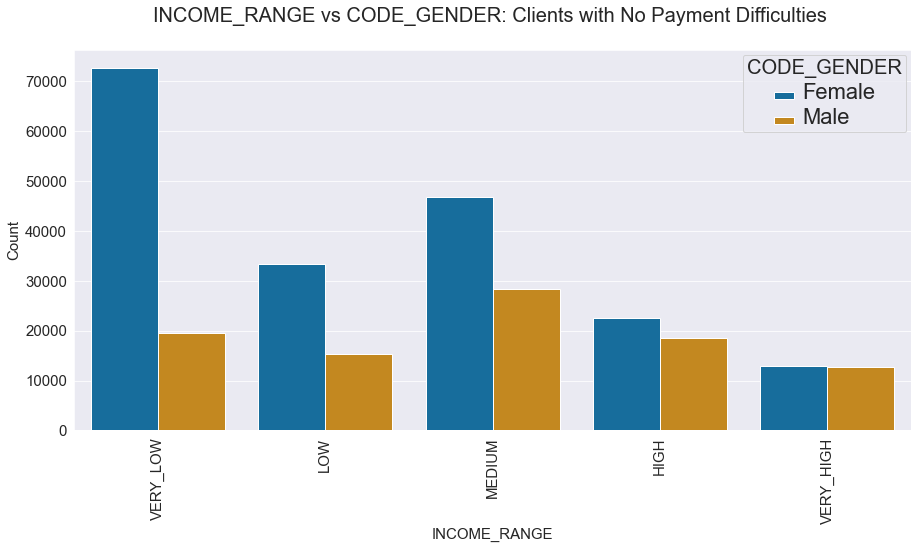

In [148]:
# Count plot for INCOME_RANGE vs CODE_GENDER for Clients with No Payment Difficulties
sns.set_style('darkgrid')

plt.figure(figsize=(15,7))

ax = sns.countplot(x = 'INCOME_RANGE', hue = 'CODE_GENDER' ,data = new_app_0)

# Labelling
plt.title(f'INCOME_RANGE vs CODE_GENDER: Clients with No Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('INCOME_RANGE' , size = 15)
plt.ylabel('Count' , size =15)



plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.show()

-  Clients with No Payment Difficulties, the count of females in the very_low income category is very high than males.
- While in the very_high income_range, females and males are equal. Whereas in all other cases, the count of females are more than males.

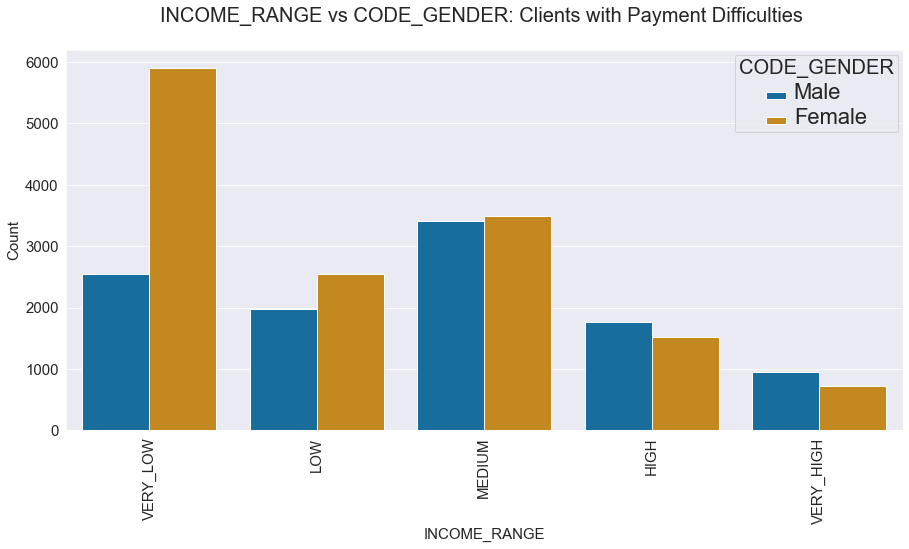

In [149]:
# Count plot for INCOME_RANGE vs CODE_GENDER for Clients with Payment Difficulties
sns.set_style('darkgrid')

plt.figure(figsize=(15,7))

ax = sns.countplot(x = 'INCOME_RANGE', hue = 'CODE_GENDER' ,data = new_app_1)

# Labelling
plt.title(f'INCOME_RANGE vs CODE_GENDER: Clients with Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('INCOME_RANGE' , size = 15)
plt.ylabel('Count' , size =15)




plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.show()

- Clients with Payment Difficulties, the count of males in the very_low income_range is very high than females. It's reversed for Clients with No Payment Difficulties.
- In the medium income_range, the males are slightly more than females. 
- While in the very_high income_range, count of females are slightly more than males.

- #### NAME_INCOME_TYPE vs CODE_GENDER 

  NAME_INCOME_TYPE :- Clients income type (businessman, working, maternity leave,…).
  
  CODE_GENDER :- Gender of the client.

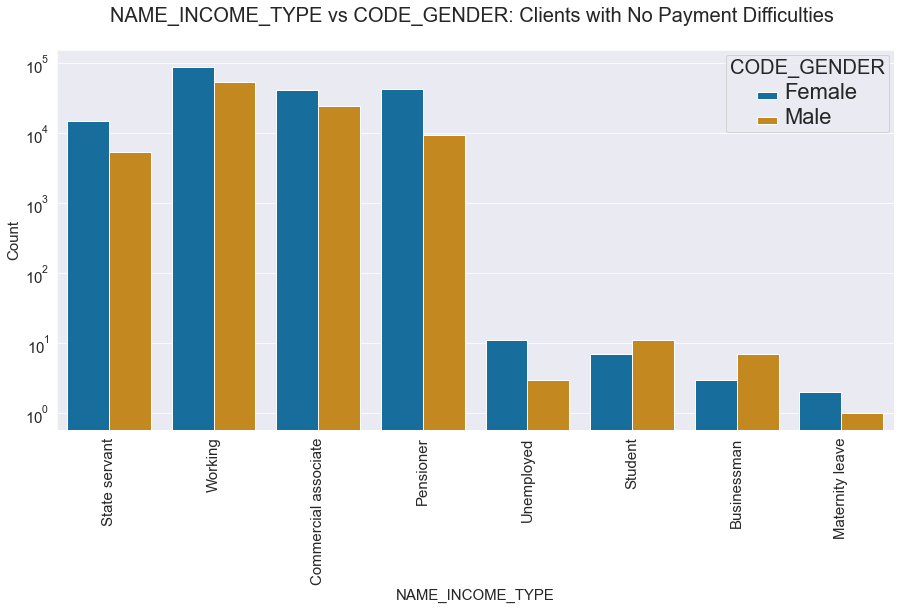

In [150]:
# Count plot for NAME_INCOME_TYPE vs CODE_GENDER for Clients with No Payment Difficulties
sns.set_style('darkgrid')

plt.figure(figsize=(15,7))

ax = sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER' ,data = new_app_0)

# Labelling
plt.title(f'NAME_INCOME_TYPE vs CODE_GENDER: Clients with No Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('NAME_INCOME_TYPE' , size = 15)
plt.ylabel('Count' , size =15)

plt.yscale('log')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.show()

- For Clients with No Payment Difficulties, we can see that in most of the name_income_type the females are high in number as compared to males.
- Also, in the working income type, females are more in number than males. It's the same for commercial associate and state servant.

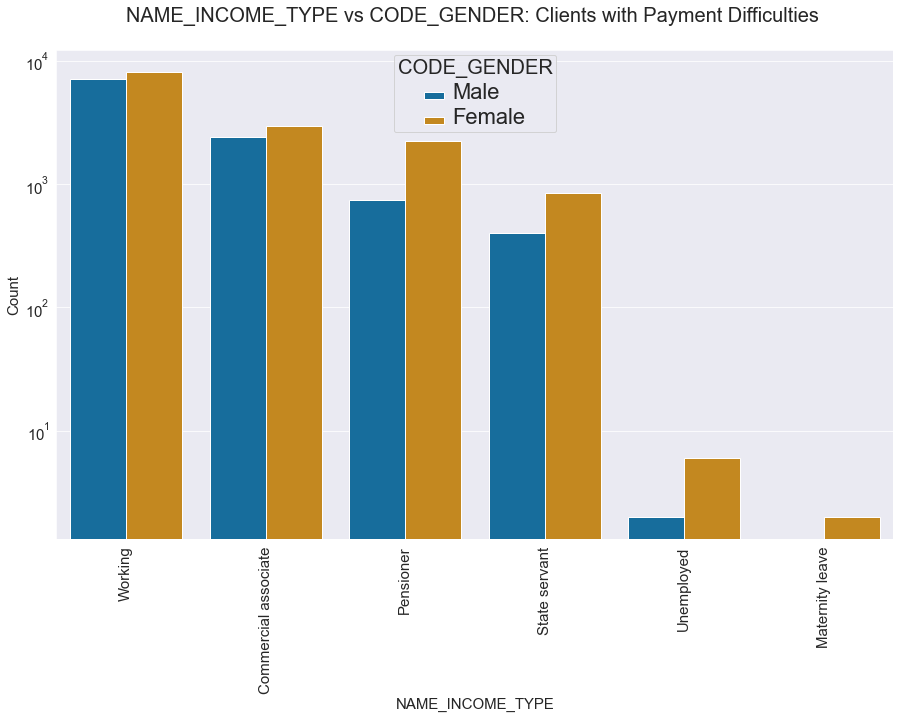

In [151]:
# Count plot for NAME_INCOME_TYPE vs CODE_GENDER for Clients with Payment Difficulties

plt.figure(figsize=(15,9))

ax = sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER' ,data = new_app_1)

# Labelling
plt.title(f'NAME_INCOME_TYPE vs CODE_GENDER: Clients with Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('NAME_INCOME_TYPE' , size = 15)
plt.ylabel('Count' , size =15)


plt.yscale('log')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.show()

- Clients with Payment Difficulties, the male counts are more in number than females for all the cases in Name_income_type. 
- The working income_type has the highest number of counts followed by commercial associates.

- #### INCOME_RANGE vs NAME_INCOME_TYPE 

  INCOME_RANGE :- Income of the client
  
  NAME_INCOME_TYPE :- Clients income type (businessman, working, maternity leave,…).

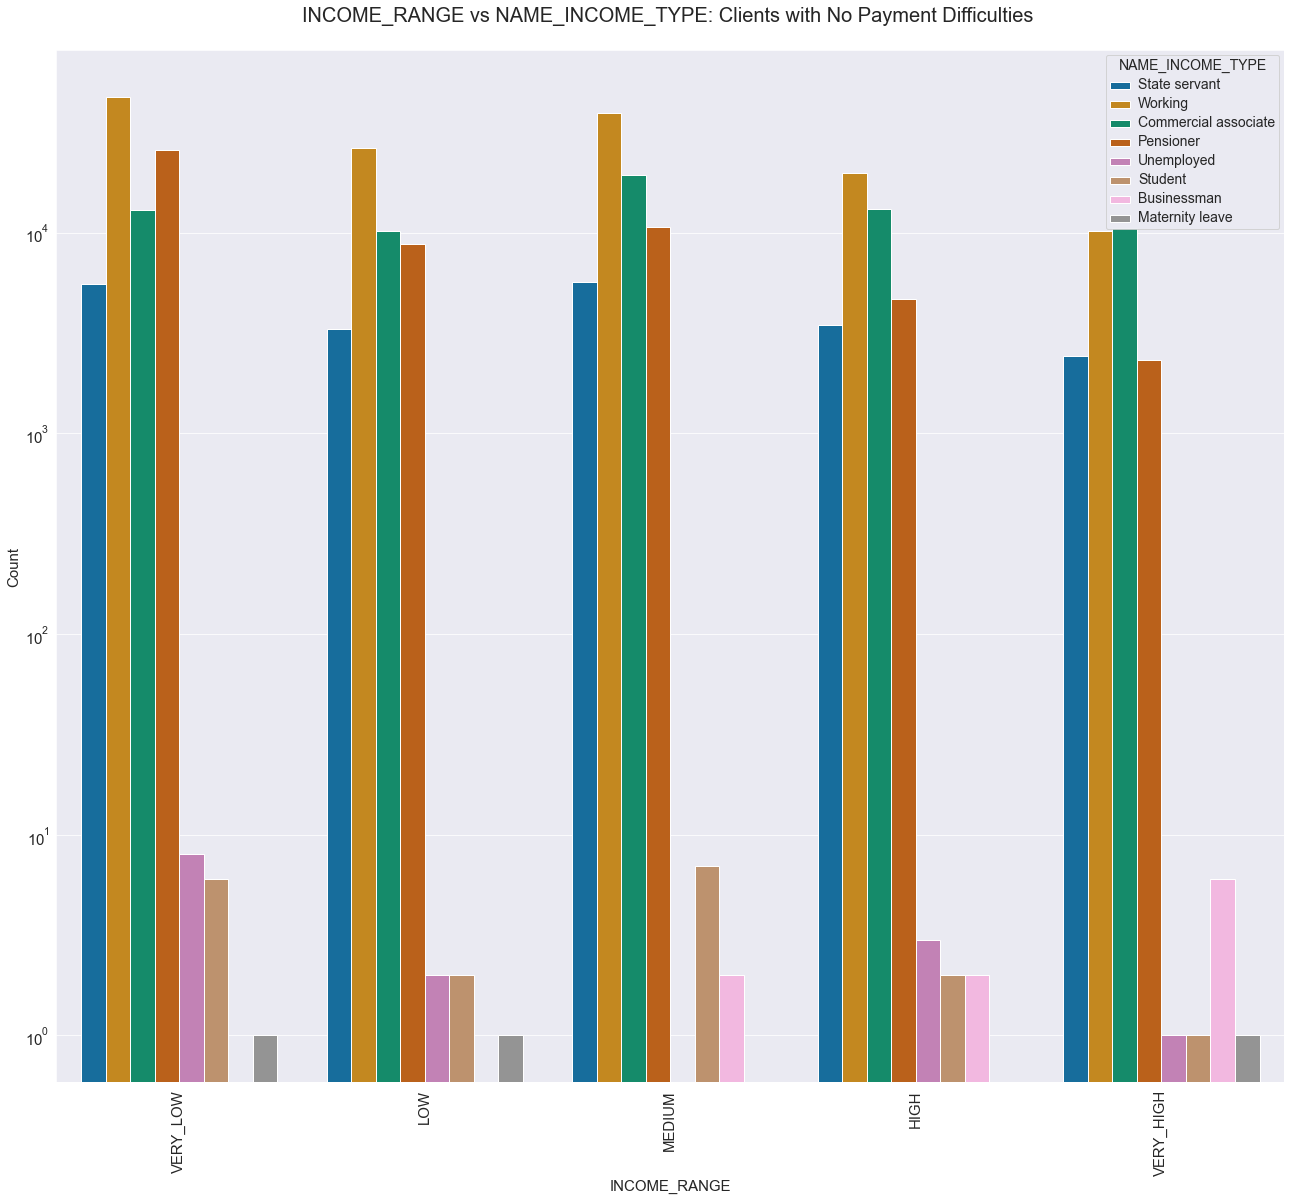

In [152]:
# Count plot for INCOME_RANGE vs NAME_INCOME_TYPE for Clients with No Payment Difficulties

plt.figure(figsize=(22,19))

ax = sns.countplot(x = 'INCOME_RANGE', hue = 'NAME_INCOME_TYPE' ,data = new_app_0)

# Labelling
plt.title(f'INCOME_RANGE vs NAME_INCOME_TYPE: Clients with No Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('INCOME_RANGE' , size = 15)
plt.ylabel('Count' , size =15)

plt.yscale('log')


plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title

plt.show()

-  Clients with No Payment Difficulties, the working and commercial associates have an equal count in the very_high income_range. The credit company should focus more on these clients for business.
- While in the case of very_low income_range, the working income_type has the highest count followed by pensioners and then the commercial associates.
- The income_range of state servant is equal in the category of very_low and medium followed by high and low. The credit company can approach these customers due to their stable income flow but only after thorough investigation.


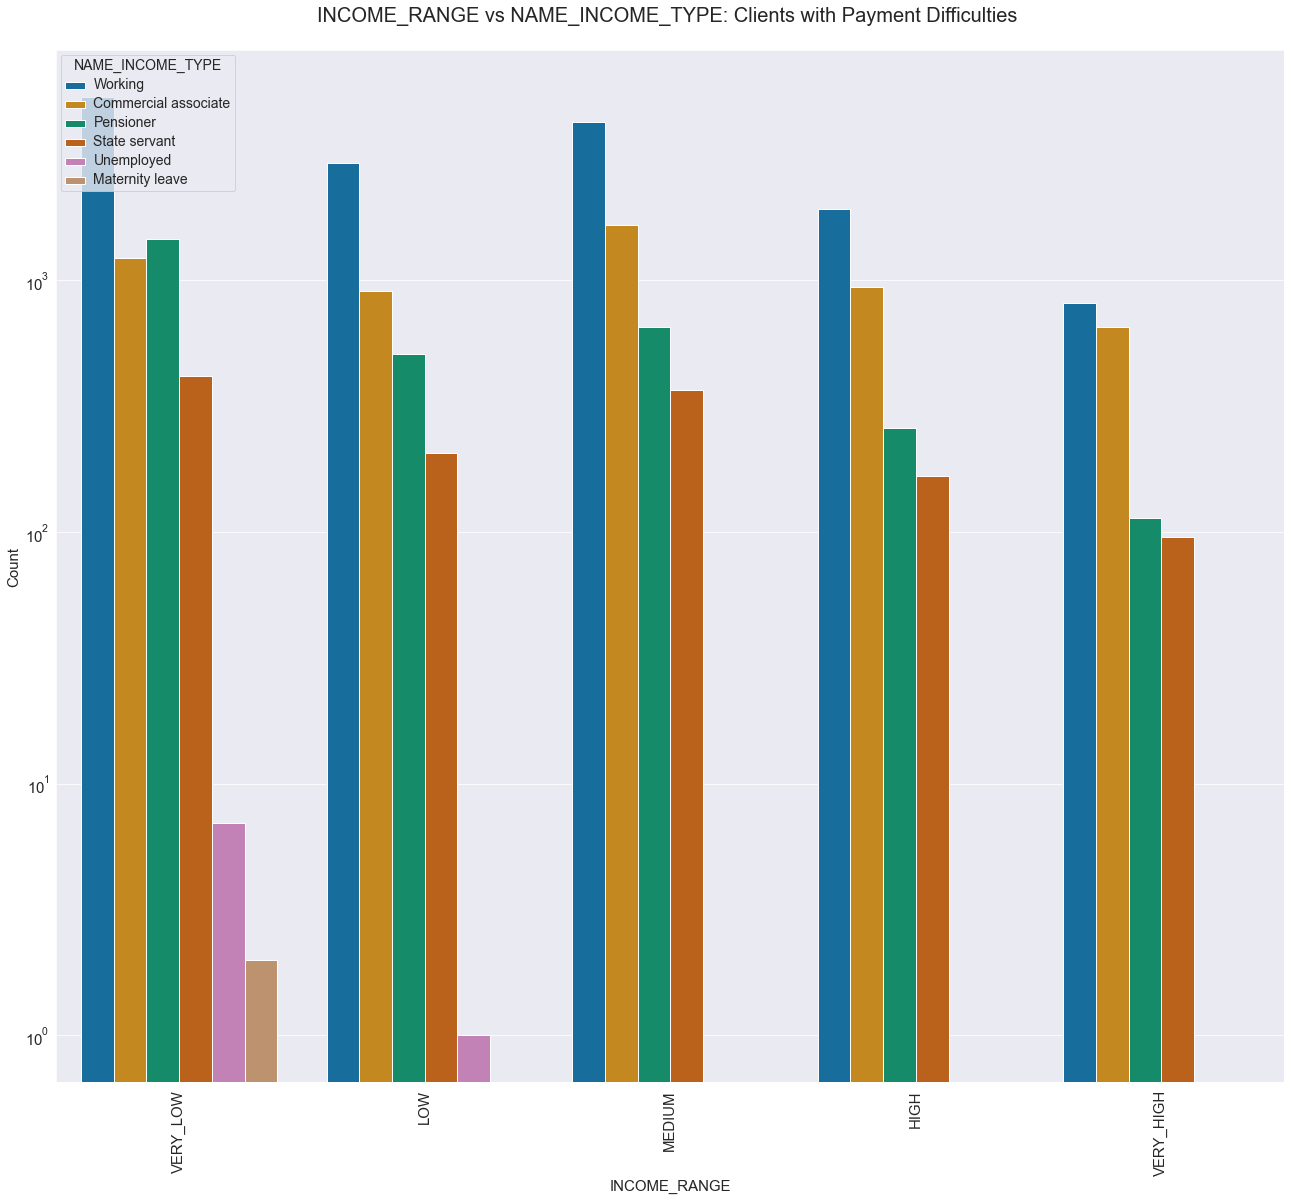

In [153]:
# Count plot for INCOME_RANGE vs NAME_INCOME_TYPE for Clients with Payment Difficulties

plt.figure(figsize=(22,19))

ax = sns.countplot(x = 'INCOME_RANGE', hue = 'NAME_INCOME_TYPE' ,data = new_app_1)

# Labelling
plt.title(f'INCOME_RANGE vs NAME_INCOME_TYPE: Clients with Payment Difficulties \n', size = 20)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('INCOME_RANGE' , size = 15)
plt.ylabel('Count' , size =15)

plt.yscale('log')


plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title

plt.show()

- Clients with Payment Difficulties, the working count is slightly more than commercial associates count in the very_high income_range.
- While in the case of very_low income_range, the working income_type has the highest count followed by pensioners and then the commercial associates.
- The unemployed are seen only for very_low and low income_range.


- #### NAME_CONTRACT_TYPE vs CODE_GENDER
 
  NAME_CONTRACT_TYPE :- Identification if loan is cash or revolving.
  CODE_GENDER :- Gender of the client.

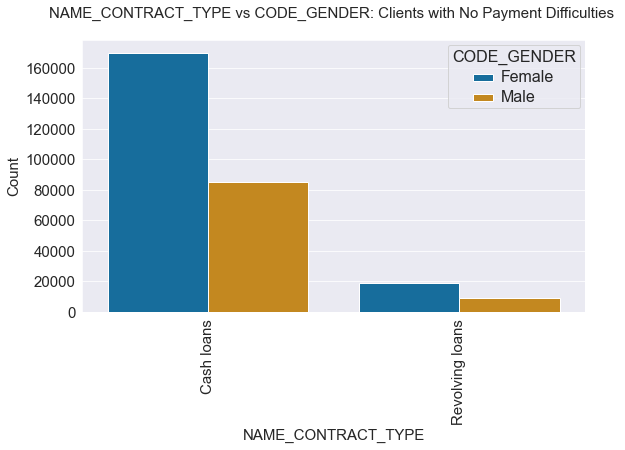

In [154]:
# Count plot for NAME_CONTRACT_TYPE vs CODE_GENDER for Clients with No Payment Difficulties

plt.figure(figsize=(9,5))

ax = sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER' ,data = new_app_0)

# Labelling
plt.title(f'NAME_CONTRACT_TYPE vs CODE_GENDER: Clients with No Payment Difficulties \n', size = 15)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('NAME_CONTRACT_TYPE' , size = 15)
plt.ylabel('Count' , size =15)

plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

plt.show()

-  Clients with No Payment Difficulties, the cash loans in female have the highest counts than males.
- The count of females are more than males for revolving loans.


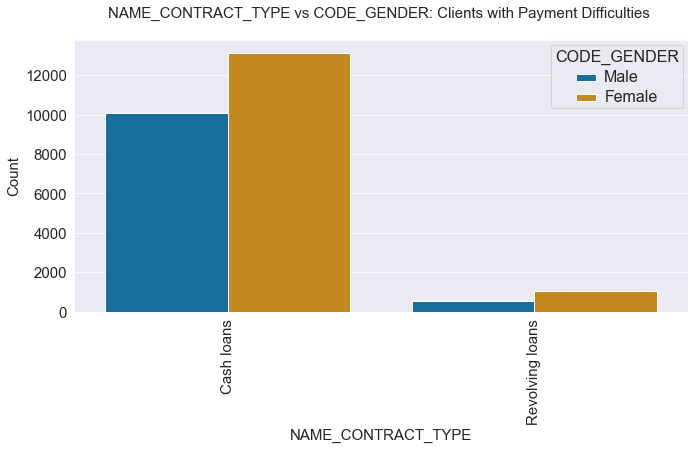

In [155]:
# Plot for NAME_CONTRACT_TYPE vs CODE_GENDER for Clients with Payment Difficulties

plt.figure(figsize=(11,5))

ax = sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER' ,data = new_app_1)

# Labelling
plt.title(f'NAME_CONTRACT_TYPE vs CODE_GENDER: Clients with Payment Difficulties \n', size = 15)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('NAME_CONTRACT_TYPE' , size = 15)
plt.ylabel('Count' , size =15)

plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

plt.show()

- For Clients with Payment Difficulties, females have the highest counts in the cash loans as compared to males.


- ### Subtask 3.4: Multivariate Analysis

Multivariate Analysis :- Clients with "No Payment difficulties" vs Clients with "Payment difficulties"

- #### NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS

  NAME_EDUCATION_TYPE :- Level of highest education the client achieved.
  
  AMT_CREDIT :- Credit amount of the loan.
  
  NAME_FAMILY_STATUS :- Family status of the client

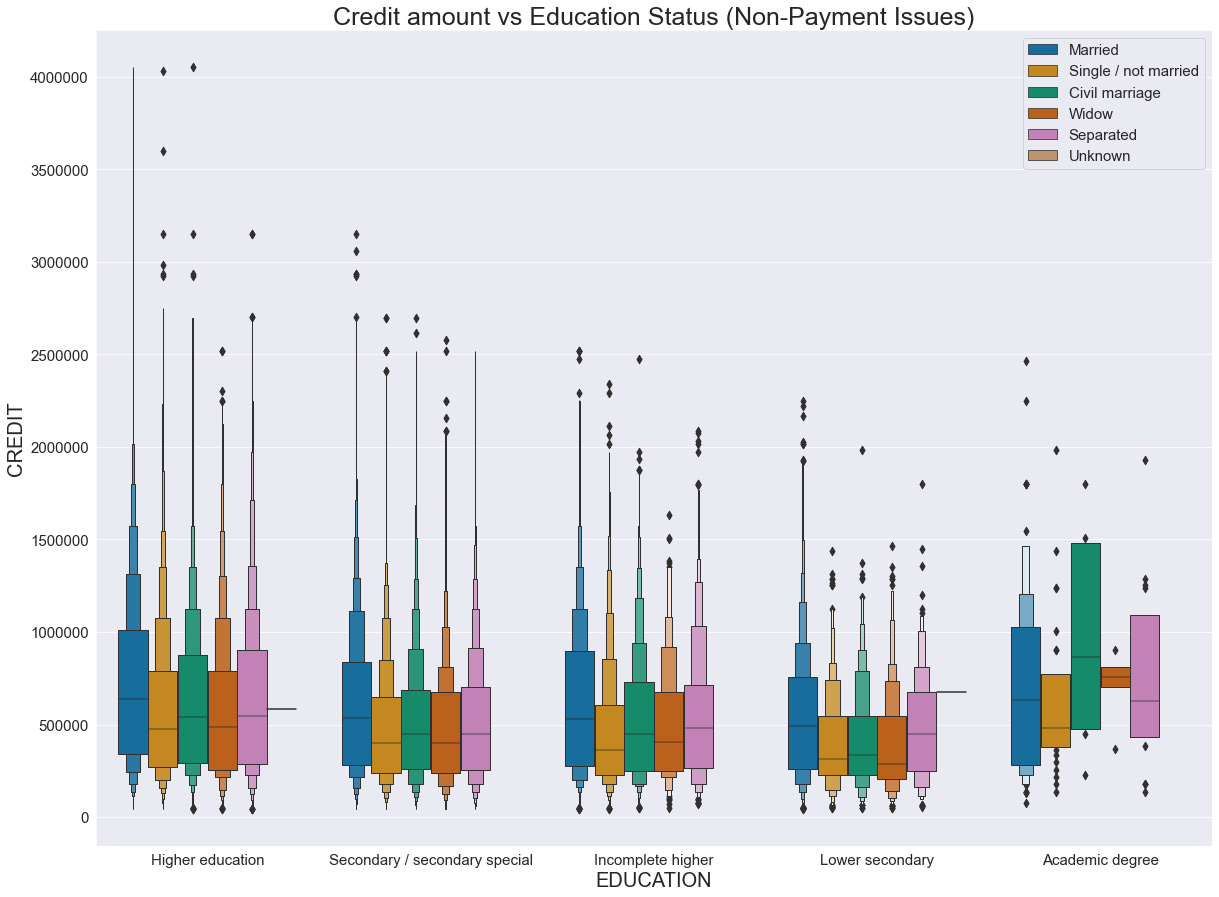

In [156]:
# Plot for NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS for Clients with No Payment Difficulties

plt.figure(figsize=(20,15))

ax2 = sns.boxenplot(data =new_app_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit amount vs Education Status (Non-Payment Issues)', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('EDUCATION' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')


plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

Clients with No Payment Difficulties
- Married people with higher education have applied for high credit loans and also is the highest among all education groups.
- In Academic degree, civil marriage clients have high credit loan application amongst all academic degree holders.


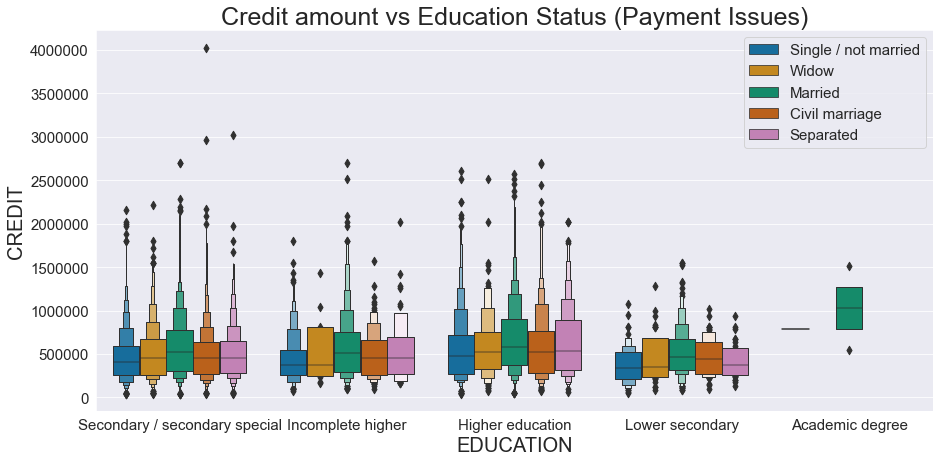

In [157]:
# Plot for NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS for Clients with Payment Difficulties

plt.figure(figsize=(15,7))

ax2 = sns.boxenplot(data =new_app_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit amount vs Education Status (Payment Issues)', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('EDUCATION' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')


plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

Clients with  Payment Difficulties
- In academic degree, only married clients have applied for loan of 10 lacs to 15 lacs approx.
- In higher education, married client has the highest credit amount application.


- #### NAME_EDUCATION_TYPE vs AMT_CREDIT vs INCOME_RANGE

  NAME_EDUCATION_TYPE :- Level of highest education the client achieved.
  
  AMT_CREDIT :- Credit amount of the loan. 
  
  INCOME_RANGE :- Income of the client.

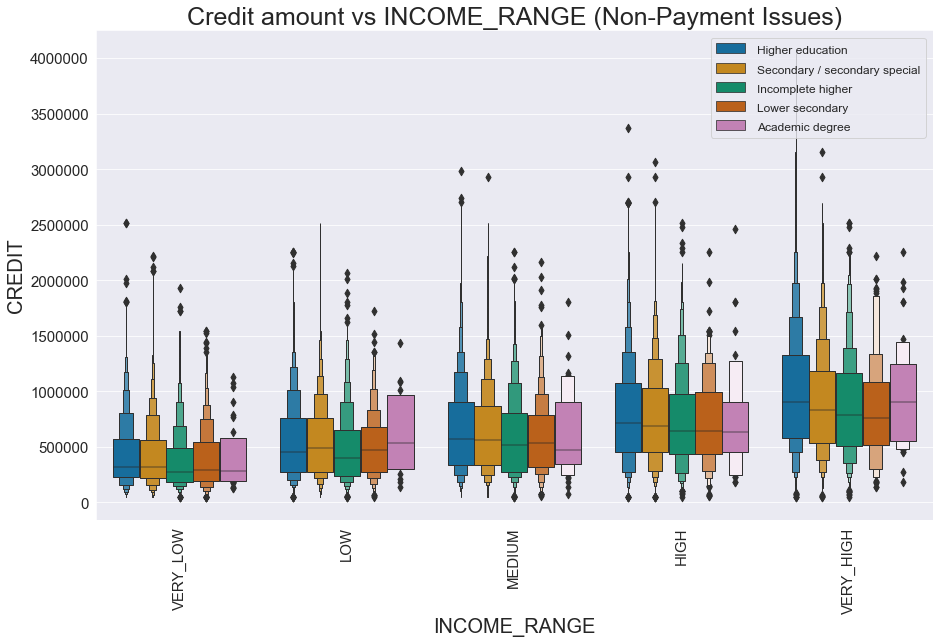

In [158]:
# Plot for NAME_EDUCATION_TYPE vs AMT_CREDIT vs INCOME_RANGE for Clients with No Payment Difficulties

plt.figure(figsize=(15,9))

ax2 = sns.boxenplot(data =new_app_0, x='INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE')
plt.title('Credit amount vs INCOME_RANGE (Non-Payment Issues)', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('INCOME_RANGE' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')


plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='12') # for legend title

plt.show()

- For clients facing no payment problems, it is usually with people with higher education or with secondary education who have taken the biggest credits.
- Clients with academic degrees are far less likely to default across all income groups.


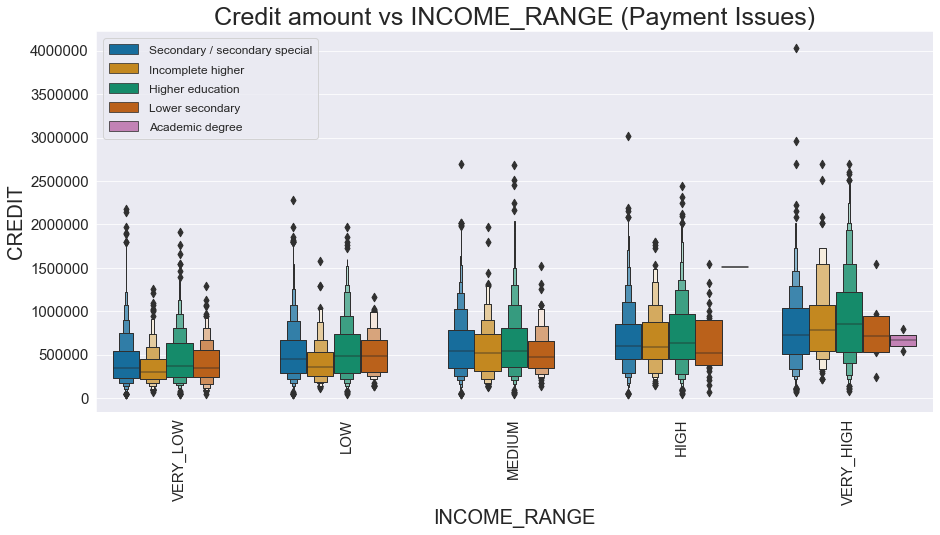

In [159]:
# Plot for NAME_EDUCATION_TYPE vs AMT_CREDIT vs INCOME_RANGE for Clients with Payment Difficulties

plt.figure(figsize=(15,7))

ax2 = sns.boxenplot(data =new_app_1, x='INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE')
plt.title('Credit amount vs INCOME_RANGE (Payment Issues)', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('INCOME_RANGE' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')


plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='12') # for legend title

plt.show()

- For clients facing payment problems, it is usually with people with higher education or with secondary education who have taken the biggest credits. 
- Clients with academic degrees are far less likely to default across all income groups.



### Task 4: Top 10 Correlation

Data Analysis for dataframes `new_app_0` (Clients with "No Payment difficulties") and `new_app_1` (Clients with "Payment difficulties").

- ### Subtask 4.1: Top 10 Correlation in `new_app_0` (Clients with No Payment Difficulties) dataframe


In [160]:
# Find the list of all numeric variables("int", "float") and find the correlation between them.

var_0 = list(new_app_0.select_dtypes(['int64','float']).columns)

var_0 = new_app_0[var_0]

var_0_corr = var_0.corr()
var_0_corr

# Find the List of Top 10 Correlation in new_app_0 (Clients with "No Payment difficulties").

top10_0 = var_0_corr.where(np.triu(np.ones(var_0_corr.shape),k=1).astype(np.bool)).unstack().reset_index()
top10_0.columns=['Column1','Column2','Correlation']
top10_0.dropna(subset=['Correlation'],inplace=True)

top10_0 = top10_0.sort_values(by=['Correlation'], ascending=False)
top10_0 = top10_0.head(10)


In [161]:
# List of Top 10 Correlation in new_app_0
top10_0

Column1                     Column2  Correlation
790      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998508
214               AMT_GOODS_PRICE                  AMT_CREDIT     0.987024
359   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950148
282               CNT_FAM_MEMBERS                CNT_CHILDREN     0.878569
503   LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
826      DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859289
611       LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381
215               AMT_GOODS_PRICE                 AMT_ANNUITY     0.776421
179                   AMT_ANNUITY                  AMT_CREDIT     0.771296
1115               YEARS_EMPLOYED                         AGE     0.626062

- The highest correlation is between OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE.
- The application amount and good's price have the 2nd highest correlation as this is product the client was to purchased, so applied for credit on it.
- There is positive correlation between annuity and good's price and also between annuity and credit, as this is the annuity which the client will pay on monthly basis as approved by company.

(5.5, -0.5)

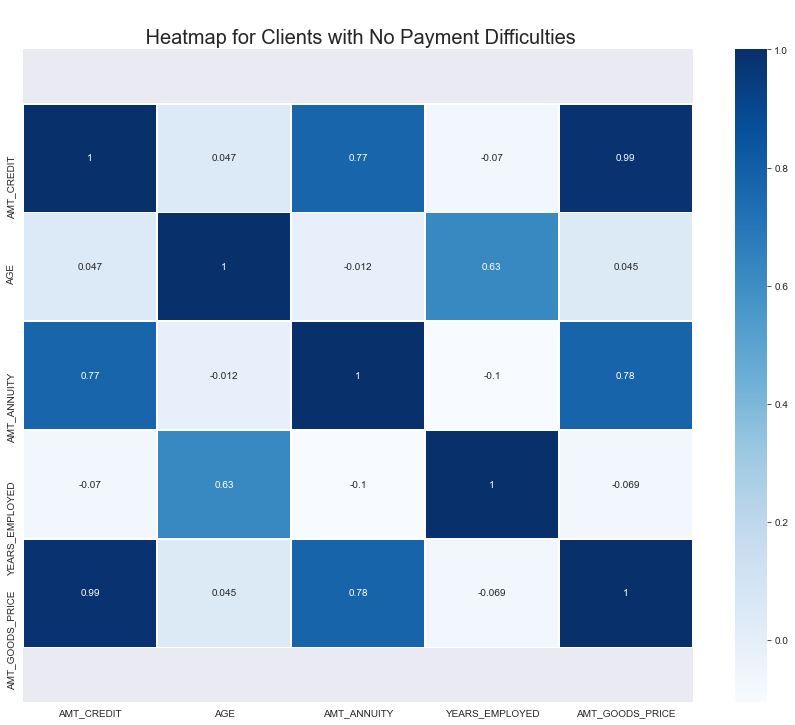

In [162]:
# Create heat map for AMT_ANNUITY , AMT_CREDIT , AGE, YEARS_EMPLOYED, AMT_GOODS_PRICE correlation.

plt.figure(figsize=[15,12])

ax = sns.heatmap(new_app_0[['AMT_CREDIT',"AGE", "AMT_ANNUITY","YEARS_EMPLOYED","AMT_GOODS_PRICE"]].corr(), annot=True, cmap='Blues', linewidths=0.7)

# Labelling heatmap, x-axis and y-axis.
plt.title('\n Heatmap for Clients with No Payment Difficulties', fontsize=20, fontweight=3)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)

- The credit amount approved to been given to client is highly correlated with Good's price.
- The least correlation is of (-0.1) between year_employed and annuity.
- Also, annuity and Good's price have the 0.78 correlation amongst all other variables considered here.

- ### Subtask 4.2: Top 10 Correlation in `new_app_1` (Clients with Payment Difficulties) dataframe

In [163]:
# Find the list of all numeric variables("int", "float") and find the correlation between them.

var_1 = list(new_app_1.select_dtypes(['int64','float']).columns)

var_1 = new_app_1[var_1]

var_1_corr = var_1.corr()
var_1_corr

# Find the List of Top 10 Correlation in new_app_1 (Clients with "Payment difficulties").

top10_1 = var_1_corr.where(np.triu(np.ones(var_1_corr.shape),k=1).astype(np.bool)).unstack().reset_index()
top10_1.columns=['Column1','Column2','Correlation']
top10_1.dropna(subset=['Correlation'],inplace=True)

top10_1 = top10_1.sort_values(by=['Correlation'], ascending=False)
top10_1 = top10_1.head(10)

In [164]:
# List of Top 10 Correlation in new_app_1
top10_1

Column1                     Column2  Correlation
790      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998269
214               AMT_GOODS_PRICE                  AMT_CREDIT     0.982783
359   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956637
282               CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
826      DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.868994
503   LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
611       LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540
215               AMT_GOODS_PRICE                 AMT_ANNUITY     0.752296
179                   AMT_ANNUITY                  AMT_CREDIT     0.752195
1115               YEARS_EMPLOYED                         AGE     0.582302

- The highest correlation is between OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE.
- The credit amount and good's price have the 2nd highest correlation as this is product the client was to purchased, so applied for credit on it and got approved.
- There is positive correlation between annuity and good's price and also between annuity and credit, as this is the annuity which the client will pay on monthly basis as approved by company.

(5.5, -0.5)

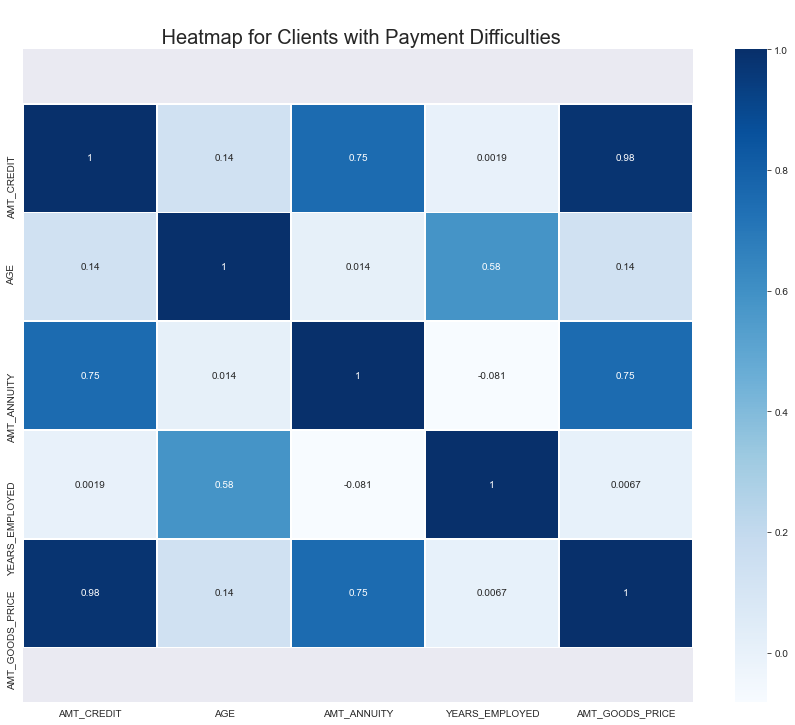

In [165]:
# Create heat map for AMT_ANNUITY , AMT_CREDIT , AGE, YEARS_EMPLOYED, AMT_GOODS_PRICE correlation.

plt.figure(figsize=[15,12])

ax = sns.heatmap(new_app_1[['AMT_CREDIT',"AGE", "AMT_ANNUITY","YEARS_EMPLOYED","AMT_GOODS_PRICE"]].corr(), annot=True, cmap='Blues', linewidths=0.7)

# Labelling heatmap, x-axis and y-axis.
plt.title('\n Heatmap for Clients with Payment Difficulties', fontsize=20, fontweight=3)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)

- The credit amount approved to been given to client is highly correlated with Good's price (0.98).
- The least correlation is of (-0.081) between year_employed and annuity.
- Also, annuity and Good's price have the 0.75 correlated amongst all other variables considered here.

### Task 5: Reading the data 


- ###  Subtask 5.1: Read the Data.

Read the previous application data file and store them in a dataframe `previous_app`.

In [166]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

previous_app = pd.read_csv("C:/Users/plany/OneDrive/Documents/Executive PG in Data Science/10] Credit EDA Case Study/previous_application.csv")


In [167]:
# Top 5 rows of dataframe

previous_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

- ### Subtask 5.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns for `previous_app` dataframe.

In [168]:
# Check the number of rows and columns in "previous_app" dataframe.

previous_app.shape

(1670214, 37)

In [169]:
# Check the column wise info of "previous_app" dataframe.

previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [170]:
# Check the summary for numeric columns in "previous_app" dataframe.

previous_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

- ### Subtask 5.3: Check for Missing Values.

Check the percentage of null values in all columns of dataframe.

In [171]:
# Find the missing values in all columns of "previous_app" dataframe.

previous_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [172]:
# Find the percentage of missing values in all columns of "previous_app" dataframe.

round(previous_app.isnull().sum()*100/len(previous_app),4).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.6437
RATE_INTEREST_PRIMARY          99.6437
RATE_DOWN_PAYMENT              53.6365
AMT_DOWN_PAYMENT               53.6365
NAME_TYPE_SUITE                49.1198
DAYS_TERMINATION               40.2981
NFLAG_INSURED_ON_APPROVAL      40.2981
DAYS_FIRST_DRAWING             40.2981
DAYS_FIRST_DUE                 40.2981
DAYS_LAST_DUE_1ST_VERSION      40.2981
DAYS_LAST_DUE                  40.2981
AMT_GOODS_PRICE                23.0818
AMT_ANNUITY                    22.2867
CNT_PAYMENT                    22.2864
PRODUCT_COMBINATION             0.0207
AMT_CREDIT                      0.0001
SK_ID_CURR                      0.0000
NAME_CONTRACT_TYPE              0.0000
WEEKDAY_APPR_PROCESS_START      0.0000
HOUR_APPR_PROCESS_START         0.0000
FLAG_LAST_APPL_PER_CONTRACT     0.0000
NFLAG_LAST_APPL_IN_DAY          0.0000
AMT_APPLICATION                 0.0000
NAME_PAYMENT_TYPE               0.0000
NAME_CASH_LOAN_PURPOSE          0.0000
NAME_CONTRACT_STATUS     

In [173]:
# Drop the rows having more than ~40% null values in the "previous_app" dataframes.
previous_app = previous_app.loc[:,previous_app.isnull().sum()/len(previous_app)<=0.4]

- 40% percent value for nulls was chosen as it allowed a better removal of data not pertaining to analysis.

In [174]:
# Check the number of rows and columns in "previous_app" dataframe.
previous_app.shape

(1670214, 26)

In [175]:
# Dropping from "WEEKDAY_APPR_PROCESS_START" to "NFLAG_LAST_APPL_IN_DAY"  since not pertaining to our analysis.

previous_app = previous_app.drop(previous_app.loc[:,'WEEKDAY_APPR_PROCESS_START':'NFLAG_LAST_APPL_IN_DAY'], axis= 1)

In [176]:
# Check the number of rows and columns in "previous_app" dataframe.
previous_app.shape

(1670214, 22)

In [177]:
# List the columns with less than equal to 13% null values.

len(list(previous_app.columns[(previous_app.isnull().sum()/ len(previous_app)<=0.13) & (previous_app.isnull().sum()/ len(previous_app)>0)]))

2

In [178]:
# Name the columns with less than equal to 13% null values.

list(previous_app.columns[(previous_app.isnull().sum()/ len(previous_app)<=0.13) & (previous_app.isnull().sum()/ len(previous_app)>0)])

['AMT_CREDIT', 'PRODUCT_COMBINATION']

In [179]:
# Checking for missing values in rows (as it is zero no further actions are needed)

len(previous_app[100*(previous_app.isnull().sum(axis = 1) / len(previous_app.columns)) >= 50].index)

0

- ### Subtask 5.4: Imputing the missing values.

Imputing the missing values for dataframes `previous_app`.

In [180]:
# Name the columns with less than equal to 13% null values.

list(previous_app.columns[(previous_app.isnull().sum()/ len(previous_app)<=0.13) & (previous_app.isnull().sum()/ len(previous_app)>0)])

['AMT_CREDIT', 'PRODUCT_COMBINATION']

- #### AMT_CREDIT

  AMT_CREDIT :- Final credit amount on the previous application.

In [181]:
# Inspect the AMT_CREDIT
previous_app['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

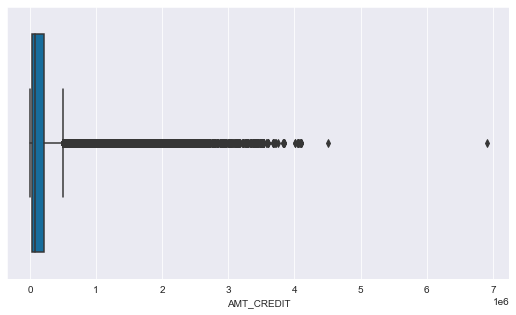

In [182]:
# Since AMT_CREDIT variable is numeric nature (continuous variable). So we can impute mean or median after checking the outliers.

plt.figure(figsize=[9,5])

sns.boxplot(previous_app['AMT_CREDIT'])
plt.show()

- The variable `"AMT_CREDIT"` has outliers, so we will impute the missing values on basis of median.

In [183]:
# Find Median
previous_app['AMT_CREDIT'].median()

80541.0

In [184]:
# Fill up the nulls in the AMT_CREDIT column with the median value of 80496.0

previous_app['AMT_CREDIT'] = round(previous_app['AMT_CREDIT'].fillna(previous_app['AMT_CREDIT'].median()),2)



In [185]:
# Check the nulls in the AMT_CREDIT column again to cross-verify
previous_app['AMT_CREDIT'].isnull().sum()

0

- #### NAME_CONTRACT_TYPE

  NAME_CONTRACT_TYPE :- Contract product type (Cash loan, consumer loan[POS] ,...) of the previous application.

In [186]:
# Inspect the NAME_CONTRACT_TYPE
previous_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

- The NAME_CONTRACT_TYPE column is categorical variable. So we can impute this column using mode.



In [187]:
# Find Mode
previous_app.NAME_CONTRACT_TYPE.mode()

0    Cash loans
dtype: object

In [188]:
# Fill up the nulls in the NAME_CONTRACT_TYPE column with the mode value of " Cash loans"

previous_app['NAME_CONTRACT_TYPE'] = previous_app['NAME_CONTRACT_TYPE'].fillna(previous_app['NAME_CONTRACT_TYPE'].mode()[0])

In [189]:
# Check the nulls in the NAME_CONTRACT_TYPE column again to cross-verify

previous_app['NAME_CONTRACT_TYPE'].isnull().sum()

0

In [190]:
# Recheck NAME_CONTRACT_TYPE.
previous_app['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

- #### NAME_CLIENT_TYPE

  NAME_CLIENT_TYPE :- Was the client old or new client when applying for the previous application

In [191]:
# Inspect the NAME_CLIENT_TYPE
previous_app.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

- The NAME_CLIENT_TYPE column is categorical variable. So we can impute this column using mode.



In [192]:
# Find Mode
previous_app.NAME_CLIENT_TYPE.mode()

0    Repeater
dtype: object

In [193]:
# Fill up the nulls in the NAME_CLIENT_TYPE column with the mode value of " Repeater"

previous_app['NAME_CLIENT_TYPE'] = previous_app['NAME_CLIENT_TYPE'].fillna(previous_app['NAME_CLIENT_TYPE'].mode()[0])

In [194]:
# Check the nulls in the NAME_CLIENT_TYPE column again to cross-verify

previous_app['NAME_CLIENT_TYPE'].isnull().sum()

0

In [195]:
# Recheck NAME_CLIENT_TYPE.
previous_app['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

- ### Subtask 5.5: Handling incorrect datatypes.

To Check the dataypes and convert them to correct datatypes dataframe `previous_app`.

In [196]:
#Check the datatypes of all the columns 
previous_app.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NAME_CONTRACT_TYPE         object
AMT_ANNUITY               float64
AMT_APPLICATION           float64
AMT_CREDIT                float64
AMT_GOODS_PRICE           float64
NAME_CASH_LOAN_PURPOSE     object
NAME_CONTRACT_STATUS       object
DAYS_DECISION               int64
NAME_PAYMENT_TYPE          object
CODE_REJECT_REASON         object
NAME_CLIENT_TYPE           object
NAME_GOODS_CATEGORY        object
NAME_PORTFOLIO             object
NAME_PRODUCT_TYPE          object
CHANNEL_TYPE               object
SELLERPLACE_AREA            int64
NAME_SELLER_INDUSTRY       object
CNT_PAYMENT               float64
NAME_YIELD_GROUP           object
PRODUCT_COMBINATION        object
dtype: object

In [197]:
# Number of  the columns which have "Float64" dtypes.
len(list(previous_app.select_dtypes(include = ['float64'])))

5

In [198]:
# Name the columns which have "Float64" dtypes.

list(previous_app.select_dtypes(include = ['float64']))

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT']

In [199]:
# Change the dtype of columns from "Float64" to "Int64"
numeric_columns = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', "CNT_PAYMENT", "AMT_CREDIT","AMT_APPLICATION"]
previous_app.loc[:, numeric_columns] = previous_app.loc[:, numeric_columns].apply(lambda x: x.astype('int64', errors = 'ignore'))

In [200]:
# Number of  the columns which have "Object" dtypes.
len(list(previous_app.select_dtypes(include = ['object'])))

13

In [201]:
# Name the columns which have "Object" dtypes.

list(previous_app.select_dtypes(include = ['object']))

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [202]:
# Change the dtype of columns from "Object" to "String"
obj_columns = ['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
previous_app.loc[:, obj_columns] = previous_app.loc[:, obj_columns].apply(lambda x: x.astype('str', errors = 'ignore'))

In [203]:
#Check the datatypes of all numeric the columns 
list(previous_app.select_dtypes(include = 'int64'))

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'DAYS_DECISION',
 'SELLERPLACE_AREA']

In [204]:
# Number of  the columns which have "Int64" dtypes.
len(list(previous_app.select_dtypes(include = ['int64'])))

6

- ### Subtask 5.6: Cleaning Columns

To clean columns for dataframes `previous_app`.

In [205]:
# Checking "DAYS_DECISION" value , columns with DAYS as data is in negative in data
previous_app.DAYS_DECISION.describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [206]:
# Converting to normal values
previous_app['DAYS_DECISION'] = abs(previous_app.DAYS_DECISION)
previous_app.DAYS_DECISION.describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

In [207]:
#REPLACING XAN , nan and XAP with np.NaN

previous_app = previous_app.replace('XNA', np.nan)
previous_app = previous_app.replace('XAP', np.nan)
previous_app = previous_app.replace('nan', np.nan)

In [208]:
# Rechecking  
previous_app['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

- #### Analysing "NAME_CONTRACT_STATUS"

In [209]:
# Checking "NAME_CONTRACT_STATUS" column.
previous_app.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [210]:
# Visualize using Pie Chart.
pietest = previous_app['NAME_CONTRACT_STATUS'].value_counts()

pie1 = pd.DataFrame({'labels':pietest.index, 'values':pietest.values})
pie1

labels   values
0      Approved  1036781
1      Canceled   316319
2       Refused   290678
3  Unused offer    26436

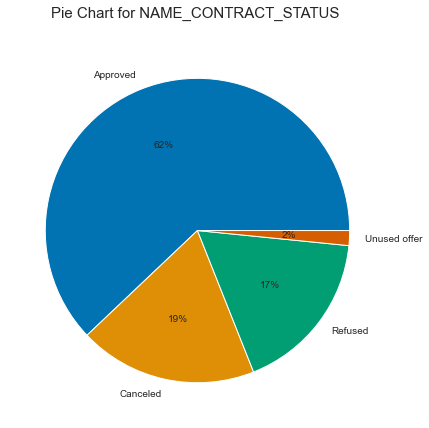

In [211]:
# Pie Chart of "NAME_CONTRACT_STATUS" column.
plt.figure(figsize=[10,7])
plt.pie(pietest, labels=pietest.index,autopct='%1.0f%%')

plt.title("Pie Chart for NAME_CONTRACT_STATUS \n ", fontsize = 15)
plt.show()

- 63% of the previous applications were approved.

- Only 17% of the applications  were refused. 

- 18% were cancelled by the applicant


In [212]:
pietest.values

array([1036781,  316319,  290678,   26436], dtype=int64)

- #### Analysing "NAME_PORTFOLIO"

In [213]:
# Checking NAME_PORTFOLIO column.
previous_app.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [214]:
# Dropping Cars
previous_app = previous_app[previous_app.NAME_PORTFOLIO != 'Cars']

In [215]:
# Rechecking NAME_PORTFOLIO column.
previous_app.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
Cards    144985
Name: NAME_PORTFOLIO, dtype: int64

- #### Analysing "NAME_CASH_LOAN_PURPOSE"

In [216]:
# Checking NAME_CASH_LOAN_PURPOSE column.
previous_app.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

- #### Analysing "PRODUCT_COMBINATION"

In [217]:
# Checking PRODUCT_COMBINATION column.
previous_app.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98410
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23877
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

- ### Subtask 5.7: Inspecting Outliers

To check for outliers in `previous_app` dataframe.

- ####  Analysing` "AMT_ANNUITY"` column of `previous_app` dataframe.


In [218]:
# Analysing"AMT_ANNUITY"
previous_app.AMT_ANNUITY.describe()

count    1.297554e+06
mean     1.594771e+04
std      1.477425e+04
min      0.000000e+00
25%      6.320835e+03
50%      1.125000e+04
75%      2.064690e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [219]:
# Analysing"AMT_ANNUITY"
previous_app.AMT_ANNUITY.quantile([0,0.25,0.5,0.75,0.99,0.98,1])

0.00         0.00000
0.25      6320.83500
0.50     11250.00000
0.75     20646.90000
0.99     69585.85305
0.98     58347.46800
1.00    418058.14500
Name: AMT_ANNUITY, dtype: float64

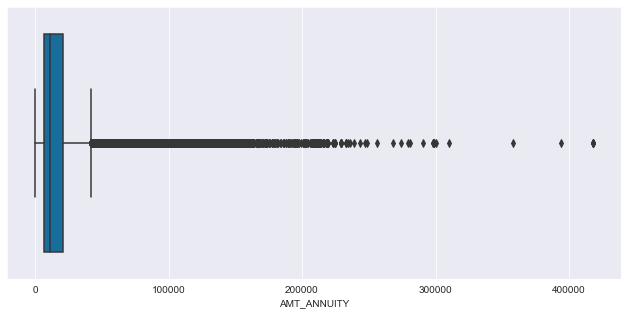

In [220]:
# Since "AMT_ANNUITY" variable is numeric nature (discrete variable).
plt.figure(figsize=[11,5])

sns.boxplot(previous_app['AMT_ANNUITY'])
plt.show()

- The variable "AMT_ANNUITY" has outliers, we can't drop these high values as few clients with high income can pay annuity to company.
- The annuity amount above 3 lakhs can be considered to be outliers.


In [221]:
# Check the percentage of nulls in the AMT_ANNUITY column again to cross-verify
round(previous_app['AMT_ANNUITY'].isnull().sum() / len(previous_app['AMT_ANNUITY'])*100,2)

22.29

- The percentage of null values in the AMT_ANNUITY is 22.29%. 
- We are unable to impute because it's more than 15% and imputing the nulls with median incase of outliers will make a negative impact on AMT_ANNUITY.

In [222]:
list(previous_app.select_dtypes(include = ['int64', "float"]))

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

- ####  Analysing` "AMT_APPLICATION"` column of `previous_app` dataframe.


  AMT_APPLICATION :- For how much credit did client ask on the previous application

In [223]:
# Analysing"AMT_APPLICATION"
previous_app.AMT_APPLICATION.describe()

count    1.669789e+06
mean     1.748739e+05
std      2.916232e+05
min      0.000000e+00
25%      1.868800e+04
50%      7.100500e+04
75%      1.800000e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

In [224]:
# Analysing"AMT_APPLICATION"
previous_app.AMT_APPLICATION.quantile([0,0.25,0.5,0.75,0.99,0.98,1])

0.00          0.0
0.25      18688.0
0.50      71005.0
0.75     180000.0
0.99    1350000.0
0.98    1147500.0
1.00    6905160.0
Name: AMT_APPLICATION, dtype: float64

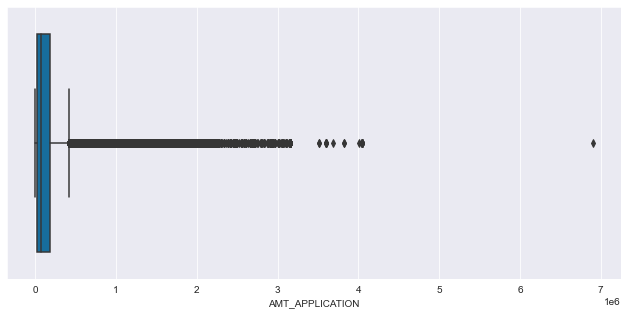

In [225]:
# Since "AMT_APPLICATION" variable is numeric nature (discrete variable).
plt.figure(figsize=[11,5])

sns.boxplot(previous_app['AMT_APPLICATION'])
plt.show()

- The variable "AMT_APPLICATION" has outliers, we can't drop these high values as few clients with high income can apply for higher amount of credit.
- The application amount above 60 lakhs can be considered to be outlier.


In [226]:
# Check the percentage of nulls in the AMT_APPLICATION column again to cross-verify
round(previous_app['AMT_APPLICATION'].isnull().sum() / len(previous_app['AMT_APPLICATION'])*100,2)

0.0

- ### Subtask 5.8: Data Analysis

Data Analysis for dataframe `previous_app`

- #### Subtask 5.8.1: Univariate Analysis of Numeric Variables

Univariate Analysis for `previous_app`.

In [227]:
# Univariate Analysis of Numerical Variables

def plot_num(var_1):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,5])

# Distribution plot for Variable  for previous_app df.
    plt.subplot(1,2,1)

    sns.distplot(previous_app[var_1], color='Purple', kde=True, bins=6)
    

# Labelling
    plt.title(f'Distribution plot for {var_1} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_1, fontsize = 15, fontweight=1.5)
    
# Box plot for Variable  for Clients with "Payment difficulties"
    plt.subplot(1,2,2)

    sns.boxplot(data =previous_app, x=var_1)
  
  
# Labelling
    plt.title(f'Box plot for {var_1} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_1, fontsize = 15, fontweight=1.5)
    plt.yticks(size = 15)
    plt.xticks(rotation=90, fontsize = 15)



    plt.show()

- #### Analysing `"AMT_ANNUITY"` variable

  AMT_ANNUITY :- Annuity of previous application.

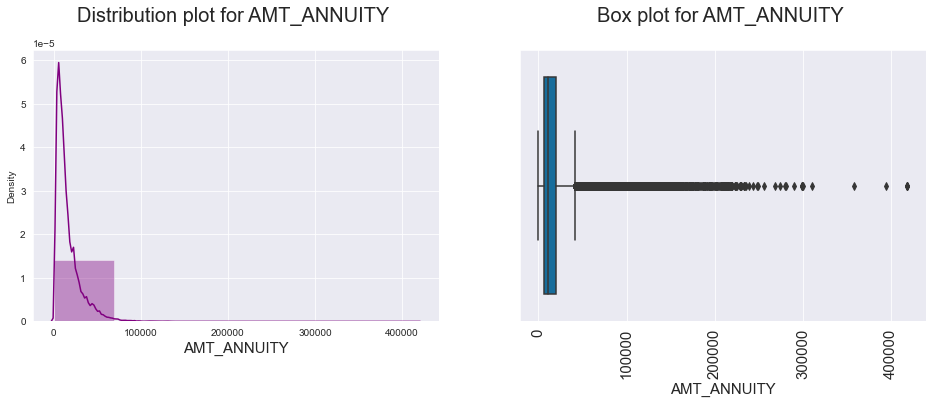

In [228]:
# PLot
plot_num("AMT_ANNUITY")

- Annuity is the monthly amount paid by client to company.
- Maximum number of annuities are within 1 lac. 
- While annuity above 3 lacs can be considered to be outliers but we will not remove them.

- #### Analysing `"AMT_APPLICATION"` variable

  AMT_APPLICATION :-How much credit did client ask for.

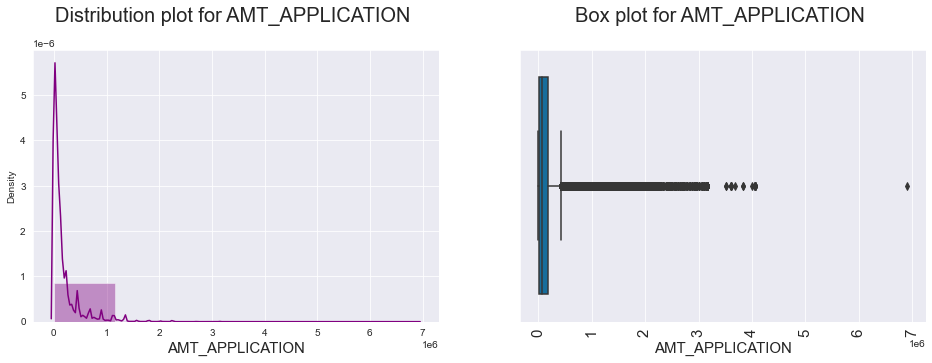

In [229]:
# Plot
plot_num("AMT_APPLICATION")

- The client wants to purchase a product whose price is high, so he has applied for high credit in application.
- Here the outlier of 70 lacs can be to purchase house property. Hence, this amount can't be removed.

- #### Analysing `"AMT_CREDIT"` variable

  AMT_CREDIT :- Final credit amount.

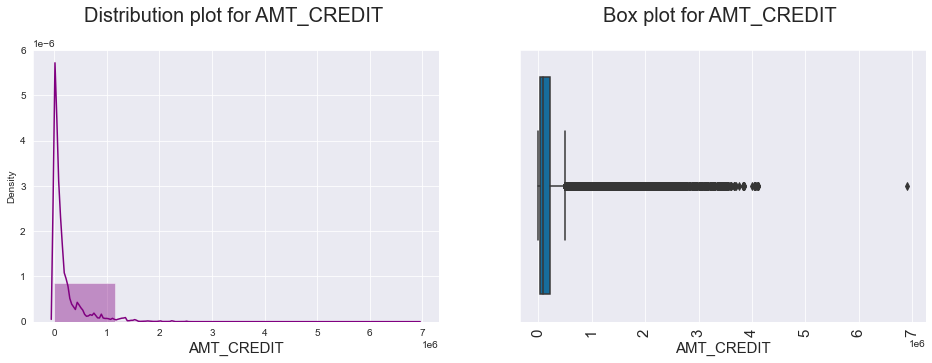

In [230]:
# Plot
plot_num("AMT_CREDIT")

- Few clients ahve received the final credit amount above 12 lacs this will be purely based on the product and income of client who has applied for credit.
- We see that there are outliers but the outlier of 70 lacs approx might be for purchase of property such as house. So we can't remove this to be an outlier. 

- #### Analysing `"DAYS_DECISION"` variable

  DAYS_DECISION :-When was the decision about previous application made relative to current application.

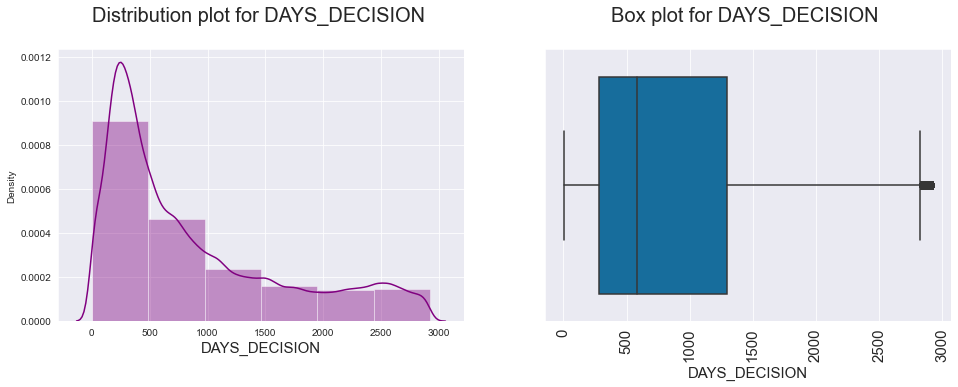

In [231]:
# Plot
plot_num("DAYS_DECISION")

- Maximum days required to decide about previous credit application is between 0-500 days i.e. more than 1 year.
- Days above 2800 are definitely outliers, as the company did not take such long time to process loan.

- #### Analysing `"CNT_PAYMENT"` variable

  CNT_PAYMENT :- Term of previous credit at application.

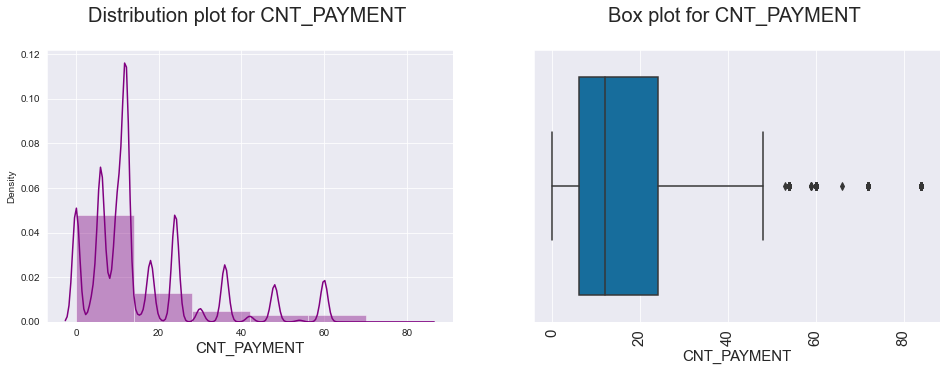

In [232]:
# Plot
plot_num("CNT_PAYMENT")

- The most the term of credit is between 0 - 20.
- Also we can see outliers which is above 70.

- ##### Subtask 5.8.2: Univariate Analysis of categorical Variables

- #### Analysing `"NAME_CONTRACT_TYPE"` variable

  NAME_CONTRACT_TYPE :- Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application

In [233]:
# Visualize using Pie Chart.

pie_cont = previous_app['NAME_CONTRACT_TYPE'].value_counts()

pie = pd.DataFrame({'labels':pietest.index, 'values':pietest.values})

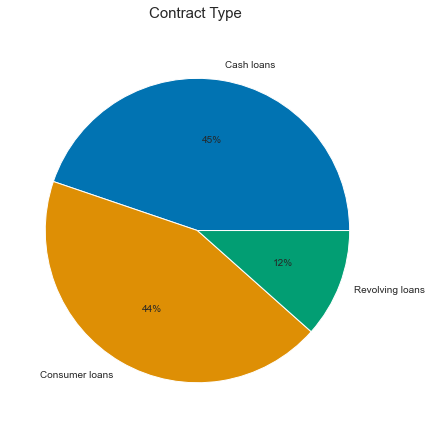

In [234]:
# Pie Chart for NAME_CONTRACT_TYPE.
plt.figure(figsize=[15,7])

plt.pie(pie_cont, labels=pie_cont.index,autopct='%1.0f%%')

plt.title("Contract Type \n ", fontsize = 15)
plt.show()

- Cash and Consumer loans were the most popular contract types in all the previous applications, accounting for over 89% of all past applications.

- Only 12% of clients in the past applied for revolving loans.



- #### Analysing `"NAME_PORTFOLIO"` variable

  NAME_PORTFOLIO :- Was the previous application for CASH, POS.

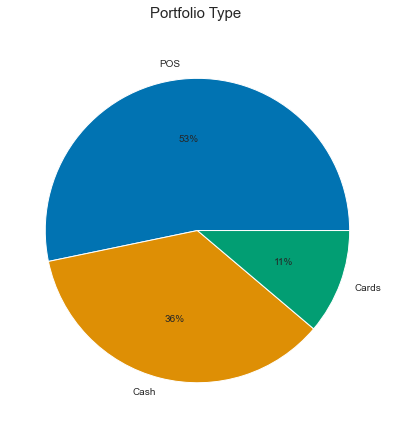

In [235]:
# Pie Chart for NAME_PORTFOLIO .

pie_cont = previous_app['NAME_PORTFOLIO'].value_counts()

pie = pd.DataFrame({'labels':pietest.index, 'values':pietest.values})

plt.figure(figsize=[12,7])

plt.pie(pie_cont, labels=pie_cont.index,autopct='%1.0f%%')

plt.title("Portfolio Type \n ", fontsize = 15)
plt.show()

- 53% of the past applications were for Point-of-Sale (POS) credit, followed by Cash at 36%.

- #### Analysing `"NAME_PRODUCT_TYPE"` variable

  NAME_PRODUCT_TYPE :- Was the previous application x-sell o walk-in

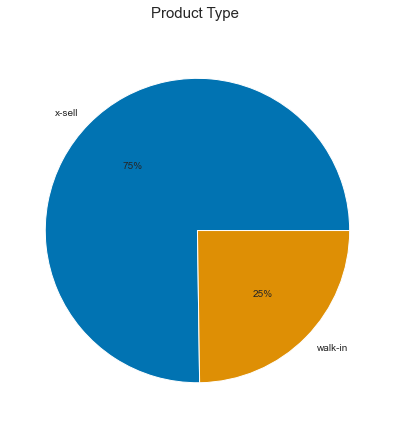

In [236]:
# Pie Chart for NAME_PRODUCT_TYPE .

pie_port = previous_app['NAME_PRODUCT_TYPE'].value_counts()
pie = pd.DataFrame({'labels':pietest.index, 'values':pietest.values})

plt.figure(figsize=[12,7])
plt.pie(pie_port, labels=pie_port.index,autopct='%1.0f%%')
plt.title("Product Type \n ", fontsize = 15)
plt.show()

- Cross-Sell (x-sell) accounted for the majority of the previous applications at 75%. While rest were walk-ins.

- #### Analysing `"CODE_REJECT_REASON"` variable

  CODE_REJECT_REASON :-Why was the previous application rejected.

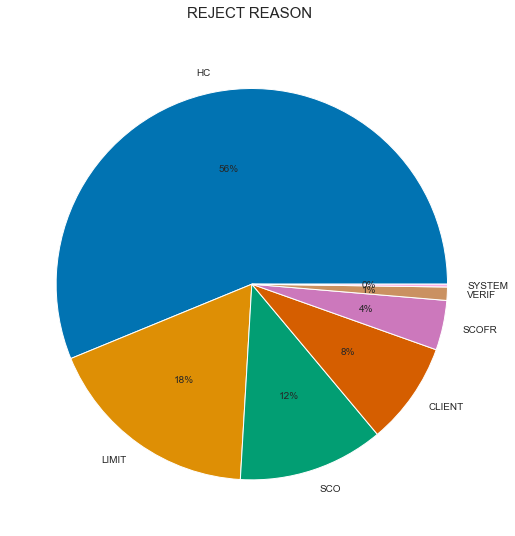

In [237]:
# Pie Chart for CODE_REJECT_REASON .

pie_port = previous_app['CODE_REJECT_REASON'].value_counts()
pie = pd.DataFrame({'labels':pietest.index, 'values':pietest.values})


plt.figure(figsize=[14,9])
plt.pie(pie_port, labels=pie_port.index,autopct='%1.0f%%')
plt.title("REJECT REASON \n ", fontsize = 15)
plt.show()

- 56% of the rejections were due to HC

- LIMIT and SCO together accounted for 30% of rejections


In [238]:
# Univariate Analysis of Categorical Variables

def plot_cat(var_2):
    plt.figure(figsize=[11,6])

# Count plot for Variable  for previous_app
    

    sns.countplot(var_2, data = previous_app)

# Labelling
    plt.title(f'Count plot for {var_2}  \n', fontsize=20, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size = 15)
    plt.yticks(size = 15)
    plt.ylabel('Counts', fontsize = 15, fontweight=1.5)
    
    plt.yscale('log')

    plt.show()

- #### Analysing `"PRODUCT_COMBINATION"` variable

  PRODUCT_COMBINATION :- Detailed product combination.

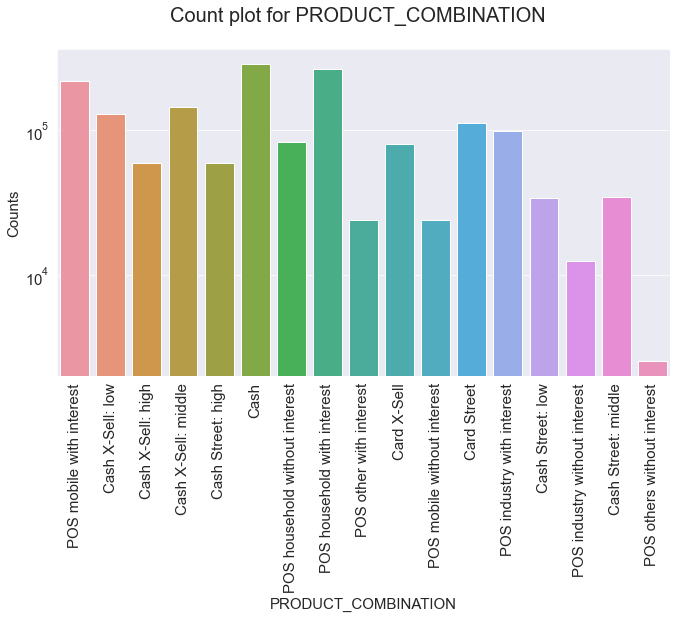

In [239]:
# Plot
plot_cat("PRODUCT_COMBINATION")

- Cash product has the highest count when applied by client in previous application.
- Followed by  POS household with interest being the second highest number of application for credit.

- #### Analysing `"NAME_GOODS_CATEGORY"` variable

  NAME_GOODS_CATEGORY :-The kind of goods did the client apply for.

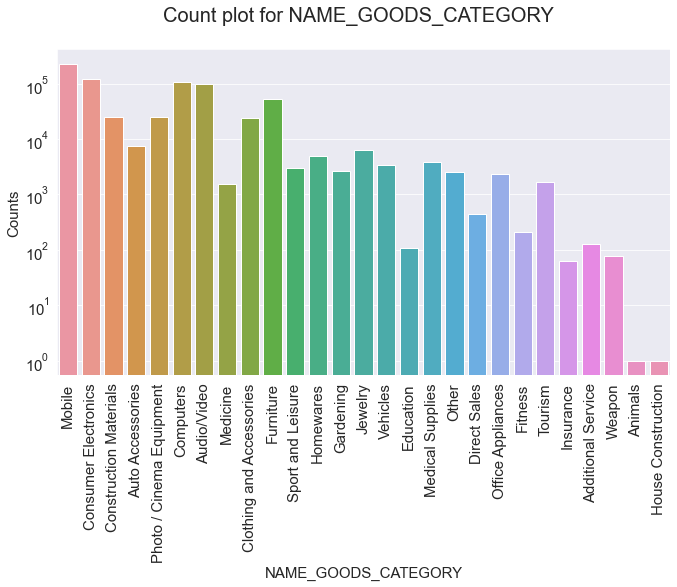

In [240]:
# Plot
plot_cat("NAME_GOODS_CATEGORY")

- Clients have applied for credit the highest times for purchasing mobiles.
- Well consumer electronics, computers and audio/video have the second highest number of application.

- ##### Subtask 5.8.3: Bivariate Analysis Variables

  Bivariate Analysis for `previous_app`.

- ####  Numerical vs Numerical Variables

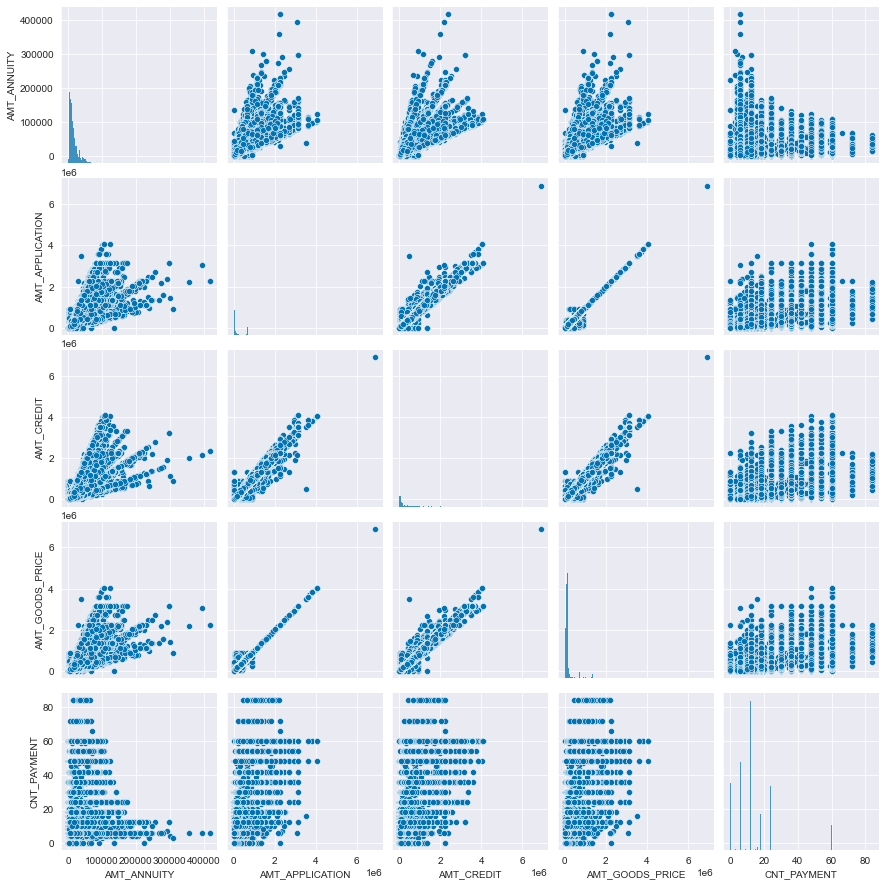

In [241]:
# Pairplot for Previous Application- previous_app

sns.pairplot(data = previous_app, vars=["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"])

plt.show()

- Amt_annuity vs cnt_payment:- The number of payments will increase with low annuity.
- Good'price amount and amount application has a linear relationship with each other, as one increases the other increases. Same with credit and good's price.
- For credit amount and annuity, majority of points are between 0 to 10 lacs. Also, if credit amount is high so will be the annuity.
- As application amount increases, the annuity will also increase.
- We can find few outliers in each pairplots.

- #### Categorical vs Numerical Variables

In [242]:
# Bivariate Analysis of Categorical vs Numerical Variables

def plot_num_cat(var_1, var_2):
    plt.figure(figsize=[12,5])

# Barplot for Variable  for Clients with No Payment Difficulties
    sns.barplot(x = var_2, y = var_1 ,data = previous_app)

# Labelling
    plt.title(f'{var_1} vs {var_2} \n', fontsize=20, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.ylabel(var_1, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation = 90, size =15)
    
    plt.yscale('log')
    
    
    plt.show()

- #### AMT_APPLICATION  vs CODE_REJECT_REASON

   AMT_APPLICATION :- How much credit did client ask for.
   
   CODE_REJECT_REASON :- Rejection reason in previous application .


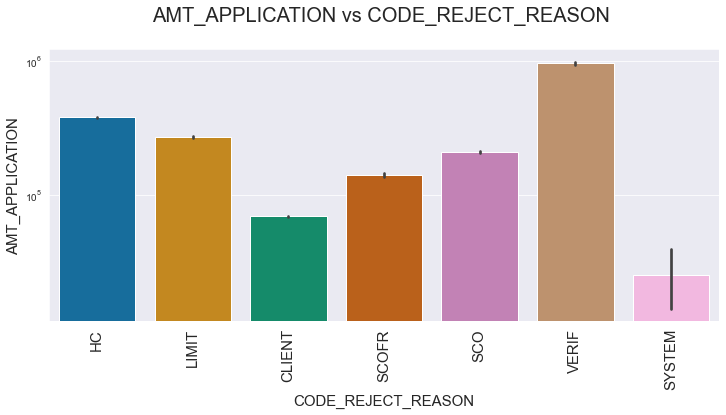

In [243]:
# Plot
plot_num_cat("AMT_APPLICATION","CODE_REJECT_REASON")

- The  clients who have applied for credit above 9 lacs are being rejected on the basis of "VERIF" followed by "HC" credit amount 7 lacs approx.

- #### AMT_GOODS_PRICE  vs NAME_GOODS_CATEGORY

   AMT_GOODS_PRICE :- Goods price of good that client asked for (if applicable).
   
   NAME_GOODS_CATEGORY :- The kind of goods did the client apply for.


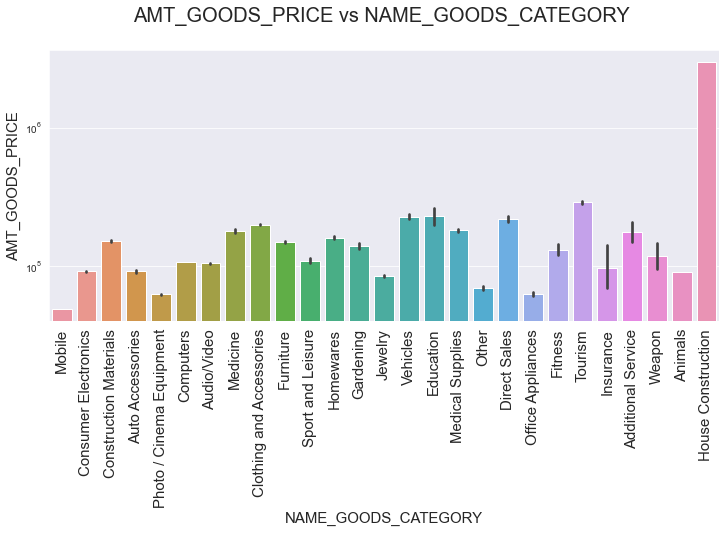

In [244]:
# Plot
plot_num_cat("AMT_GOODS_PRICE","NAME_GOODS_CATEGORY")

- The highest application received in goods_category is House construction with goods_price above 10 lacs.
- The second highest is Tourism category with goods_price above 1 lacs.

- #### AMT_CREDIT  vs NAME_CONTRACT_STATUS

   AMT_CREDIT :- Final credit amount.
   
   NAME_CONTRACT_STATUS :-Contract status (approved, cancelled, ...).


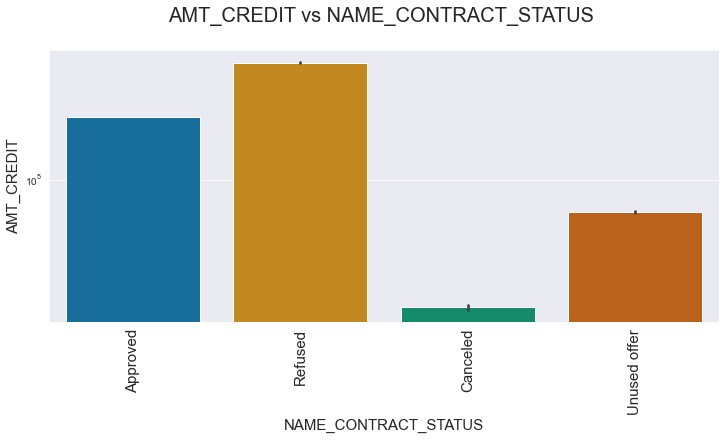

In [245]:
# Plot
plot_num_cat("AMT_CREDIT","NAME_CONTRACT_STATUS")

- The company has refused maximum clients whose credit amount above 10 lacs becuase the client did not meet their requirement.
- While the company has also approved substantial clients whose credit amount is above 10 lacs.



- #### AMT_CREDIT  vs NAME_YIELD_GROUP

   AMT_CREDIT :- Final credit amount .
   
   NAME_YIELD_GROUP :-Grouped interest rate into small medium and high.


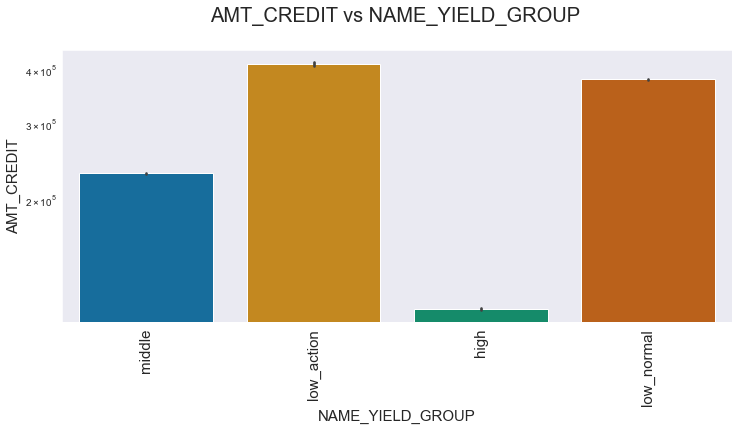

In [246]:
# Plot
plot_num_cat("AMT_CREDIT","NAME_YIELD_GROUP")

- The low_action yield group (interest) as the highest credit amount followed by low_normal. 
- So we can say that low interest rates were charged by company on the final credit amount.

- #### AMT_ANNUITY  vs NAME_CONTRACT_STATUS

   AMT_ANNUITY :- Annuity.
   
   NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...).


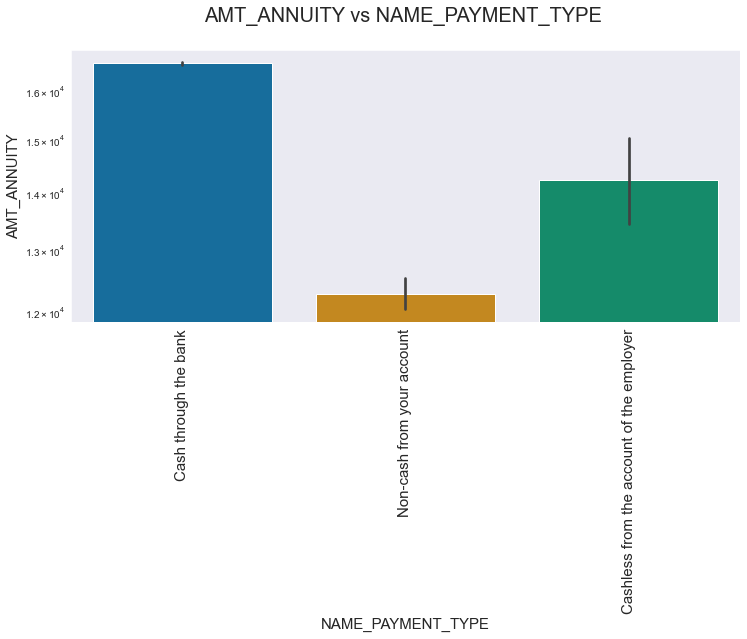

In [247]:
# Plot
plot_num_cat("AMT_ANNUITY","NAME_PAYMENT_TYPE")

- Many clients have opted the cash through bank payment method to pay their monthly annuity of 16000 approx.
- The second most popular paymnet method is cashless from the account of the employer to pay monthly annuity of approx 14000.

- #### Categorical vs Categorical Variables

- ##### NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS

  NAME_CONTRACT_TYPE :- Contract product type (Cash loan, consumer loan [POS] ,...).
  
  NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...).

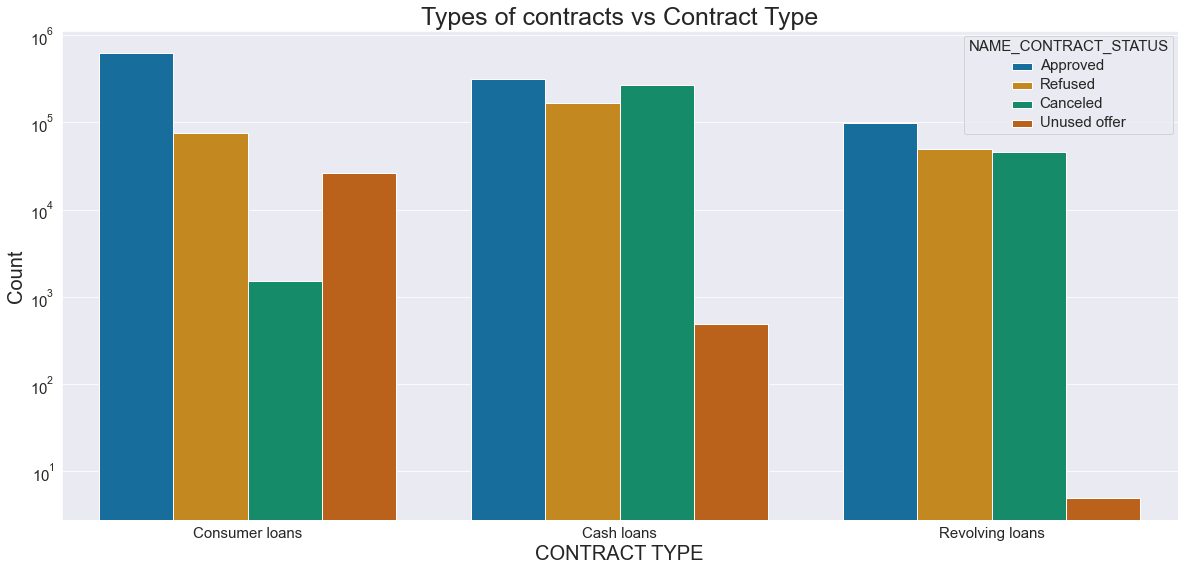

In [248]:
#Types of contracts vs Contract Type

# Count plot for Variable  for previous_app.

plt.figure(figsize=(20,9))

ax = sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'NAME_CONTRACT_STATUS' ,data = previous_app)


plt.title('Types of contracts vs Contract Type', size = 25)
plt.yticks(size = 15)
plt.xticks(rotation=0, size = 15)
plt.xlabel('CONTRACT TYPE' , size = 20)
plt.ylabel('Count' , size =20)

# added log as scale difference made some contract types difficult to comprehend
plt.yscale('log')


plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title


plt.show()

- The consumer loans have the highest approval count amongst the other cash loans and revolving loans.
- While cash loans have highest refusing count as compared with other types of loans.

- ##### NAME_PAYMENT_TYPE vs NAME_CONTRACT_STATUS

  NAME_PAYMENT_TYPE :- Payment method that client chose to pay.
  
  NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...) of previous application.

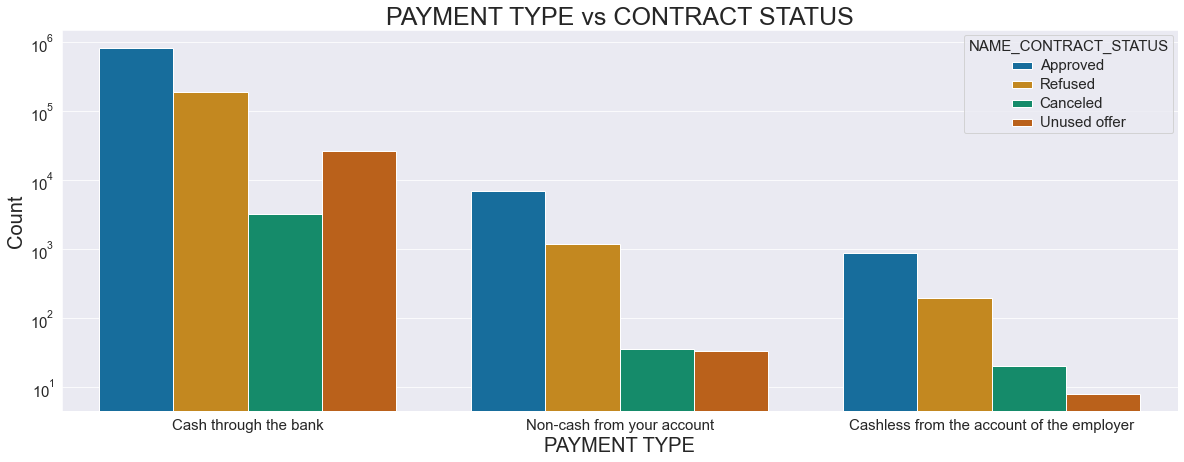

In [249]:
# Types of Client vs Contract Type
# NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS

# Count plot for Variable  for previous_app.

plt.figure(figsize=(20,7))
ax = sns.countplot(x = 'NAME_PAYMENT_TYPE', hue = 'NAME_CONTRACT_STATUS' ,data = previous_app)


plt.title('PAYMENT TYPE vs CONTRACT STATUS', size = 25)
plt.yticks(size = 15)
plt.xticks(rotation=0, size = 15)
plt.xlabel('PAYMENT TYPE' , size = 20)
plt.ylabel('Count' , size =20)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

# added log as scale difference made some contract types difficult to comprehend
plt.yscale('log')


plt.show()

- The cash through bank payment method has the highest count for approving the contract of clients. Followed by refusals and unused offer.
- While in non-cash from your account payment method as the highest approval count as compared to others within groups.
- The same is the case for cashless from employer.


- ##### NAME_GOODS_CATEGORY vs NAME_PORTFOLIO

  NAME_GOODS_CATEGORY :- The kind of goods did the client apply for in the previous application.
  
  NAME_PORTFOLIO :- Was the previous application for CASH, POS.

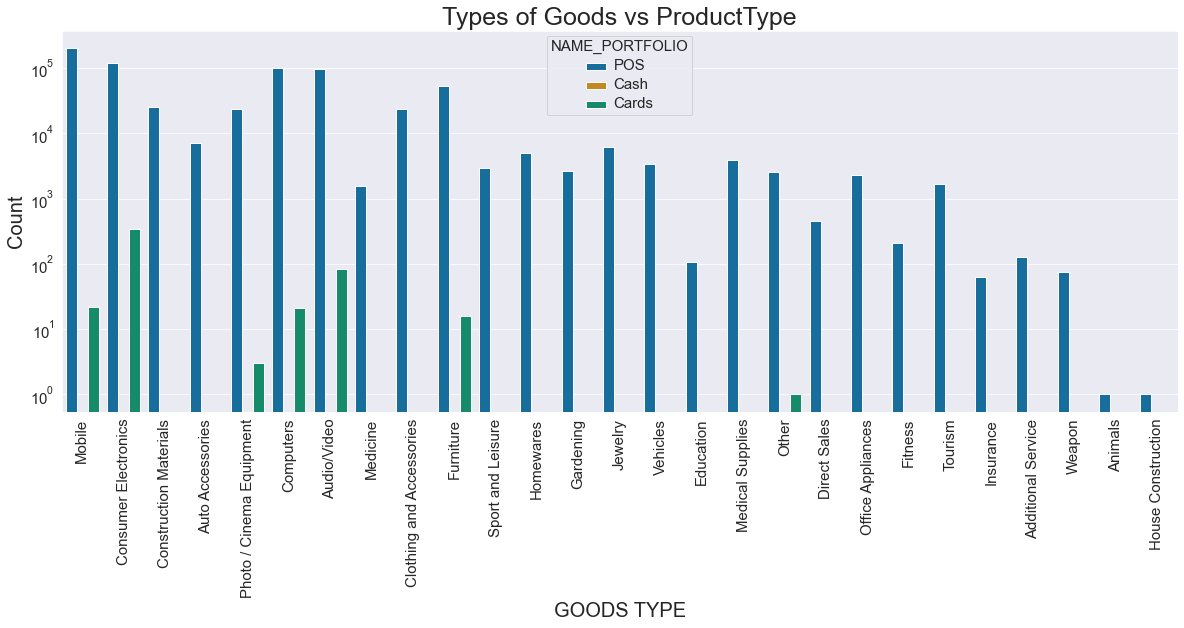

In [250]:
# Types of Client vs Contract Type
# NAME_GOODS_CATEGORY vs NAME_PORTFOLIO

# Count plot for Variable  for previous_app.

plt.figure(figsize=(20,7))
ax = sns.countplot(x = 'NAME_GOODS_CATEGORY', hue = 'NAME_PORTFOLIO' ,data = previous_app)


plt.title('Types of Goods vs ProductType', size = 25)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('GOODS TYPE' , size = 20)
plt.ylabel('Count' , size =20)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

#added log as scale difference made some contract types difficult to comprehend
plt.yscale('log')


plt.show()

- From point of sale (POS) transaction, the mobiles have the highest count. Followed by consumer electronics and computers.


- ##### NAME_CLIENT_TYPE vs CHANNEL_TYPE

  NAME_CLIENT_TYPE :- Was the client old or new client when applying for the previous application.
  
  CHANNEL_TYPE :- Through which channel we acquired the client on the previous application.

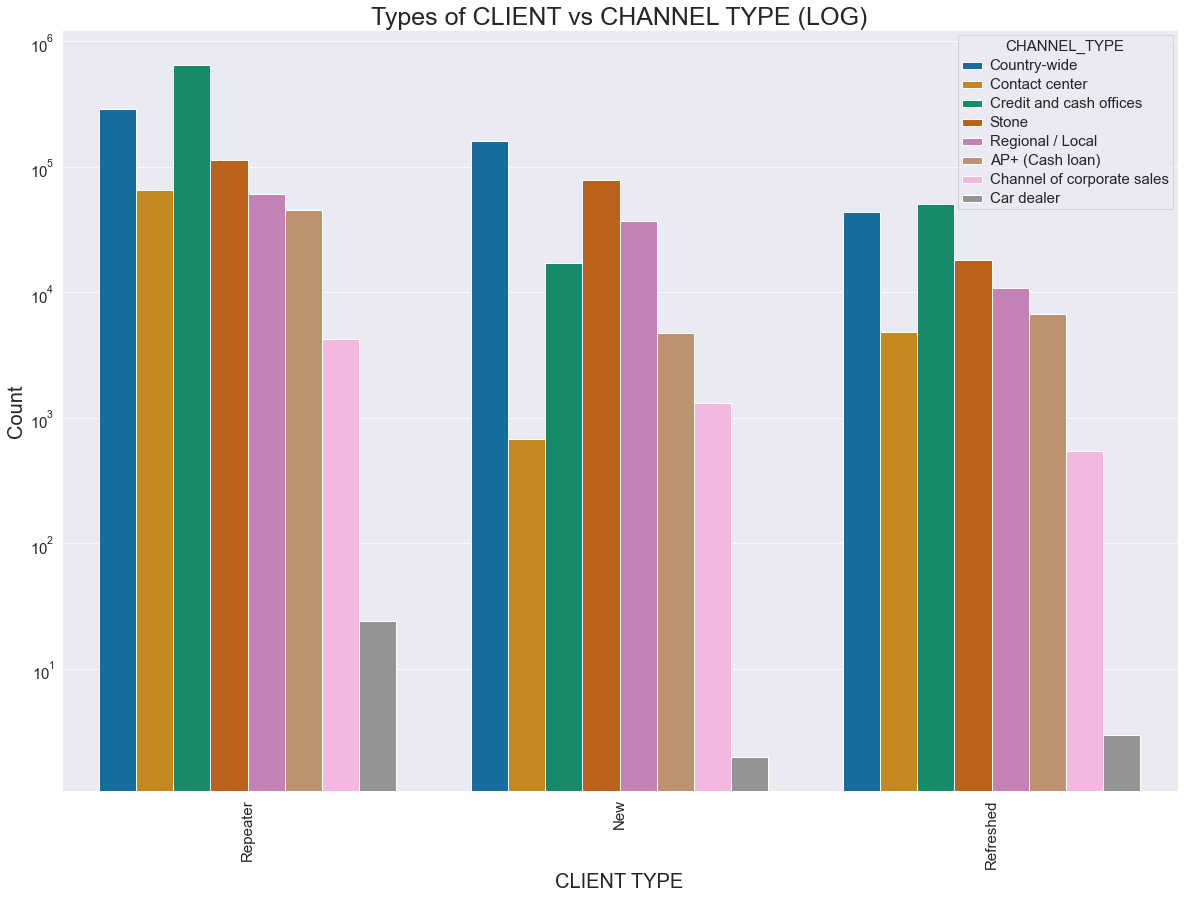

In [251]:
# Types of Client vs Contract Type
# NAME_CLIENT_TYPE vs CHANNEL_TYPE

# Count plot for Variable  for previous_app.

plt.figure(figsize=(20,14))
ax = sns.countplot(x = 'NAME_CLIENT_TYPE', hue = 'CHANNEL_TYPE' ,data = previous_app)


plt.title('Types of CLIENT vs CHANNEL TYPE (LOG)', size = 25)
plt.yticks(size = 15)
plt.xticks(rotation=90, size = 15)
plt.xlabel('CLIENT TYPE' , size = 20)
plt.ylabel('Count' , size =20)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

#added log as scale difference made some contract types difficult to comprehend
plt.yscale('log')


plt.show()

- From credit and cash offices have acquired the highest number of repeater clients, followed by country-wide channel.
- In case of refreshed clients, they are acquired by credit and cash followed by country-wide and stone.
- Whereas, new clients are mainly acquired through country-wide channnel. 

- ### Subtask 5.8.4: Multivariate Analysis Variables
Multivariate Analysis for `previous_app`.

- ##### NAME_YIELD_GROUP vs AMT_GOODS_PRICE vs NAME_CONTRACT_STATUS
 
  NAME_YIELD_GROUP :- Grouped interest rate into small medium and high of the previous application.
  
  AMT_GOODS_PRICE :- Goods price of good that client asked for (if applicable) on the previous application.
  
  NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...) of previous application.

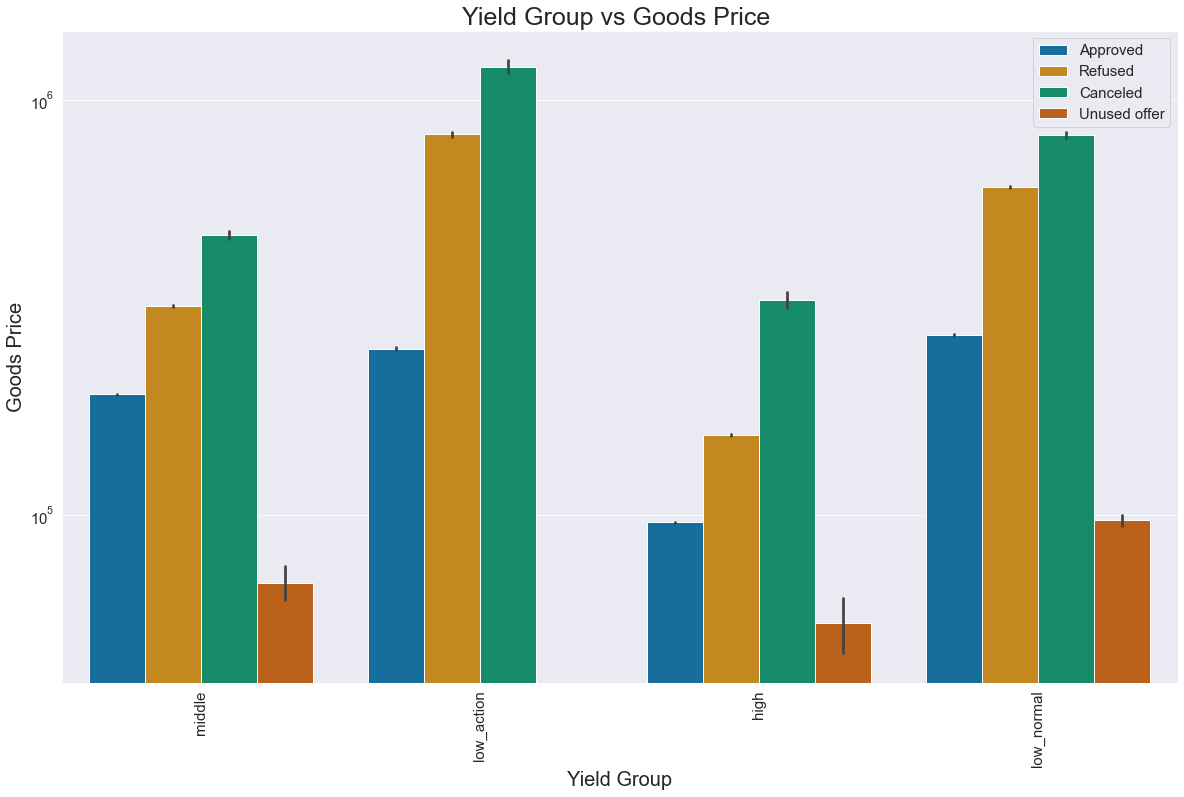

In [252]:
# Plot for NAME_YIELD_GROUP vs AMT_GOODS_PRICE vs NAME_CONTRACT_STATUS for Previous Application `previous_app`

plt.figure(figsize=(20,12))

ax2 = sns.barplot(data =previous_app, x='NAME_YIELD_GROUP',y='AMT_GOODS_PRICE', hue ='NAME_CONTRACT_STATUS')
plt.title('Yield Group vs Goods Price ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('Yield Group' , fontsize = 20)
plt.ylabel('Goods Price' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90, size = 15)

plt.yscale('log')

plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- Many clients have cancelled the application midway and their good's prices are even very high.
- Also, the company has rejected many applications of clients specially from low yield group (both loa_action & low_normal).

- ##### NAME_YIELD_GROUP vs AMT_CREDIT vs NAME_CLIENT_TYPE
 
  NAME_YIELD_GROUP :- Grouped interest rate into small medium and high of the previous application.
  
  AMT_CREDIT :- Final credit amount on the previous application.
  
  NAME_CLIENT_TYPE :- Was the client old or new client when applying for the previous application.

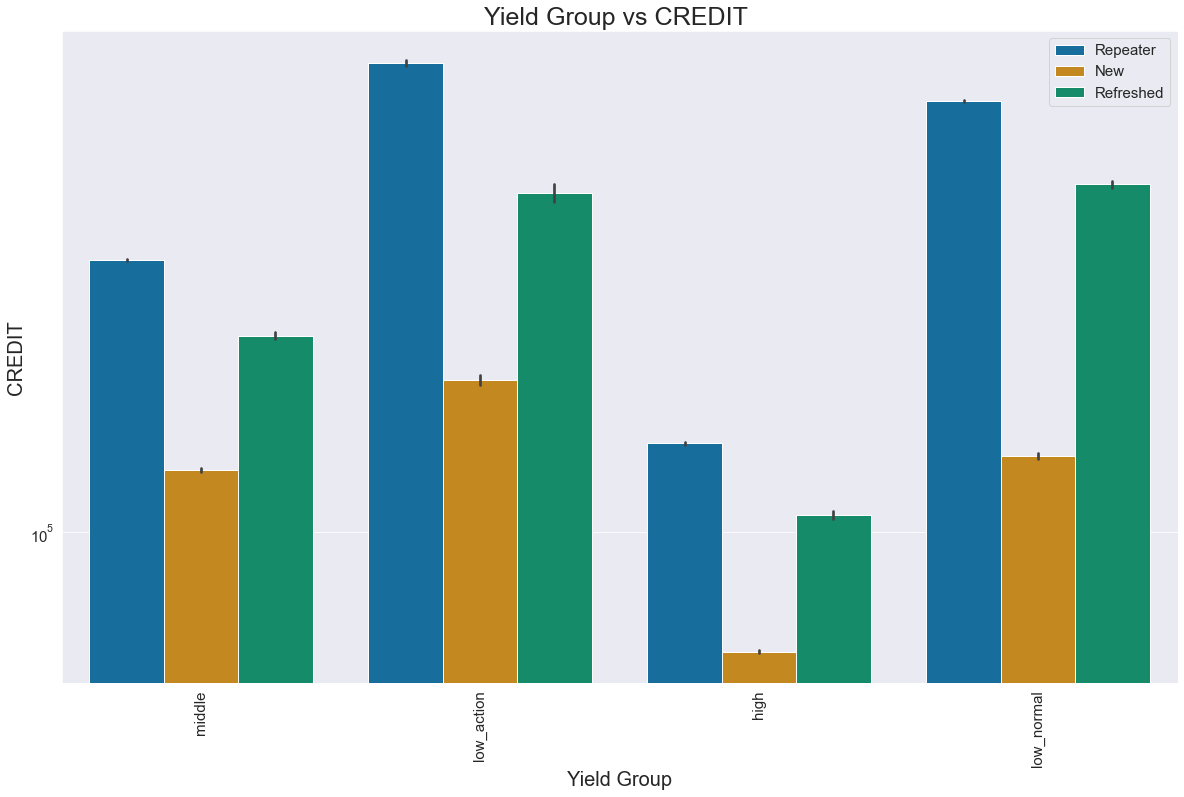

In [253]:
# Plot for NAME_YIELD_GROUP vs AMT_CREDIT vs NAME_CLIENT_TYPE for Previous Application `previous_app`

plt.figure(figsize=(20,12))

ax2 = sns.barplot(data =previous_app, x='NAME_YIELD_GROUP',y='AMT_CREDIT', hue ='NAME_CLIENT_TYPE')
plt.title('Yield Group vs CREDIT ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('Yield Group' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90, size = 15)

plt.yscale('log')

plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- The repeater clients have recieved low yield (for both low_action & low_normal) with high credit amount, maybe these are those clients who pay their credit on time.

- ##### NAME_YIELD_GROUP vs AMT_CREDIT vs NAME_CONTRACT_STATUS
 
  NAME_YIELD_GROUP :- Grouped interest rate into small medium and high of the previous application.
  
  AMT_CREDIT :- Final credit amount on the previous application.
  
  NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...) of previous application.

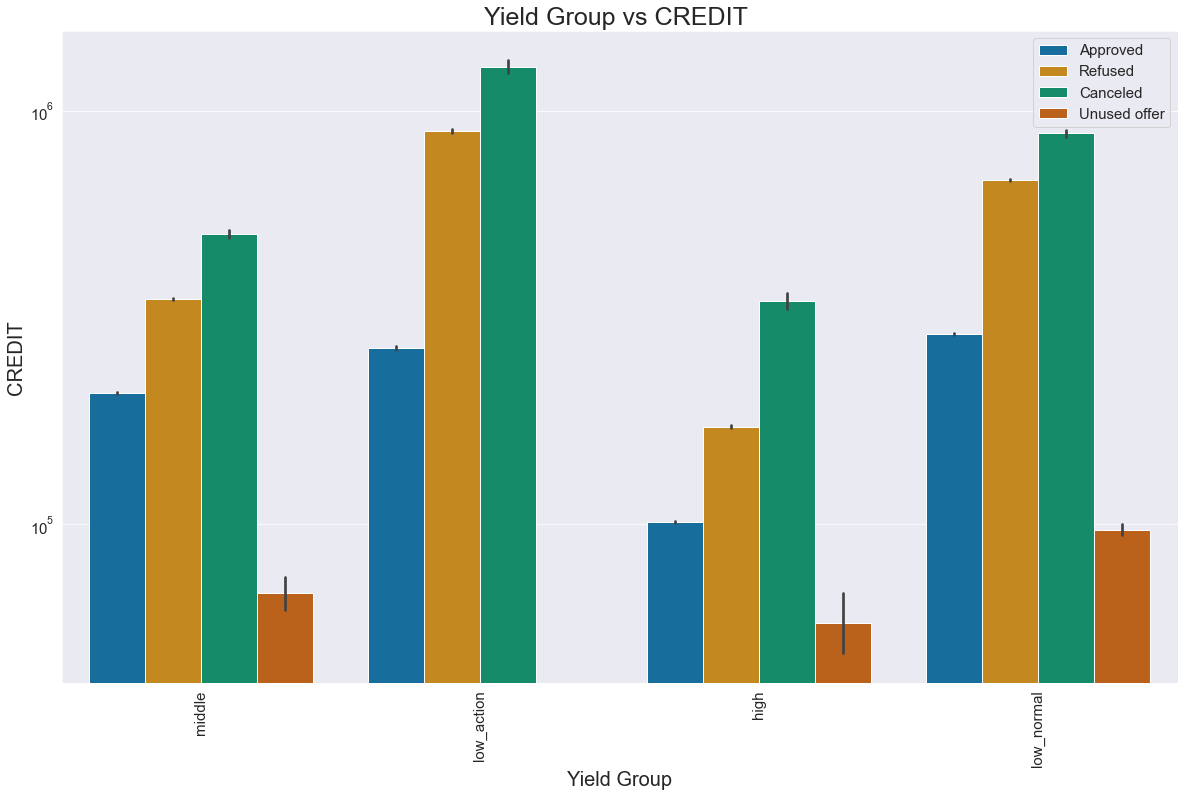

In [254]:
# Plot for NAME_YIELD_GROUP vs AMT_CREDIT vs NAME_CONTRACT_STATUS for Previous Application `previous_app`

plt.figure(figsize=(20,12))

ax2 = sns.barplot(data =previous_app, x='NAME_YIELD_GROUP',y='AMT_CREDIT', hue ='NAME_CONTRACT_STATUS')
plt.title('Yield Group vs CREDIT ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('Yield Group' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90, size = 15)

plt.yscale('log')

plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- Surprisingly, many applicants have cancelled their application midway, although they have applied for high credit with low yield (interest rate).

- ##### NAME_PORTFOLIO vs AMT_CREDIT vs CODE_REJECT_REASON

  NAME_PORTFOLIO :- Was the previous application for CASH, POS.
  
  AMT_CREDIT :- Final credit amount on the previous application.
  
  CODE_REJECT_REASON :- Why was the previous application rejected.
  

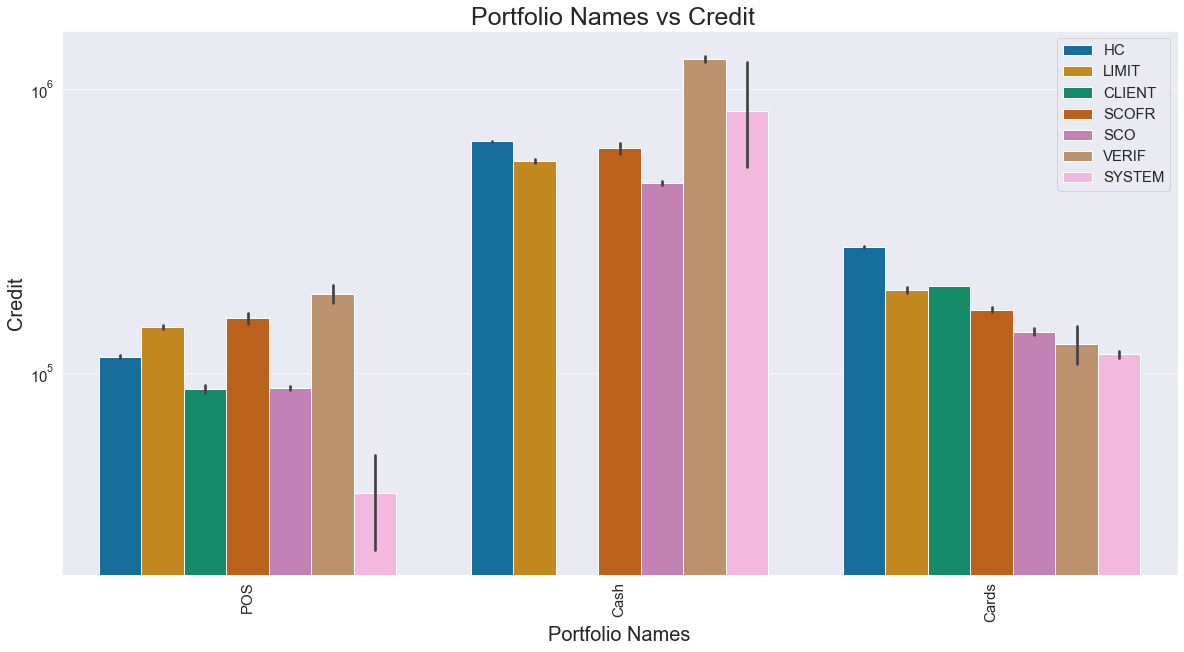

In [255]:
# Plot for NAME_PORTFOLIO vs AMT_CREDIT vs CODE_REJECT_REASON for Previous Application `previous_app`

plt.figure(figsize=(20,10))

ax2 = sns.barplot(data =previous_app, x='NAME_PORTFOLIO',y='AMT_CREDIT', hue ='CODE_REJECT_REASON')
plt.title('Portfolio Names vs Credit  ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('Portfolio Names' , fontsize = 20)
plt.ylabel('Credit' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90, size = 15)

plt.yscale('log')

plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- The cash application of clients having high credit amount was rejected maaximum times on the basis on limit. Followed by system.

### Task 6: Top 10 Correlation

Data Analysis for dataframe `previous_app` i.e. Previous Application

In [256]:
# Find the list of all numeric variables("int", "float") and find the correlation between them.

var_prev = list(previous_app.select_dtypes(['int64','float']).columns)

var_prev = previous_app[var_prev]

var_prev_corr = var_prev.corr()
var_prev_corr

# Find the List of Top 10 Correlation in previous_app.

top10_prev = var_prev_corr.where(np.triu(np.ones(var_prev_corr.shape),k=1).astype(np.bool)).unstack().reset_index()

top10_prev.columns=['Column1','Column2','Correlation']
top10_prev.dropna(subset=['Correlation'],inplace=True)

# Top 10 correlation.

top10_prev = top10_prev.sort_values(by=['Correlation'], ascending=False)
top10_prev = top10_prev.head(10)
top10_prev

Column1          Column2  Correlation
48  AMT_GOODS_PRICE  AMT_APPLICATION     0.999883
49  AMT_GOODS_PRICE       AMT_CREDIT     0.993700
39       AMT_CREDIT  AMT_APPLICATION     0.976276
47  AMT_GOODS_PRICE      AMT_ANNUITY     0.821806
38       AMT_CREDIT      AMT_ANNUITY     0.816384
29  AMT_APPLICATION      AMT_ANNUITY     0.809716
75      CNT_PAYMENT  AMT_APPLICATION     0.680764
76      CNT_PAYMENT       AMT_CREDIT     0.673938
77      CNT_PAYMENT  AMT_GOODS_PRICE     0.672224
74      CNT_PAYMENT      AMT_ANNUITY     0.394070

- The application amount and good's price have the highest correlation as this is product the client was to purchased, so applied for credit on it.
- The 2nd highly correlated variables are credit amount and good's price, it's the final amount approved by the company to client for purchasing those good's he wants.
- There is positive correlation between annuity and good's price and also between annuity and credit, as this is the annuity which the client will pay on monthly basis as approved by company.

(5.5, -0.5)

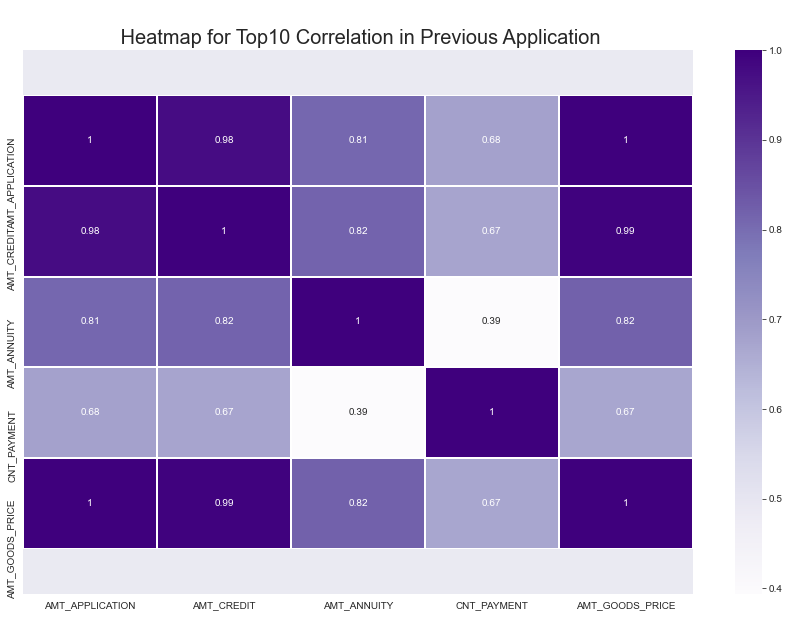

In [257]:
# Create Heatmap for Top10 correlation.

plt.figure(figsize=(15,10))
ax = sns.heatmap(previous_app[["AMT_APPLICATION","AMT_CREDIT","AMT_ANNUITY","CNT_PAYMENT", "AMT_GOODS_PRICE"]].corr(), annot=True, cmap='Purples', linewidths=0.7)

# Labelling heatmap, x-axis and y-axis.
plt.title('\n Heatmap for Top10 Correlation in Previous Application', fontsize=20, fontweight=3)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)

- The credit amount approved to been given to client is highly correlated with amount application given by client.
- The least correlation is of 0.39 between cnt_payment and annuity.
- Also, annuity and Good's price have the highest correlation amongst all other variables considered here.

## Task 7: Merging the dataframes `new_app` and `previous_app`


- ###  Subtask 7.1: Merge the Dataframes.

Merge the dataframes `new_app` and `previous_app` and store them in a dataframe `all_app`.

In [258]:
# Merge the dataframes file using 'left join'.

all_app = pd.merge(new_app, previous_app, how='left' , on=['SK_ID_CURR'], suffixes = ('_new', '_prev'))


In [259]:
# Top 5 rows of dataframe

all_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_new CODE_GENDER FLAG_OWN_CAR  \
0      100002       1             Cash loans        Male            N   
1      100003       0             Cash loans      Female            N   
2      100003       0             Cash loans      Female            N   
3      100003       0             Cash loans      Female            N   
4      100004       0        Revolving loans        Male            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_new  \
0               Y             0            202500          406597   
1               N             0            270000         1293502   
2               N             0            270000         1293502   
3               N             0            270000         1293502   
4               Y             0             67500          135000   

   AMT_ANNUITY_new  AMT_GOODS_PRICE_new NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0            24700               351000   Unaccompanied          Working   
1            35698              1129500          Family    State servant   
2            35698              1129500          Family    State servant   
3            35698              1129500          Family    State servant   
4             6750               135000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                           0        Laborers                1   
1                           0      Core staff                2   
2                           0      Core staff                2   
3                           0      Core staff                2   
4                           0        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                     

- ### Subtask 7.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns for `all_app` dataframe.

In [260]:
# Check the number of rows and columns in "all_app" dataframe.

all_app.shape

(1429739, 70)

In [261]:
# Check the column wise info of "all_app" dataframe.

all_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429739 entries, 0 to 1429738
Data columns (total 70 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1429739 non-null  int64   
 1   TARGET                       1429739 non-null  int64   
 2   NAME_CONTRACT_TYPE_new       1429739 non-null  object  
 3   CODE_GENDER                  1429739 non-null  object  
 4   FLAG_OWN_CAR                 1429739 non-null  object  
 5   FLAG_OWN_REALTY              1429739 non-null  object  
 6   CNT_CHILDREN                 1429739 non-null  int64   
 7   AMT_INCOME_TOTAL             1429739 non-null  int64   
 8   AMT_CREDIT_new               1429739 non-null  int64   
 9   AMT_ANNUITY_new              1429739 non-null  int64   
 10  AMT_GOODS_PRICE_new          1429739 non-null  int64   
 11  NAME_TYPE_SUITE              1429739 non-null  object  
 12  NAME_INCOME_TYPE            

In [262]:
# Check the summary for numeric columns in "all_app" dataframe.

all_app.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.429739e+06  1.429739e+06  1.429739e+06      1.429739e+06   
mean   2.784748e+05  8.625351e-02  4.038331e-01      1.735927e+05   
std    1.028029e+05  2.807381e-01  7.164710e-01      1.983494e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789620e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675140e+05  0.000000e+00  1.000000e+00      2.115000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_new  AMT_ANNUITY_new  AMT_GOODS_PRICE_new  \
count    1.429739e+06     1.429739e+06         1.429739e+06   
mean     5.893036e+05     2.704068e+04         5.293373e+05   
std      3.874137e+05     1.403960e+04         3.556341e+05   
min      4.500000e+04     1.615000e+03         4.050000e+04   
25%      2.700000e+05     1.679800e+04         2.385000e+05   
50%      5.084950e+05     2.491600e+04         4.500000e+05   
75%      8.086500e+05     3.457300e+04         6.795000e+05   
max      4.050000e+06     2.580250e+05         4.050000e+06   

       REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count                   1429739.0     1.429739e+06          1.429739e+06   
mean                          0.0     2.148909e+00          2.058204e+00   
std                           0.0     9.001299e-01          4.963602e-01   
min                           0.0     1.000000e+00          1.000000e+00   
25%                           0.0     2.000000e+00          2.000000e+00   
50%                           0.0     2.000000e+00          2.000000e+00   
75%                           0.0     3.000000e+00          2.000000e+00   
max                           0.0     2.000000e+01          3.000000e+00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                 1.429739e+06             1.429739e+06   
mean                  2.036197e+00             1.199376e+01   
std                   4.891733e-01             3.233210e+00   
min                   1.000000e+00             0.000000e+00   
25%                   2.000000e+00             1.000000e+01   
50%                   2.000000e+00             1.200000e+01   
75%                   2.000000e+00             1.400000e+01   
max                   3.000000e+00             2.300000e+01   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                1.429739e+06                1.429739e+06   
mean                 1.229525e-02                4.434935e-02   
std                  1.102002e-01                2.058701e-01   
min                  0.000000e+00                0.000000e+00   
25%                  0.000000e+00                0.000000e+00   
50%                  0.000000e+00                0.000000e+00   
75%                  0.000000e+00                0.000000e+00   
max                  1.000000e+00                1.000000e+00   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                 1.429739e+06            1.429739e+06   
mean                  3.624857e-02            7.368058e-02   
std                   1.869081e-01            2.612505e-01   
min                   0.000000e+00            0.000000e+00   
25%                   0.000000e+00            0.000000e+00   
50%                   0.000000e+00            0.000000e+00   
75%                   0.000000e+00            0.000000e+00   
max                   1.000000e+00            1.000000e+00   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
count            1.429739e+06             1.429739e+06     1429739.0   
mean             2.219825e-01             1.738317e-01           0.0   
std              4.155796e-01             3.789649e-01           0.0   
min              0.000000e+00             0.000000e+00           0.0   
25%              0.000000e+00             0.000000e+00       

- ### Subtask 7.3: Check for Missing Values.

Check the percentage of null values in all columns of dataframe.

In [263]:
# Find the percentage of missing values in all columns of "all_app" dataframe.

round(all_app.isnull().sum()*100/len(all_app),4).sort_values(ascending=False)

NAME_CASH_LOAN_PURPOSE         95.8446
CODE_REJECT_REASON             81.5589
NAME_PRODUCT_TYPE              64.0761
NAME_GOODS_CATEGORY            56.8820
NAME_SELLER_INDUSTRY           51.1812
NAME_PAYMENT_TYPE              37.7244
OCCUPATION_TYPE                32.3585
NAME_YIELD_GROUP               31.1698
AMT_GOODS_PRICE_prev           23.5000
AMT_ANNUITY_prev               22.6392
CNT_PAYMENT                    22.6388
NAME_PORTFOLIO                 22.6388
EXT_SOURCE_3                   17.1753
NAME_CLIENT_TYPE                1.2601
NAME_CONTRACT_TYPE_prev         1.1741
PRODUCT_COMBINATION             1.1741
AMT_CREDIT_prev                 1.1522
AMT_APPLICATION                 1.1522
DAYS_DECISION                   1.1522
SK_ID_PREV                      1.1522
CHANNEL_TYPE                    1.1522
SELLERPLACE_AREA                1.1522
NAME_CONTRACT_STATUS            1.1522
DEF_60_CNT_SOCIAL_CIRCLE        0.2373
OBS_30_CNT_SOCIAL_CIRCLE        0.2373
DEF_30_CNT_SOCIAL_CIRCLE 

- The columns "CODE_REJECT_REASON" and "NAME_CASH_LOAN_PURPOSE" were retained as they provide insights for other columns.
- So if drop some columns from `all_app` dataframe, we might lose some potential information.
- Also we have cleansed the `new_app` and `previous_app`dataframes and analysed them before merging.

In [264]:
# Name the columns with less than equal to 13% null values.

list(all_app.columns[(all_app.isnull().sum()/ len(all_app)<=0.13) & (all_app.isnull().sum()/ len(all_app)>0)])

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'YEARS_LAST_PHONE_CHANGE',
 'SK_ID_PREV',
 'NAME_CONTRACT_TYPE_prev',
 'AMT_APPLICATION',
 'AMT_CREDIT_prev',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_CLIENT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'PRODUCT_COMBINATION']

- ### Subtask 7.4: Handling incorrect datatypes.

To Check the dataypes and convert them to correct datatypes dataframe `all_app`.

In [265]:
#Check the datatypes of all the columns 
all_app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_new           object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                  int64
AMT_CREDIT_new                    int64
AMT_ANNUITY_new                   int64
AMT_GOODS_PRICE_new               int64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                   int64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64


In [266]:
# Number of  the columns which have "Float64" dtypes.
len(list(all_app.select_dtypes(include = ['float64'])))

14

In [267]:
# Name the columns which have "Float64" dtypes.

list(all_app.select_dtypes(include = ['float64']))

['EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'YEARS_LAST_PHONE_CHANGE',
 'SK_ID_PREV',
 'AMT_ANNUITY_prev',
 'AMT_APPLICATION',
 'AMT_CREDIT_prev',
 'AMT_GOODS_PRICE_prev',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

In [268]:
# Change the dtype of columns from "Float64" to "Int64"
numeric_columns = ['EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_LAST_PHONE_CHANGE', 'SK_ID_PREV', 'AMT_ANNUITY_prev', 'AMT_APPLICATION', 'AMT_CREDIT_prev', 'AMT_GOODS_PRICE_prev', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']

all_app.loc[:, numeric_columns] = all_app.loc[:, numeric_columns].apply(lambda x: x.astype('int64', errors = 'ignore'))

In [269]:
# Number of  the columns which have "Object" dtypes.
len(list(all_app.select_dtypes(include = ['object'])))

25

In [270]:
# Name the columns which have "Object" dtypes.

list(all_app.select_dtypes(include = ['object']))

['NAME_CONTRACT_TYPE_new',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE_prev',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [271]:
# Change the dtype of columns from "Object" to "String"

obj_columns = ['NAME_CONTRACT_TYPE_new', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_prev', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

all_app.loc[:, obj_columns] = all_app.loc[:, obj_columns].apply(lambda x: x.astype('str', errors = 'ignore'))

In [272]:
# Check the datatypes of all "Int64" the columns 
list(all_app.select_dtypes(include = 'int64'))

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_new',
 'AMT_ANNUITY_new',
 'AMT_GOODS_PRICE_new',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH']

In [273]:
# Number of  the columns which have "Int64" dtypes.
len(list(all_app.select_dtypes(include = ['int64'])))

29

- ### Subtask 7.5: Cleaning Columns

To clean columns for dataframes `all_app`.

In [274]:
# Checking "NAME_CONTRACT_STATUS" value
all_app.NAME_CONTRACT_STATUS.value_counts()

Approved        885835
Canceled        259401
Refused         245259
Unused offer     22771
nan              16473
Name: NAME_CONTRACT_STATUS, dtype: int64

In [275]:
# REPLACING XAN and XAP and nan with np.NaN

all_app = all_app.replace('nan', np.nan)
all_app = all_app.replace(['XAP', 'XAN'], np.nan)

In [276]:
# Rechecking  
previous_app['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036518
Canceled         316275
Refused          290560
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [277]:
# Checking "NAME_CASH_LOAN_PURPOSE" value 
all_app.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             20117
Other                               13432
Urgent needs                         7236
Buying a used car                    2469
Building a house or an annex         2344
Everyday expenses                    2052
Medicine                             1871
Payments on other loans              1573
Education                            1334
Journey                              1041
Purchase of electronic equipment      934
Buying a new car                      886
Wedding / gift / holiday              801
Buying a home                         701
Car repairs                           691
Furniture                             660
Buying a holiday home / land          463
Business development                  359
Gasification / water supply           251
Buying a garage                       116
Hobby                                  45
Money for a third person               23
Refusal to name the goal               13
Name: NAME_CASH_LOAN_PURPOSE, dtyp

- ### Subtask 7.6: Data Analysis

Data Analysis for dataframe `all_app`

- #### Subtask 7.6.1: Univariate Analysis

Univariate Analysis using `all_app` dataframe.

- #### Analysing `"TARGET"` variable

  TARGET :- Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - client with no payment difficulties).

In [278]:
all_app['TARGET'].isna().sum()

0

In [279]:
all_app.TARGET.value_counts()

0    1306419
1     123320
Name: TARGET, dtype: int64

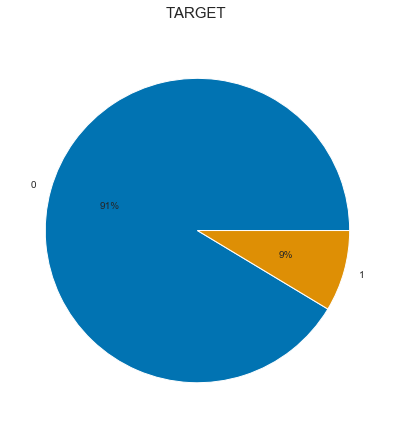

In [280]:
# Pie Chart for TARGET.

pietest = all_app['TARGET'].value_counts()

pie1 = pd.DataFrame({'labels':pietest.index, 'values':pietest.values})

plt.figure(figsize=[12,7])
plt.pie(pietest, labels=pietest.index,autopct='%1.0f%%')

plt.title("TARGET \n ", fontsize = 15)


plt.show()

Segemented the TARGET Variable into two dataframes `all_app_0` for Clients with No Payment Difficulties (Non-Defualters) and `all_app_1` for Clients with Payment Difficulties (Defualters). 

In [281]:
# Clients with No Payment Difficulties (Non-Defualters)

all_app_0 = all_app[all_app['TARGET']==0] 
all_app_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_new CODE_GENDER FLAG_OWN_CAR  \
1      100003       0             Cash loans      Female            N   
2      100003       0             Cash loans      Female            N   
3      100003       0             Cash loans      Female            N   
4      100004       0        Revolving loans        Male            Y   
5      100006       0             Cash loans      Female            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_new  \
1               N             0            270000         1293502   
2               N             0            270000         1293502   
3               N             0            270000         1293502   
4               Y             0             67500          135000   
5               Y             0            135000          312682   

   AMT_ANNUITY_new  AMT_GOODS_PRICE_new NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1            35698              1129500          Family    State servant   
2            35698              1129500          Family    State servant   
3            35698              1129500          Family    State servant   
4             6750               135000   Unaccompanied          Working   
5            29686               297000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                           0      Core staff                2   
2                           0      Core staff                2   
3                           0      Core staff                2   
4                           0        Laborers                1   
5                           0        Laborers                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   
5                  WEDNESDAY                       17   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Government   
5                       0                     

In [282]:
# Clients with Payment Difficulties (Defualters)
all_app_1 =all_app[all_app['TARGET']==1] 
all_app_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_new CODE_GENDER FLAG_OWN_CAR  \
0        100002       1             Cash loans        Male            N   
97       100031       1             Cash loans      Female            N   
163      100047       1             Cash loans        Male            N   
164      100047       1             Cash loans        Male            N   
165      100047       1             Cash loans        Male            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_new  \
0                 Y             0            202500          406597   
97                Y             0            112500          979992   
163               Y             0            202500         1193580   
164               Y             0            202500         1193580   
165               Y             0            202500         1193580   

     AMT_ANNUITY_new  AMT_GOODS_PRICE_new NAME_TYPE_SUITE  \
0              24700               351000   Unaccompanied   
97             27076               702000   Unaccompanied   
163            35028               855000   Unaccompanied   
164            35028               855000   Unaccompanied   
165            35028               855000   Unaccompanied   

         NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                 Working  Secondary / secondary special   
97                Working  Secondary / secondary special   
163  Commercial associate  Secondary / secondary special   
164  Commercial associate  Secondary / secondary special   
165  Commercial associate  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0    Single / not married  House / apartment                           0   
97                  Widow  House / apartment                           0   
163               Married  House / apartment                           0   
164               Married  House / apartment                           0   
165               Married  House / apartment                           0   

    OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0          Laborers                1                     2   
97    Cooking staff                1                     3   
163        Laborers                2                     2   
164        Laborers                2                     2   
165        Laborers                2                     2   

     REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                              2                  WEDNESDAY   
97                             2                     MONDAY   
163                            2                    TUESDAY   
164                            2                    TUESDAY   
165                            2                    TUESDAY   

     HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                         10                           0   
97                         9                           0   
163                        9                           0   
164                        9                           0   
165                        9                           0   

     REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                             0                            0   
97                            0                            0   
163                           0                            0   
164                           0                            0   
165                           0                            0   

     REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                         0                       0                        0   
97                        0                       0                        0   
163                       0                       0                        0   
164                       0                       0                        0   
165                       0                 

- #### Analysing `"NAME_CONTRACT_STATUS"` variable

  NAME_CONTRACT_STATUS :- Contract status (approved, cancelled, ...) of previous application.

In [283]:
all_app.NAME_CONTRACT_STATUS.value_counts()

Approved        885835
Canceled        259401
Refused         245259
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

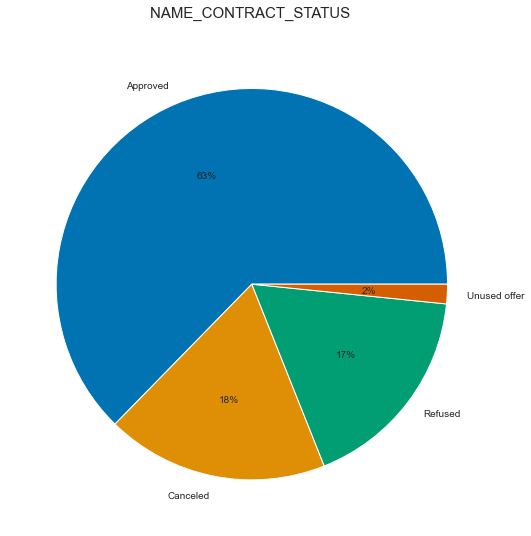

In [284]:
# Pie Chart for NAME_CONTRACT_STATUS. 
pietest = all_app['NAME_CONTRACT_STATUS'].value_counts()

pie1 = pd.DataFrame({'labels':pietest.index, 'values':pietest.values})

plt.figure(figsize=[20,9])
plt.pie(pietest, labels=pietest.index,autopct='%1.0f%%')

plt.title("NAME_CONTRACT_STATUS \n ", fontsize = 15)
plt.show()

- About 63% of contracts i.e. credit application was approved by the company.
- While 17% of application was rejected or refused as they didn't meet specific criteria decided by company.

In [285]:
# Univariate Analysis of Numerical Variables

def plot_num_num(var_1, var_2):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,5])

# Distribution plot for Variable  for all_app df.
    plt.subplot(1,2,1)

    sns.distplot(all_app[var_1], color='Purple', kde=True, bins=6)
    

# Labelling
    plt.title(f'Distribution plot for {var_1} \n', fontsize=15, fontweight=3)
    plt.xlabel(var_1, fontsize = 15, fontweight=1.5)
    plt.xticks(rotation=90, fontsize = 10)
    
# Box plot for Variable  for Clients with "Payment difficulties"
    plt.subplot(1,2,2)

    sns.distplot(all_app[var_2], color='Purple', kde=True, bins=6)
  
  
# Labelling
    plt.title(f'Distribution plot for {var_2} \n', fontsize=15, fontweight=3)
    plt.xlabel(var_2, fontsize = 15, fontweight=1.5)
    plt.yticks(size = 15)
    plt.xticks(rotation=90, fontsize = 10)



    plt.show()

- #### Analysing `"AMT_ANNUITY"` variable

  AMT_ANNUITY :- Annuity of previous application.

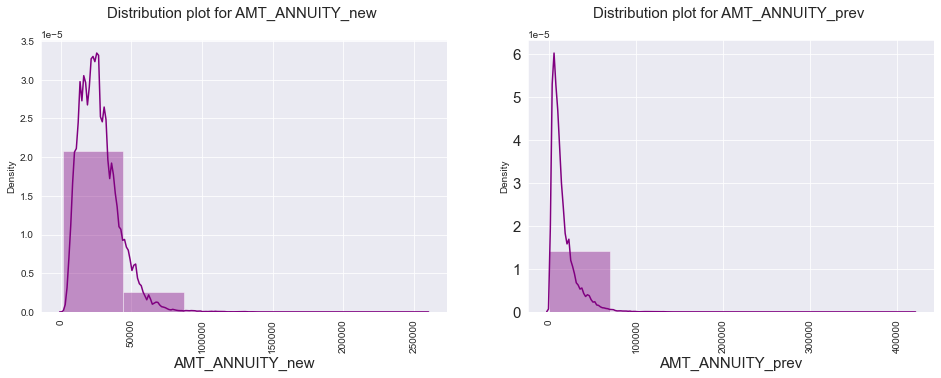

In [286]:
plot_num_num("AMT_ANNUITY_new", "AMT_ANNUITY_prev")

- Maximum number of clients are paying annuity below 50000 in new application as compared to previous. 
- Also, number of clients decline as annuity increases in both the new and previous applications.

- #### Analysing `"AMT_CREDIT"` variable

  AMT_CREDIT :- Credit amount of the loan.

In [287]:
# Analyse
all_app.AMT_CREDIT_new.value_counts().sort_values(ascending=False)

450000     45113
225000     38971
675000     37485
270000     28028
900000     26742
           ...  
1356988        1
2169000        1
673632         1
1039315        1
2140227        1
Name: AMT_CREDIT_new, Length: 5603, dtype: int64

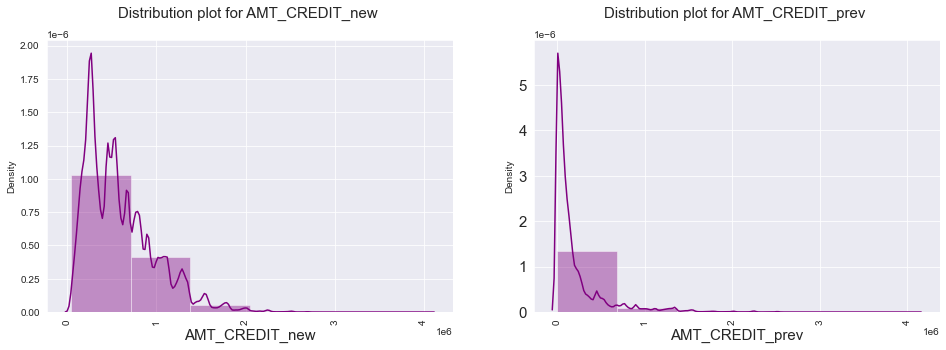

In [288]:
plot_num_num("AMT_CREDIT_new", "AMT_CREDIT_prev")

- As the credit amount of loan increases the number of clients decreases.


- #### Analysing `"AMT_GOODS_PRICE"` variable

  AMT_GOODS_PRICE :- For consumer loans it is the price of the goods for which the loan is given.

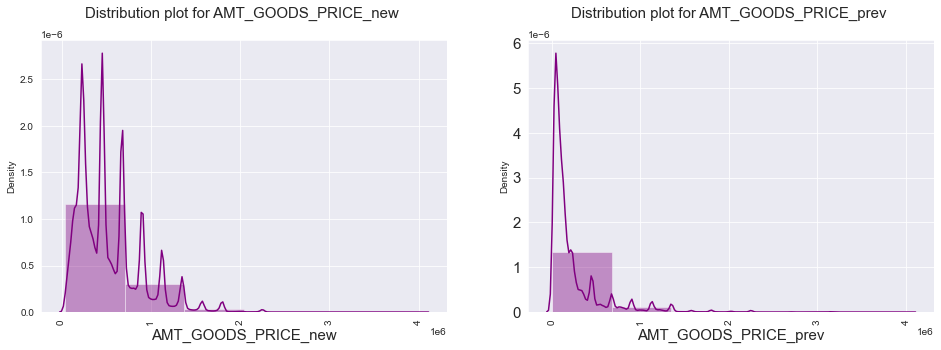

In [289]:
plot_num_num("AMT_GOODS_PRICE_new", "AMT_GOODS_PRICE_prev")

- Most of the client's product's price ranges between 1.5 to 2.5 lacs.

- ### Subtask 7.6.2: Univariate Analysis of Categorical Variables

Univariate Analysis of Categorical Variables using `all_app` dataframe.

In [290]:
#For Plots of Univariate Categorical with percentage.

def uni_cat(plots, ylog = False,label_rot = False,h_layout = True):
    temp_count = all_app[plots].value_counts()
    temp_df = pd.DataFrame({plots: temp_count.index, 'No. of contracts': temp_count })
    
    
#for percentage calculation
    calc_perc = all_app[[plots, 'TARGET']].groupby([plots],as_index= False).mean()
    calc_perc['TARGET'] = calc_perc['TARGET']*100
    calc_perc.sort_values(by ='TARGET',inplace = True)   
    
    
#commands for horizontal and vertical layout
    if(h_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,12))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,12))

#PLOTS
    plot1 = sns.countplot(ax = ax1 , x = plots, data=all_app, hue='TARGET', order = calc_perc[plots])

    #Changing Titles and Legends
    ax1.set_title(plots, fontdict={'fontsize' : 10, 'fontweight' : 3})
    ax1.legend(['Non-Defaulter', 'Defaulter'])
    
    
    #Rotation of labels
    if (label_rot):
        plot1.set_xticklabels(plot1.get_xticklabels(), rotation =90)

   
    #For LOG Scale - To improve readability in some cases
    
    if(ylog):
        ax1.set_yscale('log')
    #changing y label accordingly
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3})
    
#PLOTS (% of defaulters)
    plot1 = sns.barplot(ax = ax2, x=plots ,y='TARGET', order = calc_perc[plots] , data = calc_perc)
    
 
    #Rotation of labels
    if (label_rot):
        plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 90)

  
    
    #Labels and Title
    plt.ylabel('Percentage of Defaulters', fontsize = 10)
    plt.title(str(plot1) + 'Defaulters % ' ,fontdict ={'fontsize' : 10, 'fontweight' : 5})
    
    ax2 = plt.title('Defaulter %',fontdict ={'fontsize' : 12, 'fontweight' : 5})
   
   
    
    plt.xticks(rotation = 90)
    
    plt.show()


- #### Analysing `"NAME_INCOME_TYPE"` variable

  NAME_INCOME_TYPE :- Clients income type.

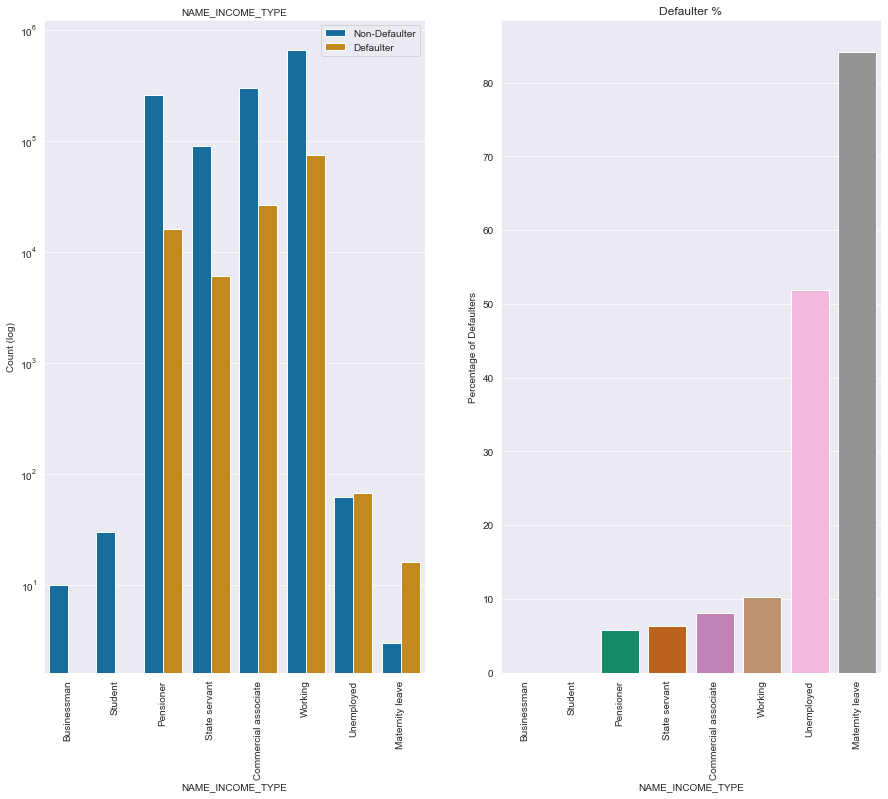

In [291]:
# Plot
uni_cat('NAME_INCOME_TYPE',True,True,True)

- The defaulter percent is high in maternity leave and unemployed category.
- While the count of non-defaulters is high in working income type. Followed by commercials and pensioners.

- #### Analysing `"PRODUCT_COMBINATION"` variable

  PRODUCT_COMBINATION :- Detailed product combination.

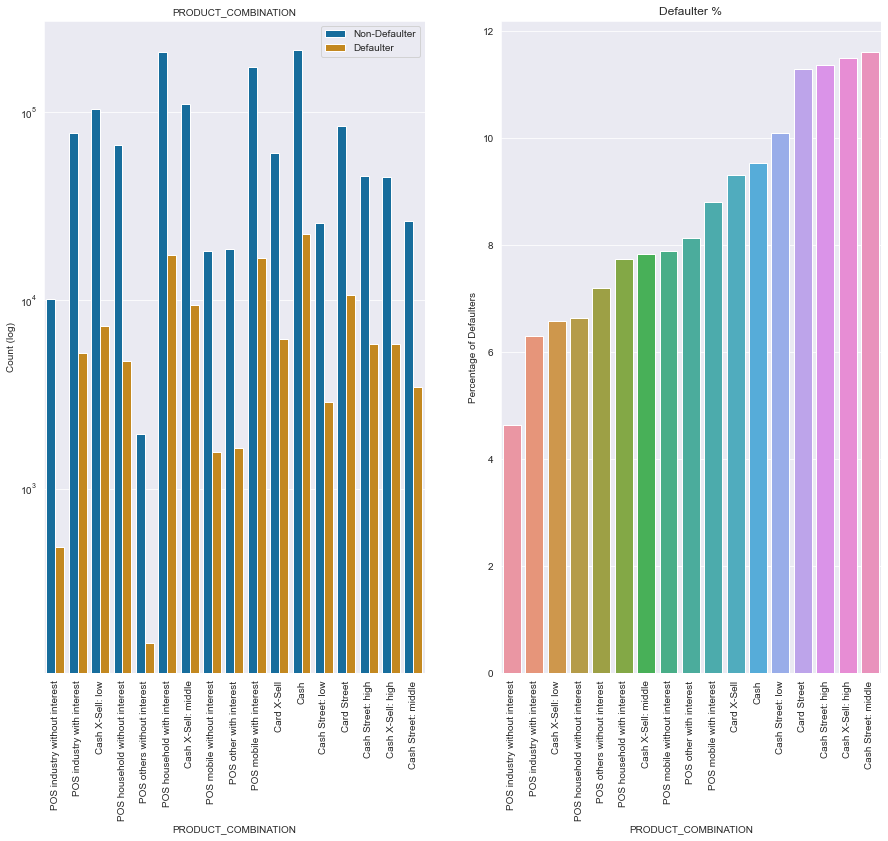

In [292]:
# PLot
uni_cat('PRODUCT_COMBINATION',True,True)

- In product combinations category, Card Street,Cash Street(high & mid), Cash x-sell are all high risk products with high default percentage.

- #### Analysing `"NAME_EDUCATION_TYPE"` variable

  NAME_EDUCATION_TYPE :- Level of highest education.

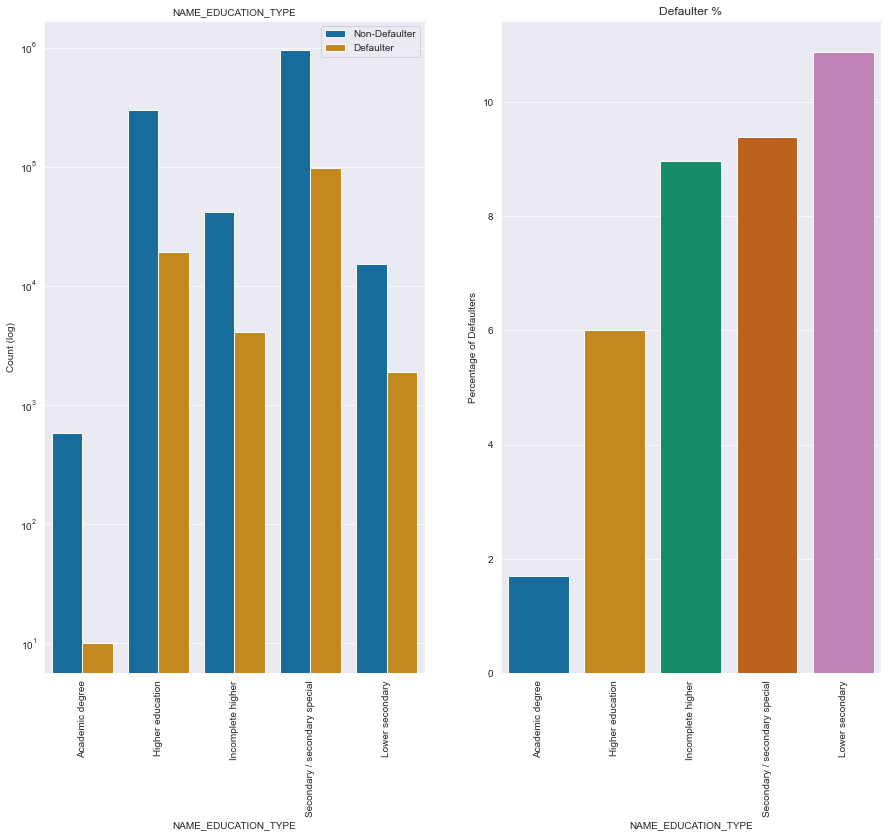

In [293]:
# Plot
uni_cat('NAME_EDUCATION_TYPE',True ,True)

- Clients having Lower Secondary education have the highest percentage of default followed by secondary education.
- Hence, education is an important factor while approving loans as academic degree holder clients have quite low % of defaults.

- #### Analysing `"NAME_CLIENT_TYPE"` variable

  NAME_CLIENT_TYPE :- Was the client old or new client when applying.

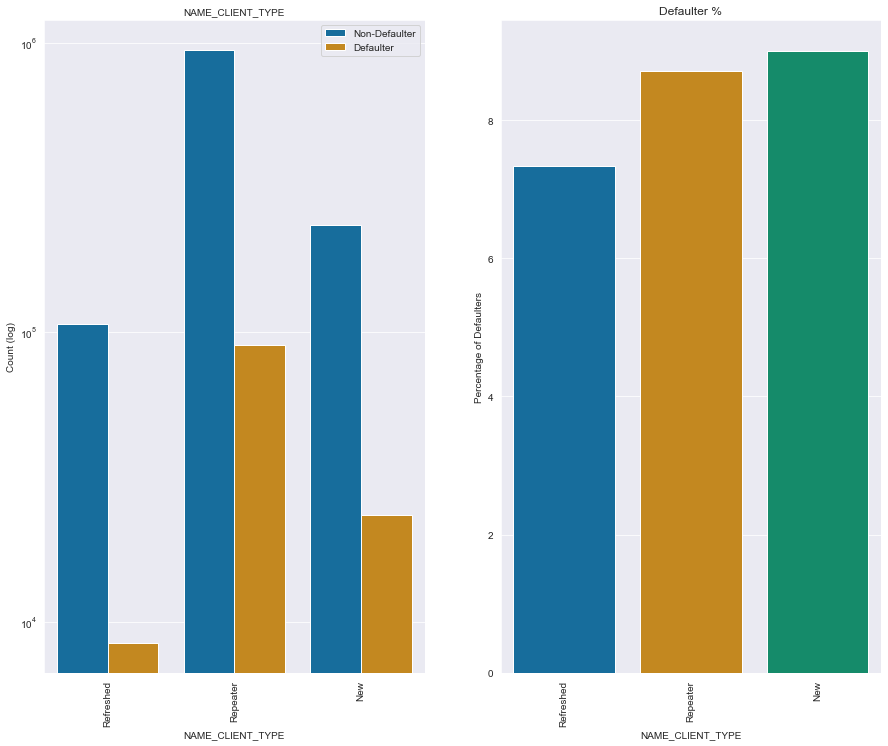

In [294]:
# Plot
uni_cat('NAME_CLIENT_TYPE',True ,True)

- New clients tend to default more but repeater clients too have high percenatge of defaulters.
- Repeater clients have the highest count as compared with new and refreshed clients.

- #### Analysing `"NAME_PORTFOLIO"` variable

  NAME_PORTFOLIO :- Was the previous application for CASH, POS.

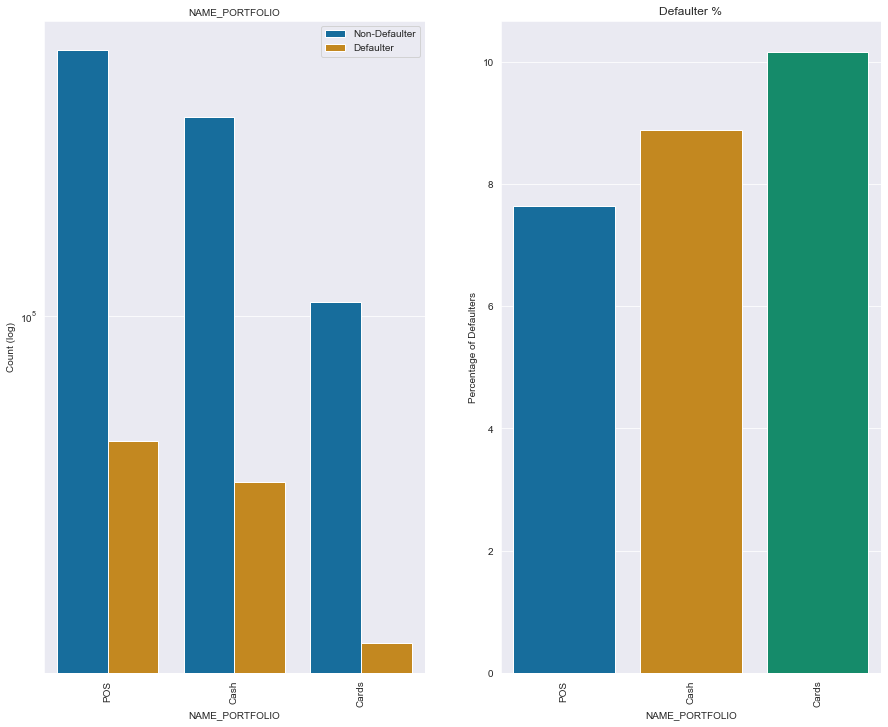

In [295]:
# Plot
uni_cat('NAME_PORTFOLIO',True ,True)

- Clients who apply for cards loan have the highest percentage of defaults followed by cash.
- For non-defaulter clients, applying for POS has the highest count.

- #### Analysing `"NAME_PRODUCT_TYPE"` variable

  NAME_PRODUCT_TYPE :-The previous application was x-sell o walk-in.

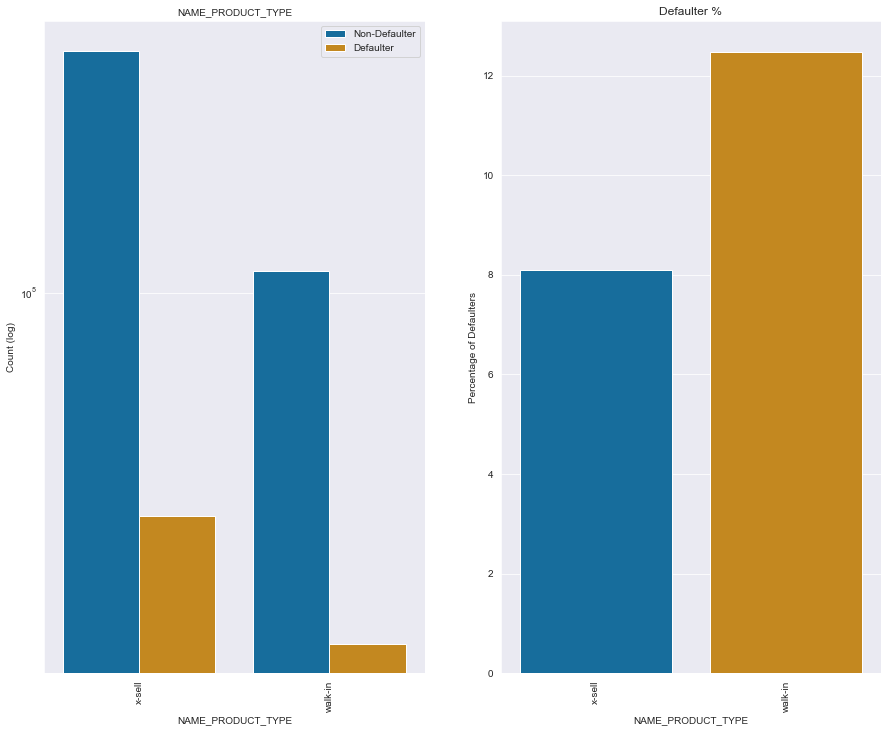

In [296]:
# Plot
uni_cat('NAME_PRODUCT_TYPE',True ,True)

- Walk-in category of product have the highest percenatge of defaulters.
- In non-defaulters, clients with x-sell have high count than walk-in product type.

- #### Analysing `"NAME_CONTRACT_STATUS"` variable

  NAME_CONTRACT_STATUS :- Contract status of previous application i.e. (approved, cancelled, ...).

In [297]:
# Analyse NAME_CONTRACT_STATUS.
all_app.NAME_CONTRACT_STATUS.value_counts()

Approved        885835
Canceled        259401
Refused         245259
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

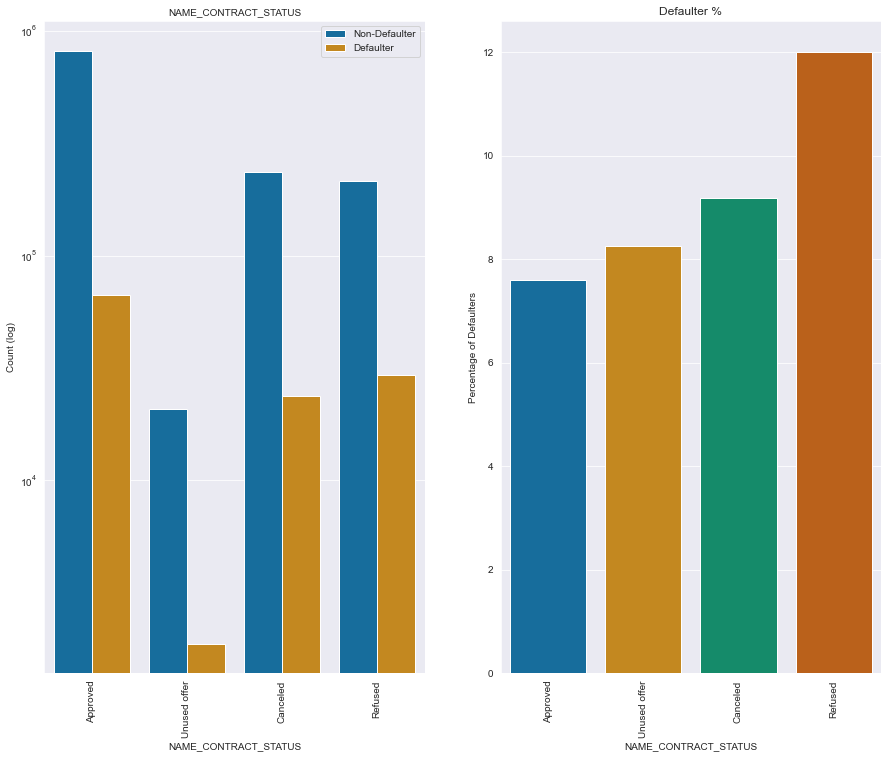

In [298]:
# Plot
uni_cat('NAME_CONTRACT_STATUS', True, True)

- #### Analysing `"CODE_GENDER"` variable

  CODE_GENDER :- Gender of  client

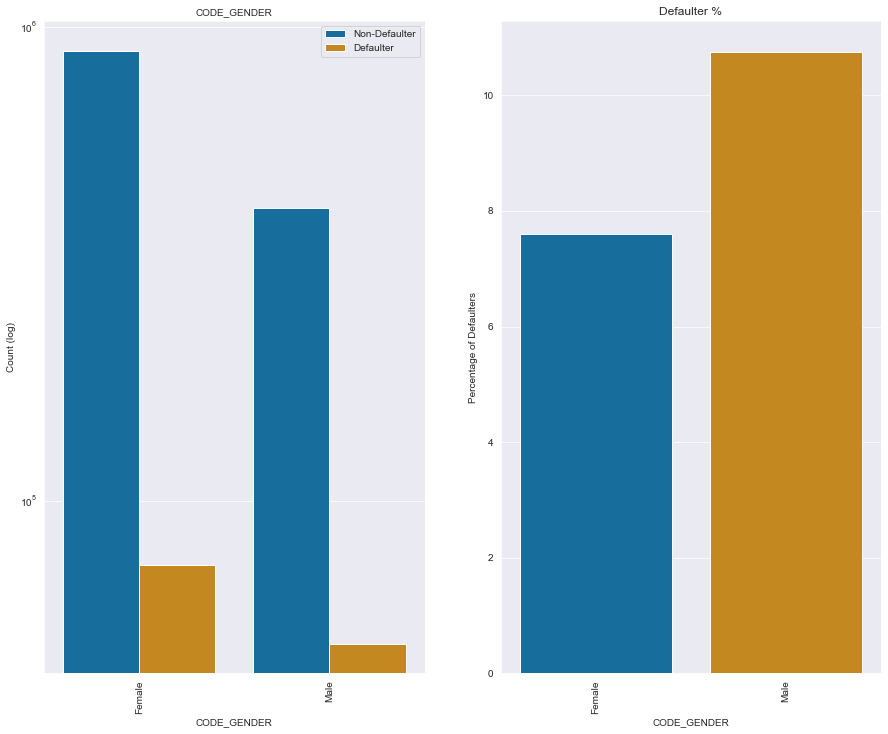

In [299]:
# PLot
uni_cat('CODE_GENDER', True, True)

- Males have defaulted more than females, despite of there being more female clients.

- #### Analysing `"OCCUPATION_TYPE"` variable

  OCCUPATION_TYPE :- kind of occupation does the client have.

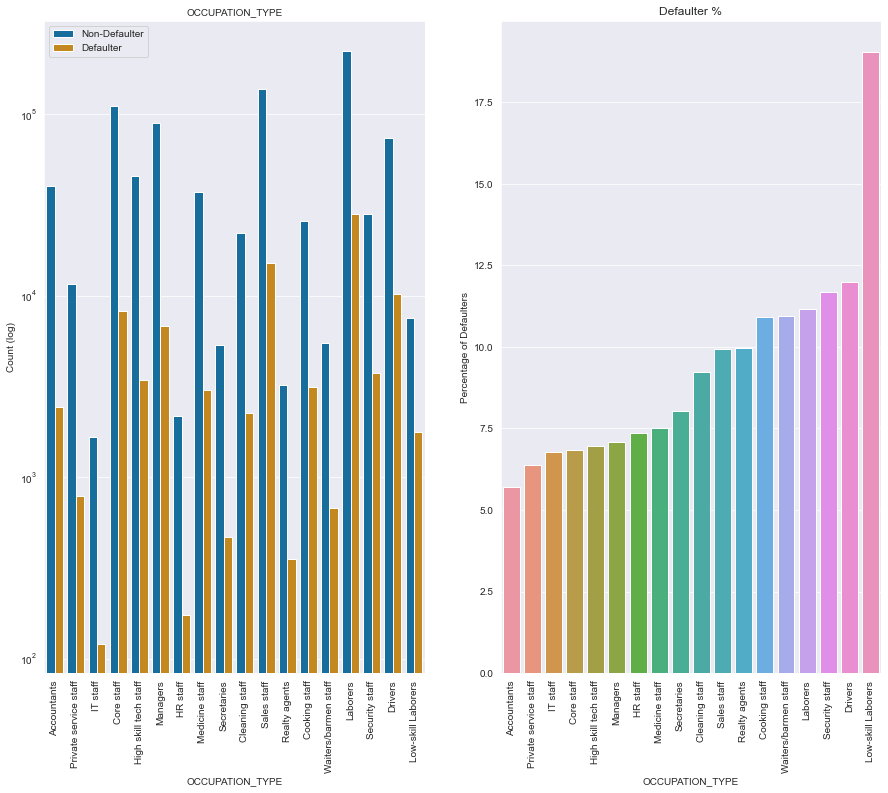

In [300]:
# PLot
uni_cat("OCCUPATION_TYPE", True, True)

- Low skill laborers are by far the biggest defaulters, followed by Drivers and Security staff.
- Although, there are many clients as labourers as non-defaulters.

- #### Analysing `"NAME_YIELD_GROUP"` variable

  NAME_YIELD_GROUP :- Grouped interest rate into small medium and high of the previous application.

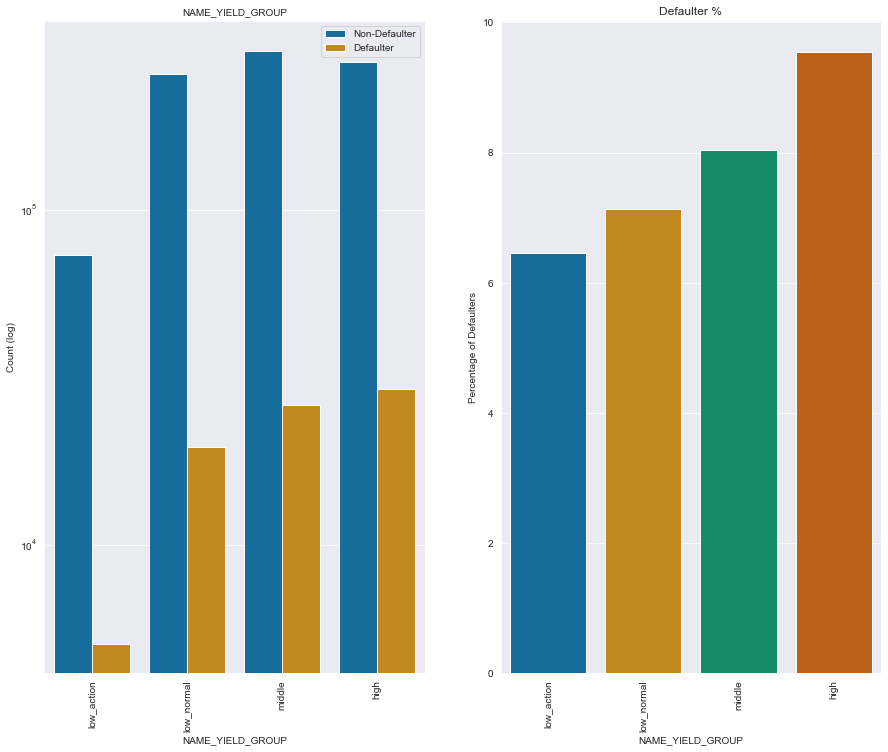

In [301]:
# PLot
uni_cat('NAME_YIELD_GROUP', True, True)

- High yield group has the highest percenatge of defaults where as low_action group has lowest among them.
- ALso, there are many clients who pay on time with high yield.

- #### Analysing `"NAME_GOODS_CATEGORY"` variable

  NAME_GOODS_CATEGORY :- kind of goods did the client apply

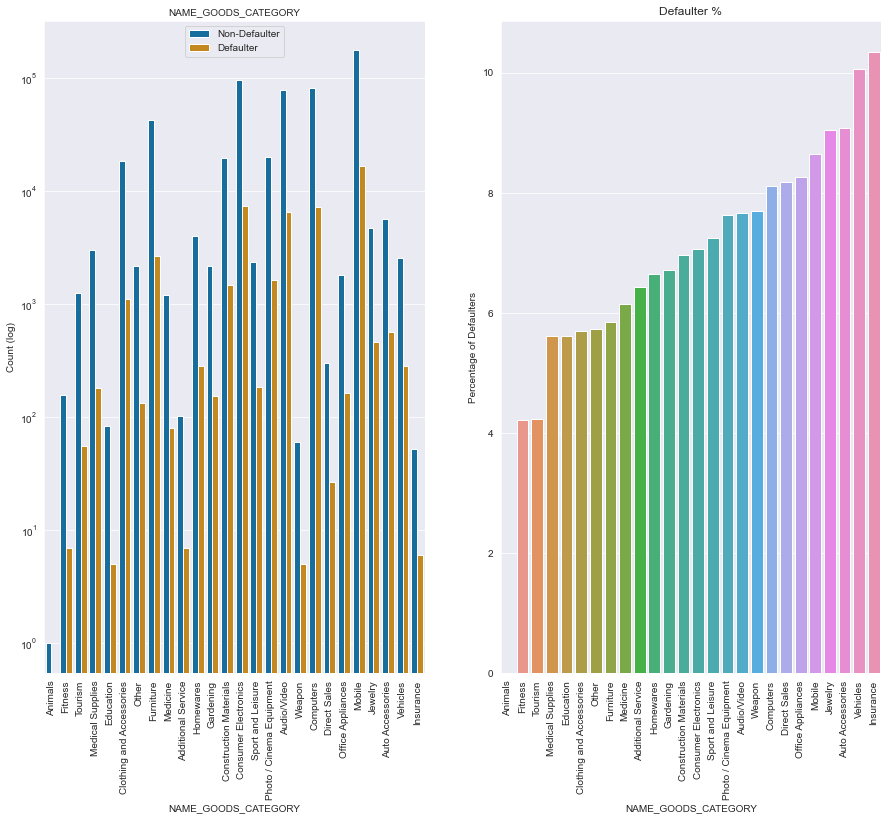

In [302]:
# PLot
uni_cat('NAME_GOODS_CATEGORY', True, True)

- The most defaulters are found in categories of Insurance and Vehicles.

- ### Subtask 7.6.3: Bivariate Analysis of Categorical Variables

Bivariate Analysis  of Categorical Variables using `all_app` , `all_app_0` and `all_app_1` dataframes.

In [303]:
# Bivariate Analysis of Categorical Variables.

def bi_merged(col,df,hue,ylog, figsize):
    plt.figure(figsize = figsize)
    
    #format  x--> data-->hue-->order
    ax = sns.countplot(x = col, data=df ,hue = hue,order = df[col].value_counts().index)
    
    #if Ylog is needed
    if(ylog==True):
        plt.yscale('log')    
    #changing y label accordingly
    plt.ylabel("Count (log)", fontdict ={'fontsize' : 10, 'fontweight' : 3}) 
    
    #TITLE
    
    plt.title(f'Count Plot for {col} {" "} vs {" "}  {hue} \n', fontsize=15, fontweight=3)
    
    #plt.title(col,fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.xticks(rotation = 90)
    
    plt.show()

- ##### NAME_CONTRACT_STATUS vs TARGET

  NAME_CONTRACT_STATUS :- Contract status of previous application (approved, cancelled, ...).
  
  TARGET :- Target variable (1 - client with payment difficulties, 0 - client with no payment difficulties).
  
  

In [304]:
# Grouping the TARGET and NAME_CONTRACT_STATUS variables using all_app dataframe.

group_cont = all_app.groupby("NAME_CONTRACT_STATUS")["TARGET"]

# Concantenation.
temp_group = pd.concat([group_cont.value_counts(),round(group_cont.value_counts(normalize=True)*(100),2)],axis=1, keys=('Counts','Percentage'))
temp_group['Percentage'] = temp_group['Percentage'].astype(str) +"%"

# Display
temp_group

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818606     92.41%
                     1        67229      7.59%
Canceled             0       235604     90.83%
                     1        23797      9.17%
Refused              0       215825      88.0%
                     1        29434      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

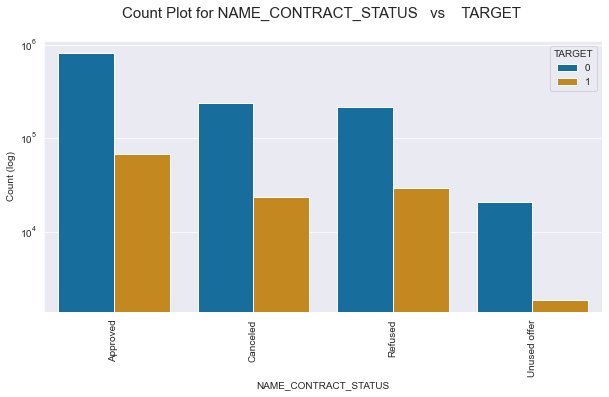

In [305]:
# Contracts by Target

bi_merged('NAME_CONTRACT_STATUS',all_app,'TARGET',True,(10,5))

- We can observe that, the company has approved those clients who can repay the credit amount on time.

- ##### NAME_CONTRACT_STATUS vs NAME_CONTRACT_TYPE_new

  NAME_CONTRACT_STATUS :- Contract status of previous application (approved, cancelled, ...).
  
  NAME_CONTRACT_TYPE_new :- Identification if the loan is cash or revolving.
  
  

In [306]:
# Grouping the NAME_CONTRACT_STATUS and NAME_CONTRACT_TYPE_prev variables using all_app dataframe.

group2 = all_app.groupby("NAME_CONTRACT_STATUS")["NAME_CONTRACT_TYPE_new"]

# Concantenation.
temp_group = pd.concat([group2.value_counts(),round(group2.value_counts(normalize=True)*(100),2)],axis=1, keys=('Counts','Percentage'))
temp_group['Percentage'] = temp_group['Percentage'].astype(str) +"%"

# Display
temp_group

Counts Percentage
NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE_new                   
Approved             Cash loans              816336     92.15%
                     Revolving loans          69499      7.85%
Canceled             Cash loans              241519     93.11%
                     Revolving loans          17882      6.89%
Refused              Cash loans              228251     93.07%
                     Revolving loans          17008      6.93%
Unused offer         Cash loans               20641     90.65%
                     Revolving loans           2130      9.35%

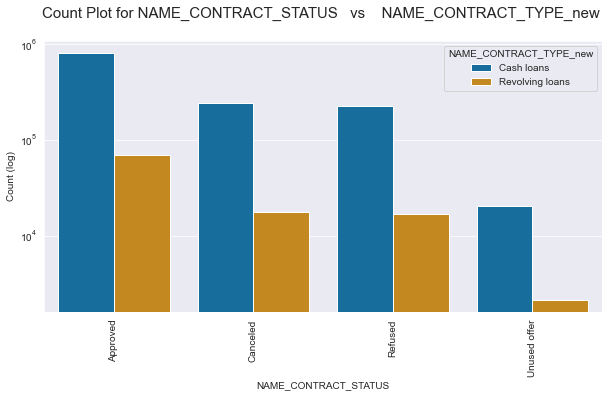

In [307]:
# Plot
bi_merged('NAME_CONTRACT_STATUS',all_app,'NAME_CONTRACT_TYPE_new',True,(10,5))

-  The count of approved cash loans is highest amongst all contract status.


- ##### NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE

  NAME_CONTRACT_STATUS :- Contract status of previous application (approved, cancelled, ...).
  
  NAME_EDUCATION_TYPE :- Level of highest education.
  
  

In [308]:
# Grouping the NAME_CONTRACT_STATUS and NAME_EDUCATION_TYPE variables using all_app dataframe.

group3 = all_app.groupby("NAME_CONTRACT_STATUS")["NAME_EDUCATION_TYPE"]

# Concantenation.
temp_group = pd.concat([group3.value_counts(),round(group3.value_counts(normalize=True)*(100),2)],axis=1, keys=('Counts','Percentage'))
temp_group['Percentage'] = temp_group['Percentage'].astype(str) +"%"

# Display
temp_group

Counts Percentage
NAME_CONTRACT_STATUS NAME_EDUCATION_TYPE                             
Approved             Secondary / secondary special  651878     73.59%
                     Higher education               194951     22.01%
                     Incomplete higher               27665      3.12%
                     Lower secondary                 10923      1.23%
                     Academic degree                   418      0.05%
Canceled             Secondary / secondary special  191260     73.73%
                     Higher education                57067      22.0%
                     Incomplete higher                7911      3.05%
                     Lower secondary                  3099      1.19%
                     Academic degree                    64      0.02%
Refused              Secondary / secondary special  179564     73.21%
                     Higher education                54013     22.02%
                     Incomplete higher                8626      3.52%
                     Lower secondary                  2965      1.21%
                     Academic degree                    91      0.04%
Unused offer         Secondary / secondary special   14899     65.43%
                     Higher education                 6718      29.5%
                     Incomplete higher                 983      4.32%
                     Lower secondary                   165      0.72%
                     Academic degree                     6      0.03%

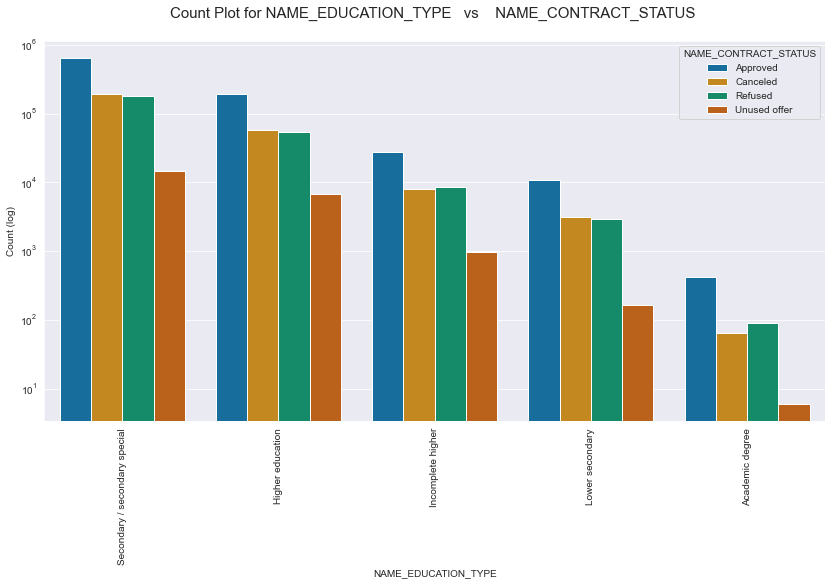

In [309]:
# Plot
bi_merged('NAME_EDUCATION_TYPE',all_app,'NAME_CONTRACT_STATUS',True,(14,7))
                                                                      

- Secondary education has the highest aproved status amongst all.
- While the lowest aprroved status is for academic degree holders

- ##### NAME_YIELD_GROUP vs NAME_EDUCATION_TYPE

  NAME_YIELD_GROUP :- Grouped interest rate into small medium and high .
  
 TARGET :- Target variable (1 - client with payment difficulties, 0 - client with no payment difficulties).
  
  

In [310]:
# Grouping the NAME_YIELD_GROUP and TARGET variables using all_app dataframe.

group4 = all_app.groupby("NAME_YIELD_GROUP")["TARGET"]

# Concatenation.
temp_group = pd.concat([group4.value_counts(),round(group4.value_counts(normalize=True)*(100),2)],axis=1, keys=('Counts','Percentage'))
temp_group['Percentage'] = temp_group['Percentage'].astype(str) +"%"

# Display
temp_group

Counts Percentage
NAME_YIELD_GROUP TARGET                   
high             0       276832     90.45%
                 1        29214      9.55%
low_action       0        73464     93.55%
                 1         5066      6.45%
low_normal       0       254967     92.87%
                 1        19588      7.13%
middle           0       298823     91.96%
                 1        26138      8.04%

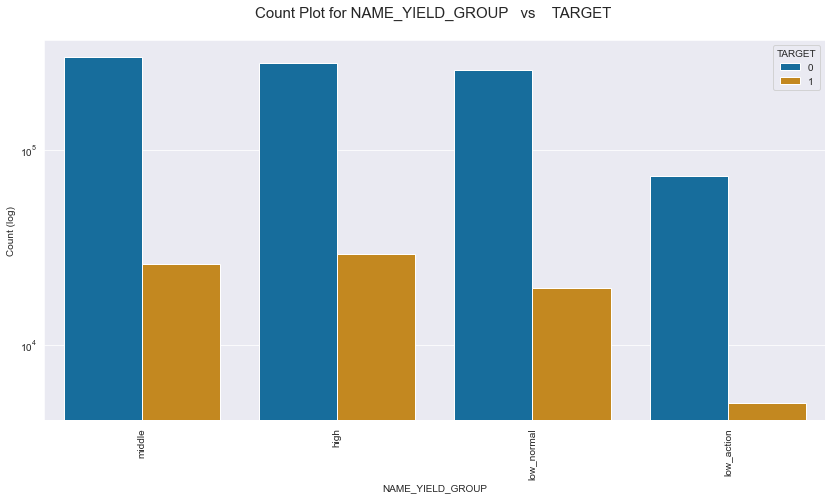

In [311]:
# Plot
bi_merged('NAME_YIELD_GROUP',all_app,'TARGET',True,(14,7))

- Majority of non-defaulters have beedn given yield group between low_normal, medium and high.

- ##### TARGET vs NAME_CASH_LOAN_PURPOSE 

  TARGET :- Target variable (1 - client with payment difficulties, 0 - client with no payment difficulties)
  
  NAME_CASH_LOAN_PURPOSE :- Purpose of the cash loan.
  
  

In [312]:
# Grouping the TARGET and NAME_CASH_LOAN_PURPOSE variables using all_app dataframe.


group5 = all_app.groupby("TARGET")["NAME_CASH_LOAN_PURPOSE"]

# Concantenation.
temp_group = pd.concat([group5.value_counts(),round(group5.value_counts(normalize=True)*(100),2)],axis=1, keys=('Counts','Percentage'))
temp_group['Percentage'] = temp_group['Percentage'].astype(str) +"%"

# Display
temp_group


Counts Percentage
TARGET NAME_CASH_LOAN_PURPOSE                             
0      Repairs                            17501     33.87%
       Other                              11759     22.76%
       Urgent needs                        6154     11.91%
       Buying a used car                   2151      4.16%
       Building a house or an annex        2020      3.91%
       Everyday expenses                   1836      3.55%
       Medicine                            1620      3.14%
       Payments on other loans             1321      2.56%
       Education                           1194      2.31%
       Journey                              930       1.8%
       Purchase of electronic equipment     817      1.58%
       Buying a new car                     806      1.56%
       Wedding / gift / holiday             707      1.37%
       Buying a home                        617      1.19%
       Furniture                            575      1.11%
       Car repairs                          564      1.09%
       Buying a holiday home / land         408      0.79%
       Business development                 313      0.61%
       Gasification / water supply          206       0.4%
       Buying a garage                      109      0.21%
       Hobby                                 36      0.07%
       Money for a third person              19      0.04%
       Refusal to name the goal              10      0.02%
1      Repairs                             2616      33.8%
       Other                               1673     21.62%
       Urgent needs                        1082     13.98%
       Building a house or an annex         324      4.19%
       Buying a used car                    318      4.11%
       Payments on other loans              252      3.26%
       Medicine                             251      3.24%
       Everyday expenses                    216      2.79%
       Education                            140      1.81%
       Car repairs                          127      1.64%
       Purchase of electronic equipment     117      1.51%
       Journey                              111      1.43%
       Wedding / gift / holiday              94      1.21%
       Furniture                             85       1.1%
       Buying a home                         84      1.09%
       Buying a new car                      80      1.03%
       Buying a holiday home / land          55      0.71%
       Business development                  46      0.59%
       Gasification / water supply           45      0.58%
       Hobby                                  9      0.12%
       Buying a garage                        7      0.09%
       Money for a third person               4      0.05%
       Refusal to name the goal               3      0.04%

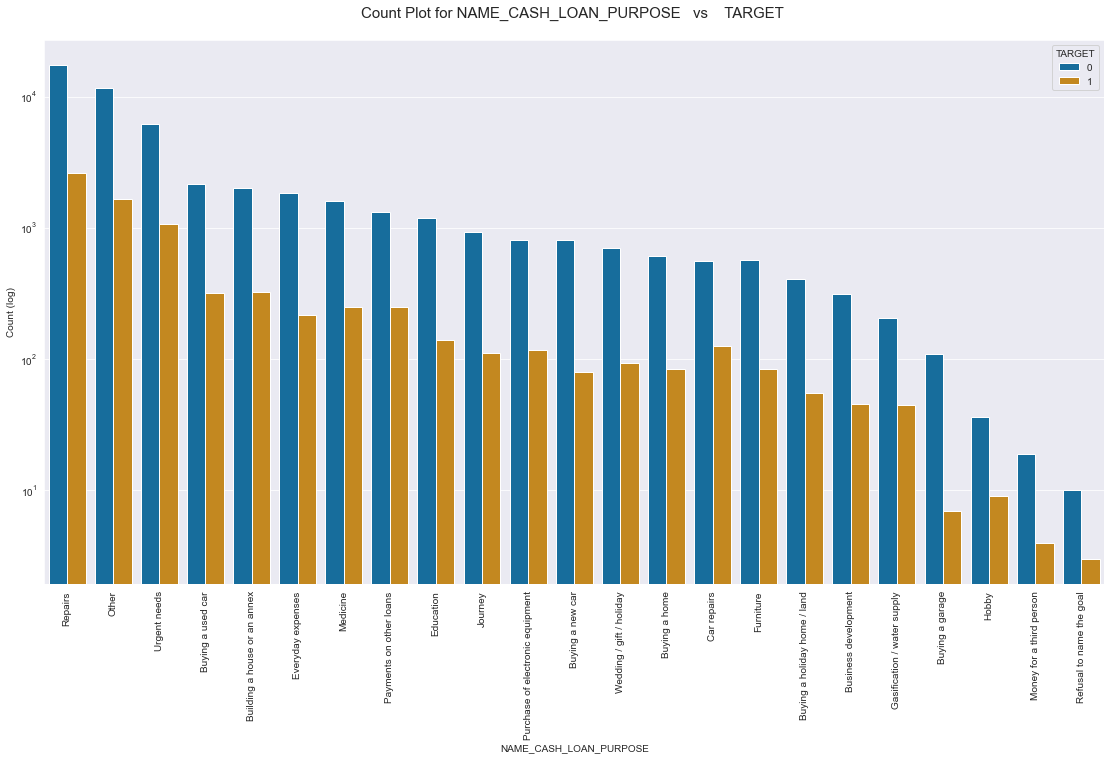

In [313]:
# Plot
bi_merged('NAME_CASH_LOAN_PURPOSE',all_app,'TARGET',True,(19,10))


- Loans that were taken for Repairs and Other have the maximum number of defaults.
- The company should do proper investigation before approving their loan application to avoid an increase in non-performing assets. 



- ##### NAME_CONTRACT_STATUS vs NAME_CASH_LOAN_PURPOSE 

  NAME_CONTRACT_STATUS :- Contract status of previous application.
  
  NAME_CASH_LOAN_PURPOSE :- Purpose of the cash loan.
  
  

In [314]:
# Grouping the NAME_CONTRACT_STATUS and NAME_CASH_LOAN_PURPOSE variables using all_app dataframe.

group6 = all_app.groupby("NAME_CONTRACT_STATUS")["NAME_CASH_LOAN_PURPOSE"]

# Concantenation
temp_group = pd.concat([group6.value_counts(),round(group6.value_counts(normalize=True)*(100),2)],axis=1, keys=('Counts','Percentage'))
temp_group['Percentage'] = temp_group['Percentage'].astype(str) +"%"

# Display
temp_group


Counts Percentage
NAME_CONTRACT_STATUS NAME_CASH_LOAN_PURPOSE                             
Approved             Repairs                             7377     31.97%
                     Other                               5744     24.89%
                     Urgent needs                        3105     13.46%
                     Everyday expenses                   1056      4.58%
                     Medicine                             890      3.86%
                     Buying a used car                    745      3.23%
                     Education                            647       2.8%
                     Building a house or an annex         594      2.57%
                     Purchase of electronic equipment     517      2.24%
                     Journey                              474      2.05%
                     Wedding / gift / holiday             337      1.46%
                     Car repairs                          302      1.31%
                     Furniture                            290      1.26%
                     Payments on other loans              251      1.09%
                     Buying a new car                     195      0.85%
                     Buying a home                        166      0.72%
                     Buying a holiday home / land         115       0.5%
                     Business development                 109      0.47%
                     Gasification / water supply          100      0.43%
                     Buying a garage                       31      0.13%
                     Hobby                                 16      0.07%
                     Money for a third person              11      0.05%
                     Refusal to name the goal               3      0.01%
Canceled             Repairs                              527      38.5%
                     Other                                246     17.97%
                     Urgent needs                         115       8.4%
                     Building a house or an annex          86      6.28%
                     Buying a used car                     82      5.99%
                     Payments on other loans               64      4.67%
                     Buying a new car                      44      3.21%
                     Buying a home                         31      2.26%
                     Medicine                              27      1.97%
                     Education                             19      1.39%
                     Furniture                             19      1.39%
                     Wedding / gift / holiday              18      1.31%
                     Journey                               16      1.17%
                     Buying a holiday home / land          15       1.1%
                     Car repairs                           15       1.1%
                     Business development                  14      1.02%
                     Everyday expenses                     13      0.95%
                     Buying a garage                        7      0.51%
                     Purchase of electronic equipment       7      0.51%
                     Gasification / water supply            4      0.29%
Refused              Repairs                            12176      35.0%
                     Other                               7354     21.14%
                     Urgent needs                        4016     11.55%
                     Building a house or an annex        1664      4.78%
                     Buying a used car                   1630      4.69%
                     Payments on other loans             1255      3.61%
                     Everyday expenses                    963      2.77%
                     Medicine                             950      2.73%
                     Education                            663      1.91%
                     Buying a new car                     641      1.84%
                     Journey            

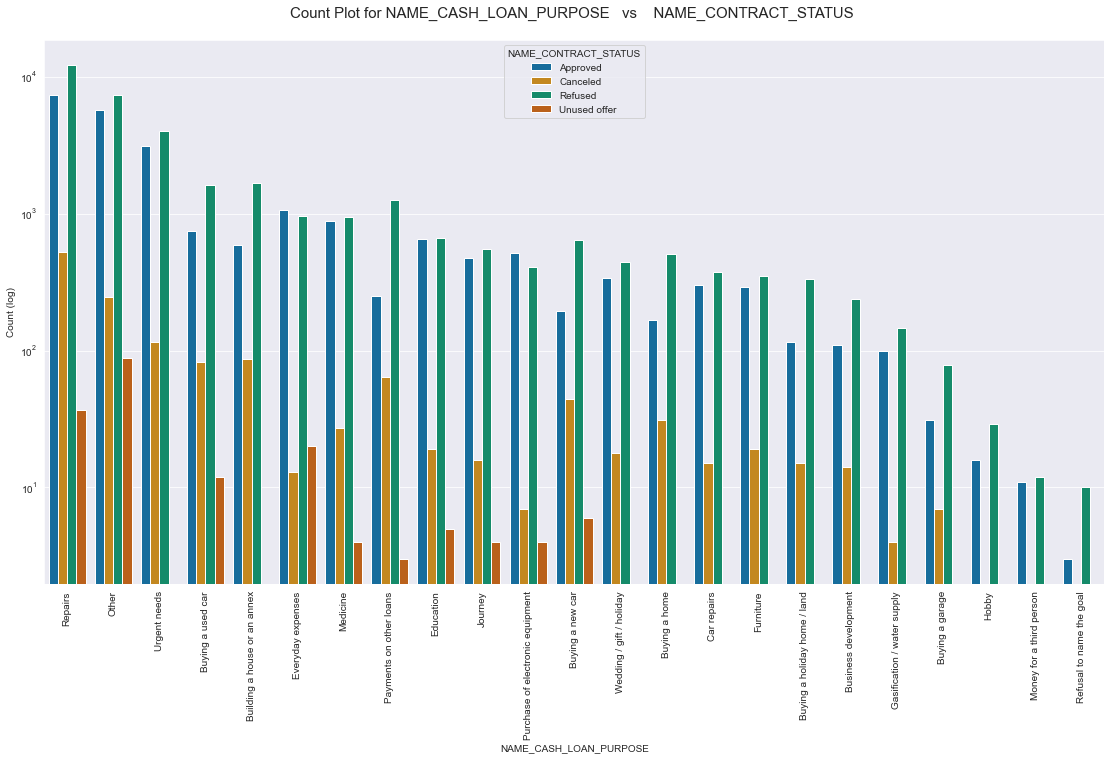

In [315]:
# Plot
bi_merged('NAME_CASH_LOAN_PURPOSE',all_app,'NAME_CONTRACT_STATUS',True,(19,10))


- Loans that were taken for Repairs and Other have high refusals and rejections by both clients and the company.


- ##### INCOME_RANGE vs NAME_CONTRACT_STATUS 

  INCOME_RANGE :- Clients income.
  
  NAME_CONTRACT_STATUS :- Contract status of previous application (approved, cancelled, ...) 
  
  

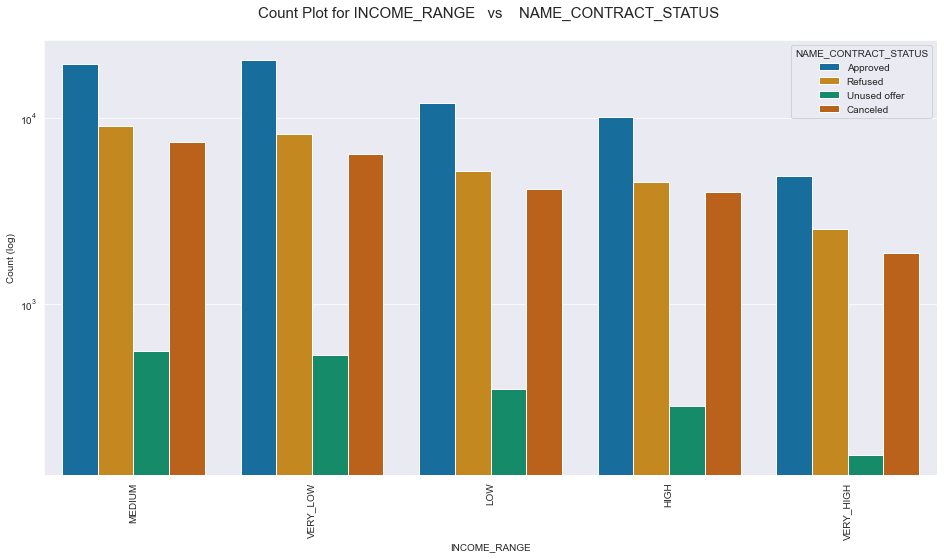

In [316]:
# Plot
bi_merged('INCOME_RANGE',all_app_1,'NAME_CONTRACT_STATUS',True,(16,8))

- The medium and very_low income group have maximum number of approvals amongst all income group.

- ##### NAME_CLIENT_TYPE vs INCOME_RANGE

  NAME_CLIENT_TYPE :- Was the client old or new client when applying.
  
  INCOME_RANGE :- Clients income.
  
  

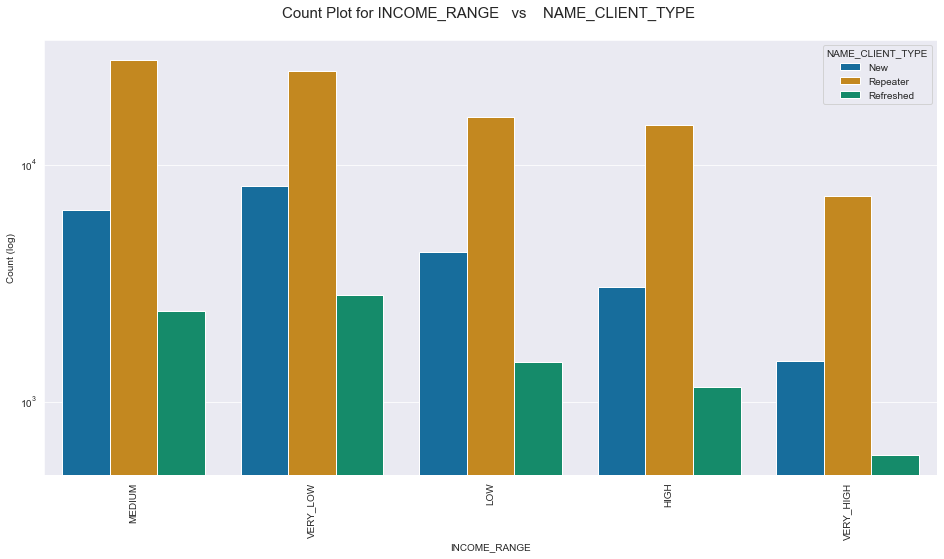

In [317]:
# Plot
bi_merged('INCOME_RANGE',all_app_1,'NAME_CLIENT_TYPE',True,(16,8))

- Maximum repeater clients are between very_low and medium income groups.

- ##### NAME_CLIENT_TYPE vs FLAG_OWN_REALTY

  NAME_CLIENT_TYPE :- Was the client old or new client when applying.
  
  FLAG_OWN_REALTY :-  Client owns a house or flat.
  
  

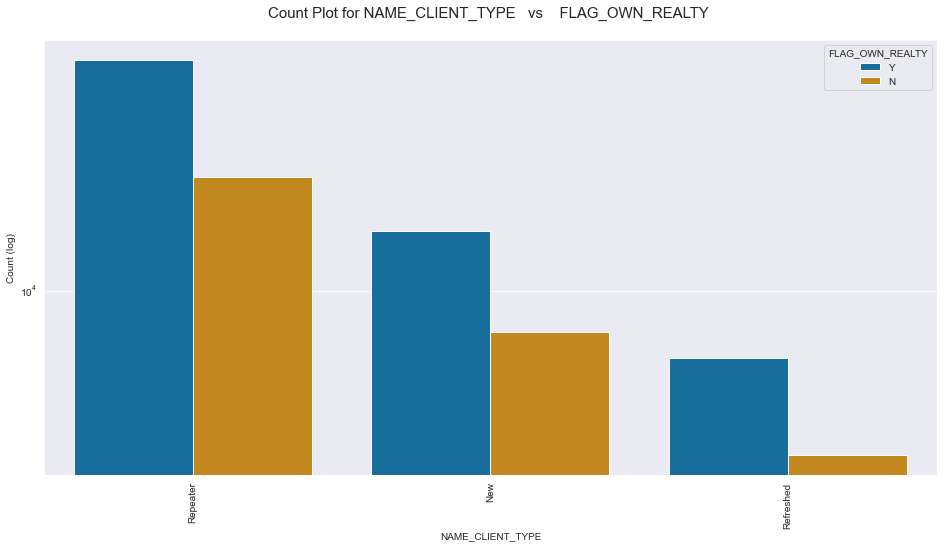

In [318]:
# Plot
bi_merged('NAME_CLIENT_TYPE',all_app_1,'FLAG_OWN_REALTY',True,(16,8))

- The repeater clients have owned a realty are the highest amongst all.
- While new clients also own realty.


- ##### NAME_CLIENT_TYPE vs OCCUPATION_TYPE

  NAME_CLIENT_TYPE :- Was the client old or new client when applying.
  
  OCCUPATION_TYPE :- The kind of occupation does the client have
  
  

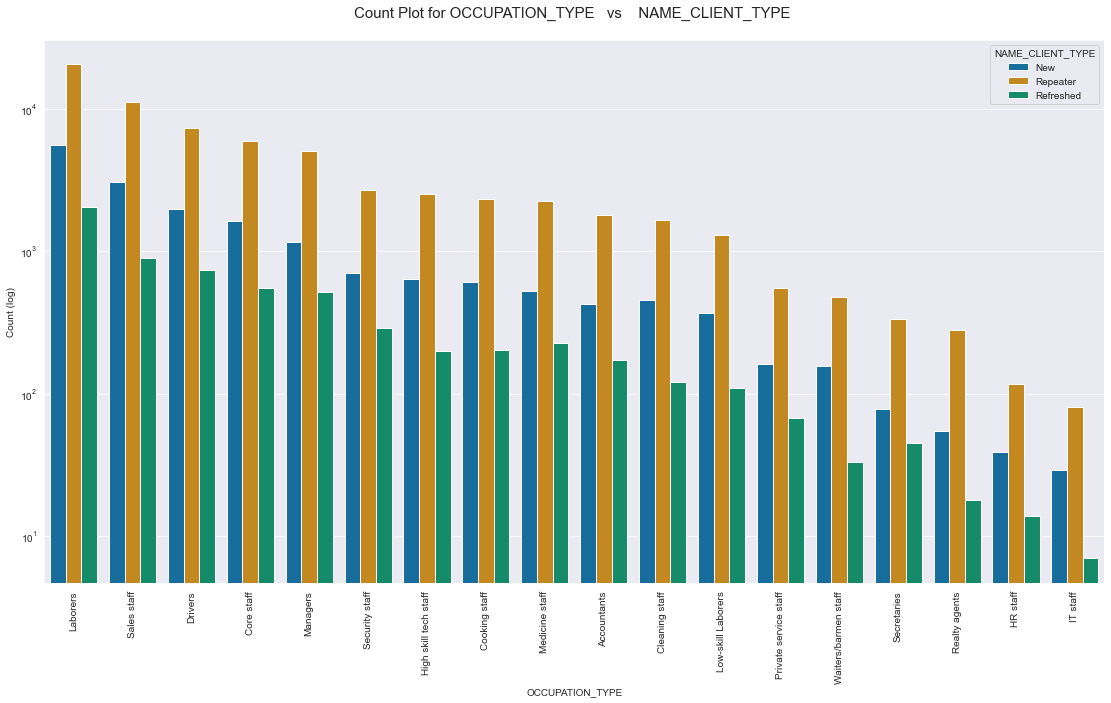

In [319]:
# Plot
bi_merged('OCCUPATION_TYPE',all_app_1,'NAME_CLIENT_TYPE',True,(19,10))

- The highest count is of repeater labourer group while lowest is of refreshed IT staff.

- ##### NAME_CONTRACT_STATUS vs OCCUPATION_TYPE

  NAME_CONTRACT_STATUS :- Contract status of previous application (approved, cancelled, ...).
  
  OCCUPATION_TYPE :- The kind of occupation does the client have.
  
  

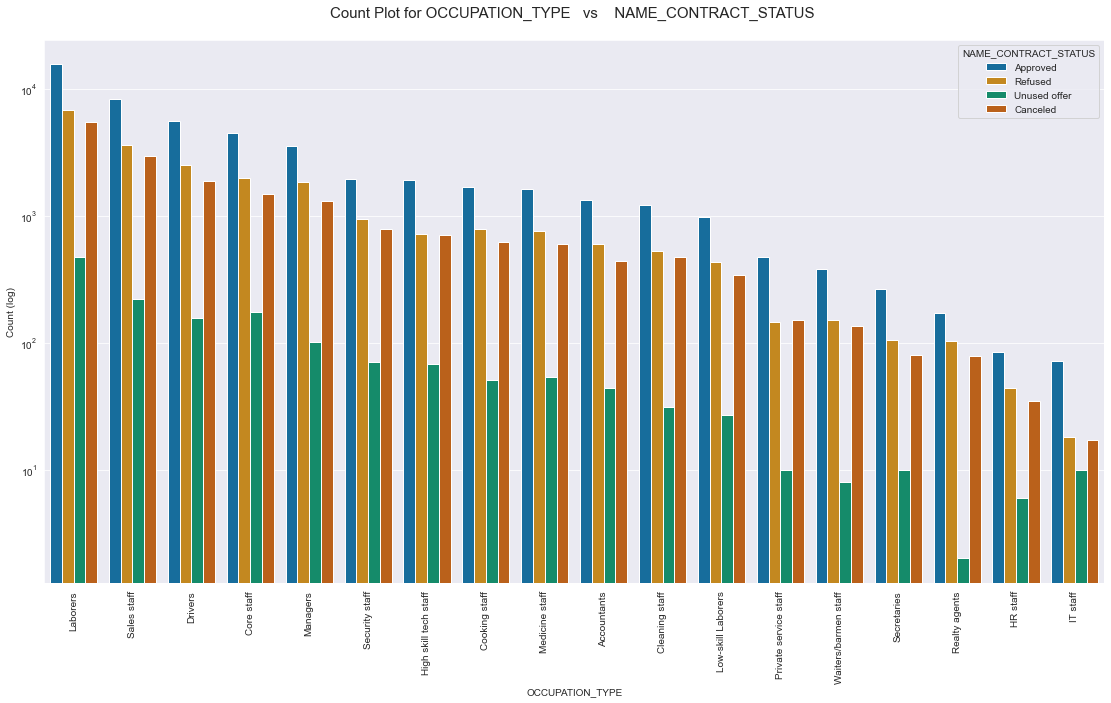

In [320]:
# Plot
bi_merged('OCCUPATION_TYPE',all_app_1,'NAME_CONTRACT_STATUS',True,(19,10))

- The highest count is of approved labourer group while lowest is of refused IT staff.

- ### Subtask 7.6.4: Multivariate Analysis Variables

Multivariate Analysis for `all_app`, `all_app_0` and `all_app_1`.

- ##### NAME_CLIENT_TYPE vs AMT_CREDIT_new vs NAME_CONTRACT_STATUS

  NAME_CLIENT_TYPE :- The client old or new client when applying for the previous application.
  
  AMT_CREDIT_new :- Credit amount of the loan given.
  
  NAME_CONTRACT_STATUS :- Contract status of previous application (approved, cancelled, ...).
  
  

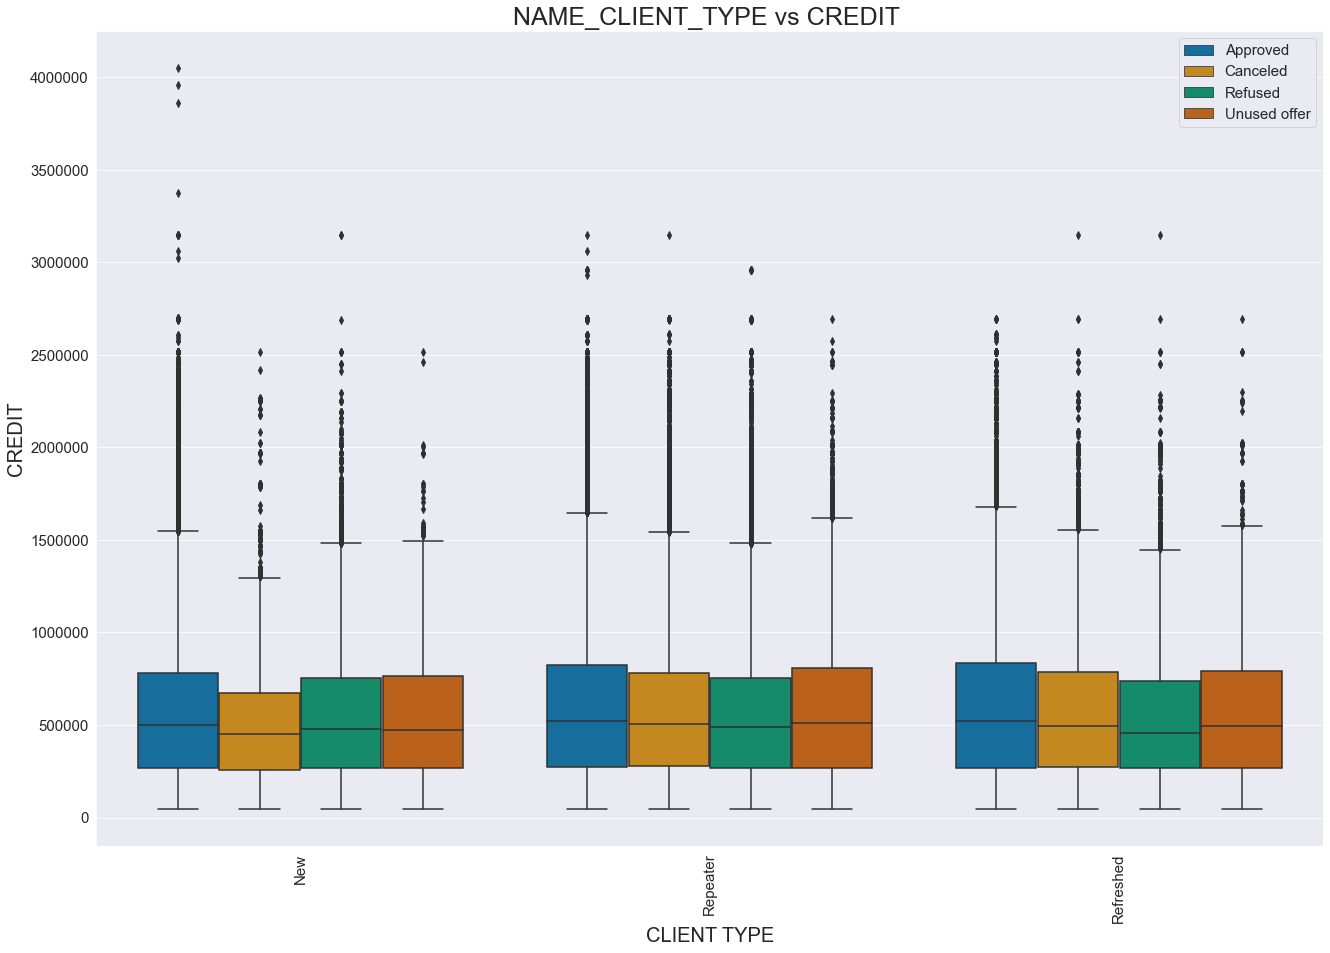

In [321]:
# Plot for NAME_CLIENT_TYPE vs AMT_CREDIT_new vs NAME_CONTRACT_STATUS 

plt.figure(figsize=(22,15))

ax2 = sns.boxplot(data =all_app, x='NAME_CLIENT_TYPE',y='AMT_CREDIT_new', hue ='NAME_CONTRACT_STATUS')
plt.title('NAME_CLIENT_TYPE vs CREDIT ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('CLIENT TYPE' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90, size = 15)



plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- The loan approved for repeater and refreshed clients have higher number of credits than new clients.
- The median is equal for repeater clients between those who have been given credit and for those credit was refused.

- ##### INCOME_RANGE vs OCCUPATION_TYPE vs NAME_CONTRACT_STATUS

  INCOME_RANGE  :- Clients income.
  
  AMT_CREDIT :- Credit amount of the loan given.
  
  NAME_CONTRACT_STATUS :-  Contract status of previous application (approved, cancelled, ...).

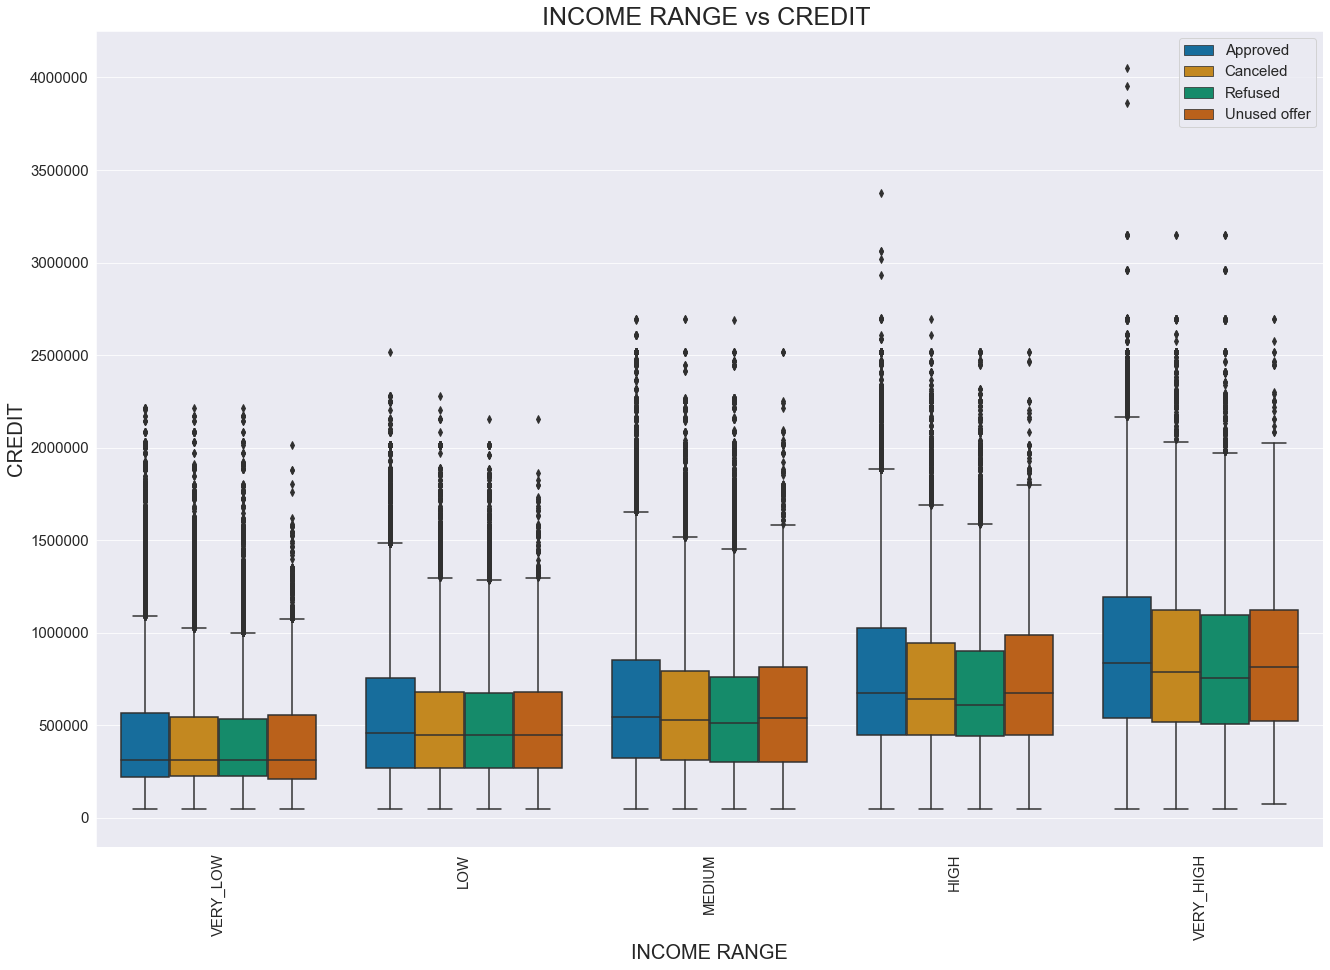

In [322]:
# Plot for INCOME_RANGE vs AMT_CREDIT vs NAME_CONTRACT_STATUS 

plt.figure(figsize=(22,15))

ax2 = sns.boxplot(data =all_app, x='INCOME_RANGE',y='AMT_CREDIT_new', hue ='NAME_CONTRACT_STATUS')
plt.title('INCOME RANGE vs CREDIT ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('INCOME RANGE' , fontsize = 20)
plt.ylabel('CREDIT' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90, size = 15)



plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- The clients having high and ver_high income range have beed approved much higher credit than others.
- Also, approved and refused credit median is equal for clients belonging to very_low and low income range.

- ##### INCOME_RANGE vs AGE vs NAME_CONTRACT_STATUS

  INCOME_RANGE :- Clients income.
  
  AGE :- Client's age. 
  
  NAME_CONTRACT_STATUS :-  Contract status of previous application (approved, cancelled, ...).

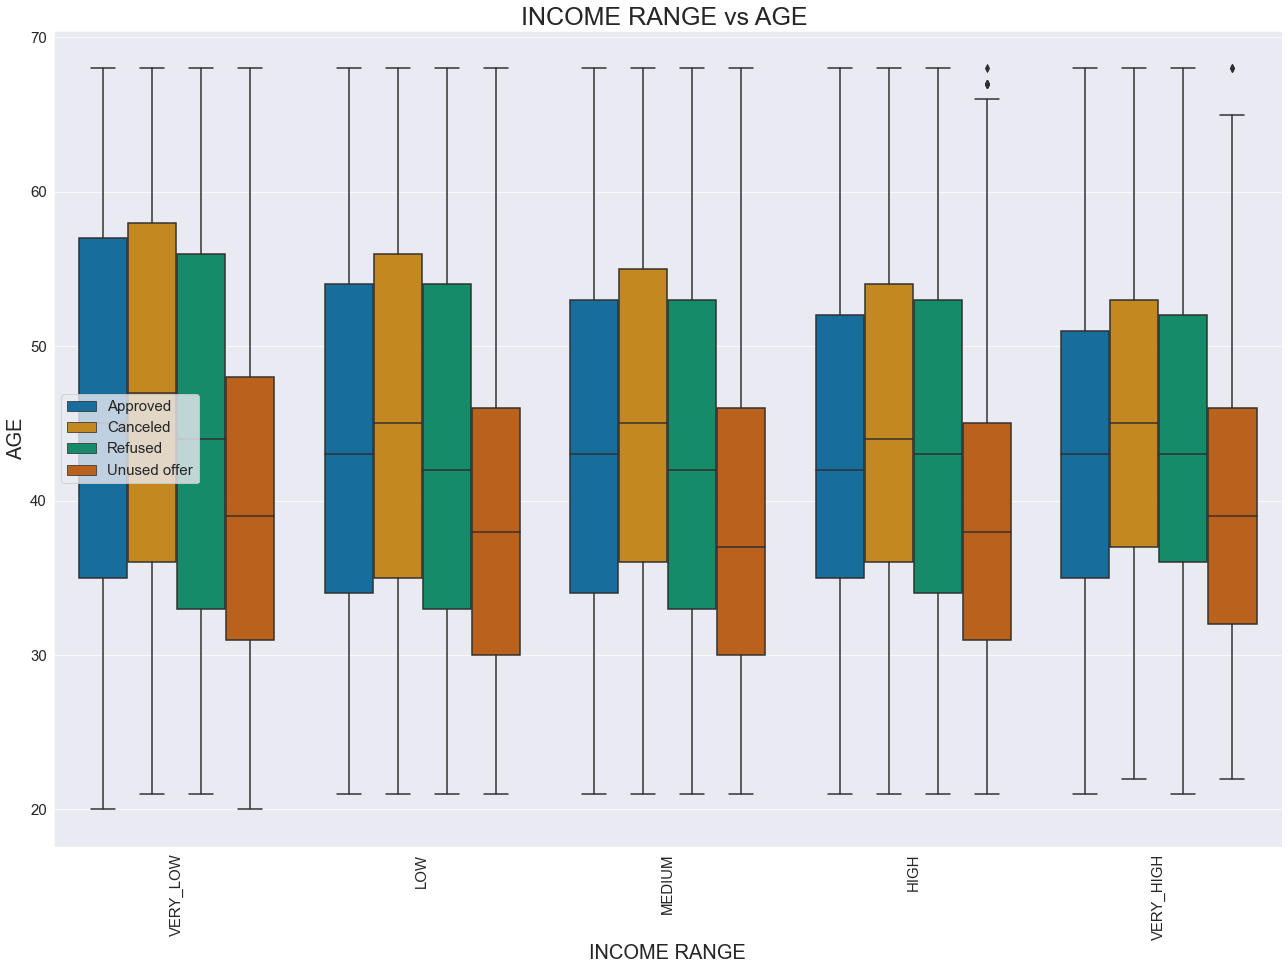

In [323]:
# Plot for INCOME_RANGE vs AGE vs NAME_CONTRACT_STATUS 

plt.figure(figsize=(22,15))

ax2 = sns.boxplot(data =all_app, x='INCOME_RANGE',y='AGE', hue ='NAME_CONTRACT_STATUS')
plt.title('INCOME RANGE vs AGE ', fontsize =25)


plt.yticks(size = 15)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('INCOME RANGE' , fontsize = 20)
plt.ylabel('AGE' , fontsize =20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90, size = 15)



plt.legend(fontsize='x-large', title_fontsize='20')

plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='15') # for legend title

plt.show()

- Many clients within the age group of 40-50 have very_low income have credit approved.
- Clients from high and very_high income range have been refused credit who are above 50 years of age.

- ### Subtask 7.6.5: Top 10 Correlation

Data Analysis for dataframe `all_app` i.e. All Application

In [324]:
# Find the list of all numeric variables("int", "float") and find the correlation between them.

var_all = list(all_app.select_dtypes(['int64','float']).columns)

var_all = all_app[var_all]

var_all_corr = var_all.corr()
var_all_corr

# Find the List of Top 10 Correlation in all_app.

top10_all = var_all_corr.where(np.triu(np.ones(var_all_corr.shape),k=1).astype(np.bool)).unstack().reset_index()

top10_all.columns=['Column1','Column2','Correlation']
top10_all.dropna(subset=['Correlation'],inplace=True)

# Top 10 correlation.

top10_all = top10_all.sort_values(by=['Correlation'], ascending=False)
top10_all = top10_all.head(10)
top10_all

Column1                     Column2  Correlation
1714         AMT_GOODS_PRICE_prev             AMT_APPLICATION     0.999870
966      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998557
1715         AMT_GOODS_PRICE_prev             AMT_CREDIT_prev     0.993788
262           AMT_GOODS_PRICE_new              AMT_CREDIT_new     0.986206
1671              AMT_CREDIT_prev             AMT_APPLICATION     0.976118
439   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.945823
346               CNT_FAM_MEMBERS                CNT_CHILDREN     0.878893
615   LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.873851
1010     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.862377
747       LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.831071

- The application amount and good's price of previous data have the highest correlation as this is product the client was to purchased, so applied for credit on it.
- The 2nd highly correlated variables are OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE.
- The  3rd highly correlated variables are previous credit amount and good's price of previous data, it's the final amount approved by the company to client for purchasing those good's he wants.


### OBSERVATIONS
- Men are more likely to default than females.
- Clients with better education background are far less likely to default.
- Clients who were previously refused, have a much higher rate of default.
- People who were employed for less than 5 years at their current job have defaulted the most.
- Unemployed and those on Maternity Leave are the worst offenders.
- Loans that were taken for Repairs or  Other as reason were most rejected by both company and client, and these loans also had the highest number of defaults.
- Point of Sale (PoS) portfolios have the least number of defaulters.
- People who own realty are more likely to default.
- Refreshed clients and repeated clients are safer and have low risk of default than newer applicants.
- Cross-Selling overall is safe, but some combinations of cross-selling have very high risk(Cash Street(high & mid), Cash x-sell) 
- Credits given for Insurance and Vehicles have very high default.
- Clients with Academic Degrees have the highest approval rate and lowest refusal rate among all the education groups






####  SOME IMPORTANT VARIABLES
These are some variables from the data that can be monitored and analyzed to get desired information.
- AGE (Derived from DAYS_BIRTH) 
- YEARS_EMPLOYED
- CONTRACT TYPE
- CODE_GENDER(Derived from GENDER )
- FLAG_OWN_REALTY
- FLAG_OWN_CAR
- NAME_INCOME_TYPE
- OCCUPATION_TYPE
- NAME_EDUCATIO_TYPE
- INCOME_RANGE(Binned from AMT_INCOME_TOTAL)
- NAME_INCOME_TYPE
- NAME_PORTFOLIO
- PRODUCT_COMBINATIONS
- YIELD GROUPS
- NAME_EDUCATION_TYPE
- LOAN PURPOSE


### RECOMMENDATIONS 
- Payment difficulties are more prevalent mainly in the younger demographic of 25-35 age - Checks on past records must be done.
- Employment status checks for work history with the current employer must be done, along with the client's current work status. As those recruited but are on a leave (eg. Maternity Leaves) are highly likely to default.
- Cash loans are popular and are safer for the company as revolving loans have considerably high % of defaulters and can become troublesome in the long run.
- Clients who already own a realty may have problems in repaying, which might be due to existing credits. Background check on other loans must be done on such clients to prevent issues in repayment.
- While Cross-Selling  is overall  safe, some combinations of cross-selling have very high risk such as (Cash Street(high & mid), 
Cash x-sell) and these should be considered before approval.
- Loan that were taken for Repairs or Others  have high default rate, and needs to be assessed.
- Academic Status of client must be assessed and considered before approval.
- Clients who were previously refused and reapplied, checks should be made not only for their current info/status but also the reason of their previous rejection.
- Insurance and vehicle loans should have a more stringent approval process, to reduce their much higher default rate.
- While gender shouldn’t be a determinant factor on who gets a loan, Men have shown tendency to have higher defaults and a stricter approval might reduce those cases.

